<a href="https://colab.research.google.com/github/SretenGlavinceski/Credit-Risk-Analysis/blob/master/eda_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Modeling

## Dataset Overview

This project look at a dataset called "Credit_Risk_Modeling" (OpenML ID 46519).

It's a dataset that consists of over 51,000 records, each representing a person who applied for credit.

For each person, we have 62 different pieces of information, or attributes. These columns include basic details like age and income, but also a lot about financial history, past loans management, if and how many late payments have been made, how much credit is used, and much more. At the start the dataset seems to have no missing values.

The target variable is the approved_flag, which tells us the outcome of their credit application – it's sorted into four main categories (P1 to P4, meaning different levels of approval or risk). Our main goal is to predict this outcome for the classification task. For the regression task we try predict the numeric credit_score attribute. Finally, for clustering, we'll try to uncover meaningful patterns in the data by grouping similar individuals based on their financial profiles.

But first eda and preprocessing is performed.

## Explore raw data - EDA

### Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

credit_risk_data = fetch_openml(data_id=46519, as_frame=True)
df = credit_risk_data.frame

### Basic information

In [2]:
df.head()

prospectid  time_since_recent_payment  time_since_first_deliquency  \
0         1.0                      549.0                         35.0   
1         2.0                       47.0                     -99999.0   
2         3.0                      302.0                         11.0   
3         4.0                   -99999.0                     -99999.0   
4         5.0                      583.0                     -99999.0   

   time_since_recent_deliquency  num_times_delinquent  max_delinquency_level  \
0                          15.0                  11.0                   29.0   
1                      -99999.0                   0.0               -99999.0   
2                           3.0                   9.0                   25.0   
3                      -99999.0                   0.0               -99999.0   
4                      -99999.0                   0.0               -99999.0   

   max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
0                       29.0             0.0              0.0   
1                        0.0             0.0              0.0   
2                       25.0             1.0              9.0   
3                        0.0             0.0              0.0   
4                        0.0             0.0              0.0   

   num_deliq_6_12mts  ...  pct_cc_enq_l6m_of_l12m  pct_pl_enq_l6m_of_ever  \
0                0.0  ...                     0.0                     0.0   
1                0.0  ...                     0.0                     0.0   
2                8.0  ...                     0.0                     0.0   
3                0.0  ...                     0.0                     0.0   
4                0.0  ...                     0.0                     0.0   

   pct_cc_enq_l6m_of_ever  max_unsec_exposure_inpct  hl_flag  gl_flag  \
0                     0.0                    13.333      1.0      0.0   
1                     0.0                     0.860      0.0      0.0   
2                     0.0                  5741.667      1.0      0.0   
3                     0.0                     9.900      0.0      0.0   
4                     0.0                -99999.000      0.0      0.0   

   last_prod_enq2  first_prod_enq2  credit_score  approved_flag  
0              PL               PL         696.0             P2  
1    ConsumerLoan     ConsumerLoan         685.0             P2  
2    ConsumerLoan           others         693.0             P2  
3          others           others         673.0             P2  
4              AL               AL         753.0             P1  

[5 rows x 62 columns]

In [3]:
df.tail()

prospectid  time_since_recent_payment  time_since_first_deliquency  \
51331     51332.0                       15.0                         24.0   
51332     51333.0                       57.0                     -99999.0   
51333     51334.0                       32.0                     -99999.0   
51334     51335.0                       58.0                     -99999.0   
51335     51336.0                       74.0                     -99999.0   

       time_since_recent_deliquency  num_times_delinquent  \
51331                          23.0                   2.0   
51332                      -99999.0                   0.0   
51333                      -99999.0                   0.0   
51334                      -99999.0                   0.0   
51335                      -99999.0                   0.0   

       max_delinquency_level  max_recent_level_of_deliq  num_deliq_6mts  \
51331                   24.0                       24.0             0.0   
51332               -99999.0                        0.0             0.0   
51333               -99999.0                        0.0             0.0   
51334               -99999.0                        0.0             0.0   
51335               -99999.0                        0.0             0.0   

       num_deliq_12mts  num_deliq_6_12mts  ...  pct_cc_enq_l6m_of_l12m  \
51331              0.0                0.0  ...                     0.0   
51332              0.0                0.0  ...                     0.0   
51333              0.0                0.0  ...                     0.0   
51334              0.0                0.0  ...                     0.0   
51335              0.0                0.0  ...                     0.0   

       pct_pl_enq_l6m_of_ever  pct_cc_enq_l6m_of_ever  \
51331                     0.0                     0.0   
51332                     0.0                     0.0   
51333                     1.0                     0.0   
51334                     0.0                     0.0   
51335                     0.0                     0.0   

       max_unsec_exposure_inpct  hl_flag  gl_flag  last_prod_enq2  \
51331                     1.661      0.0      0.0    ConsumerLoan   
51332                     0.520      0.0      0.0          others   
51333                     0.567      0.0      0.0    ConsumerLoan   
51334                     1.202      0.0      0.0    ConsumerLoan   
51335                -99999.000      0.0      0.0          others   

       first_prod_enq2  credit_score  approved_flag  
51331     ConsumerLoan         650.0             P4  
51332           others         702.0             P1  
51333           others         661.0             P3  
51334           others         686.0             P2  
51335           others         681.0             P2  

[5 rows x 62 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   prospectid                    51336 non-null  float64 
 1   time_since_recent_payment     51336 non-null  float64 
 2   time_since_first_deliquency   51336 non-null  float64 
 3   time_since_recent_deliquency  51336 non-null  float64 
 4   num_times_delinquent          51336 non-null  float64 
 5   max_delinquency_level         51336 non-null  float64 
 6   max_recent_level_of_deliq     51336 non-null  float64 
 7   num_deliq_6mts                51336 non-null  float64 
 8   num_deliq_12mts               51336 non-null  float64 
 9   num_deliq_6_12mts             51336 non-null  float64 
 10  max_deliq_6mts                51336 non-null  float64 
 11  max_deliq_12mts               51336 non-null  float64 
 12  num_times_30p_dpd             51336 non-null  

This tells us that the dataset consists of 62 attributes, mostly consisting of numeric variables. The numeric are real values (float), and some categorical featues, which are approved_flag (target variable), last_prod_enq2, first_prod_enq2, maritalstatus, education and gender. So 6 categorical and 56 numerical features.

Also for each attribute shows the exact amount of non-null values, in this case 51336.

Also there is attribute called prospectid which is nothing more but the id of the client, and has no meaningful value to our project, so we drop that column.

In [5]:
df = df.drop(columns=['prospectid'])

In [6]:
df.head()

time_since_recent_payment  time_since_first_deliquency  \
0                      549.0                         35.0   
1                       47.0                     -99999.0   
2                      302.0                         11.0   
3                   -99999.0                     -99999.0   
4                      583.0                     -99999.0   

   time_since_recent_deliquency  num_times_delinquent  max_delinquency_level  \
0                          15.0                  11.0                   29.0   
1                      -99999.0                   0.0               -99999.0   
2                           3.0                   9.0                   25.0   
3                      -99999.0                   0.0               -99999.0   
4                      -99999.0                   0.0               -99999.0   

   max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
0                       29.0             0.0              0.0   
1                        0.0             0.0              0.0   
2                       25.0             1.0              9.0   
3                        0.0             0.0              0.0   
4                        0.0             0.0              0.0   

   num_deliq_6_12mts  max_deliq_6mts  ...  pct_cc_enq_l6m_of_l12m  \
0                0.0        -99999.0  ...                     0.0   
1                0.0             0.0  ...                     0.0   
2                8.0            25.0  ...                     0.0   
3                0.0        -99999.0  ...                     0.0   
4                0.0        -99999.0  ...                     0.0   

   pct_pl_enq_l6m_of_ever  pct_cc_enq_l6m_of_ever  max_unsec_exposure_inpct  \
0                     0.0                     0.0                    13.333   
1                     0.0                     0.0                     0.860   
2                     0.0                     0.0                  5741.667   
3                     0.0                     0.0                     9.900   
4                     0.0                     0.0                -99999.000   

   hl_flag  gl_flag  last_prod_enq2  first_prod_enq2  credit_score  \
0      1.0      0.0              PL               PL         696.0   
1      0.0      0.0    ConsumerLoan     ConsumerLoan         685.0   
2      1.0      0.0    ConsumerLoan           others         693.0   
3      0.0      0.0          others           others         673.0   
4      0.0      0.0              AL               AL         753.0   

   approved_flag  
0             P2  
1             P2  
2             P2  
3             P2  
4             P1  

[5 rows x 61 columns]

### Descriptive Statistics

In [7]:
with pd.option_context('display.max_columns', None):
    print(df.describe())

       time_since_recent_payment  time_since_first_deliquency  \
count               51336.000000                 51336.000000   
mean                -8129.961314                -70020.091320   
std                 27749.328514                 45823.312757   
min                -99999.000000                -99999.000000   
25%                    46.000000                -99999.000000   
50%                    70.000000                -99999.000000   
75%                   161.000000                     8.000000   
max                  6065.000000                    35.000000   

       time_since_recent_deliquency  num_times_delinquent  \
count                  51336.000000          51336.000000   
mean                  -70022.375838              1.573749   
std                    45819.820741              4.165012   
min                   -99999.000000              0.000000   
25%                   -99999.000000              0.000000   
50%                   -99999.000000             

In these descriptive statistics about each attribute/features we can see a clear problem, which is that some of the features have negative values, even though they should be clearly positive real values (greater or equal to 0), like some of the attrbutes having min value of - 99999.0.

This is a problem because it can skew data analysis, and lead to false conclusions and ultimately worse prediction models. The mean values are completely negatively skewed which is completely false information about the dataset.

Therefore, I will replace these negative values with NULL (or NaN), and apply data imputation techniques during the missing values processing phase.

#### Boxplot to see which features have clear negative flags, where they only have one negative value of -99999.0

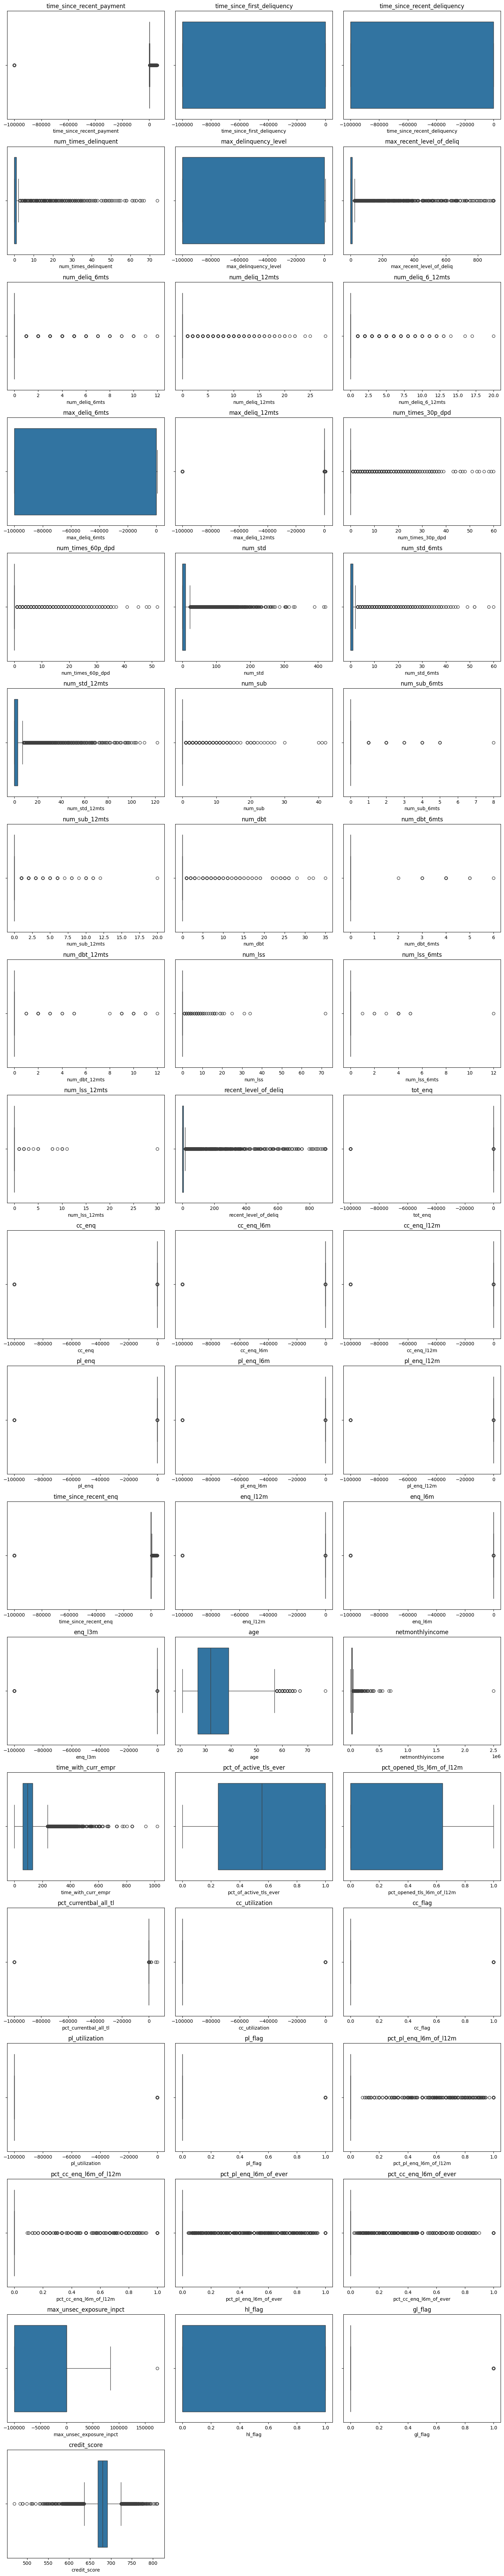

In [8]:
import math

num_cols = df.select_dtypes(include='number').columns

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [9]:
def is_neg_flag(df_copy, feature):
  neg_vals = [val for val in  df[feature].unique() if val < 0]
  return df[feature].nunique() > 2 and len(neg_vals) == 1

change_cols = []

for feature in  df.select_dtypes(include=[np.number]).columns.tolist():
  if is_neg_flag(df, feature):
    print(feature)
    change_cols.append(feature)

time_since_recent_payment
time_since_first_deliquency
time_since_recent_deliquency
max_delinquency_level
max_deliq_6mts
max_deliq_12mts
tot_enq
cc_enq
cc_enq_l6m
cc_enq_l12m
pl_enq
pl_enq_l6m
pl_enq_l12m
time_since_recent_enq
enq_l12m
enq_l6m
enq_l3m
pct_currentbal_all_tl
cc_utilization
pl_utilization
max_unsec_exposure_inpct


Now i change the -99999.0 flag which may represent non-present or invalid value, to Nan and deal with these missing values in the missing values section

In [10]:
for col in change_cols:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)

In [11]:
with pd.option_context('display.max_columns', None):
    print(df.describe())

       time_since_recent_payment  time_since_first_deliquency  \
count               47045.000000                 15387.000000   
mean                  249.463599                    20.318646   
std                   467.777931                    10.831259   
min                     2.000000                     0.000000   
25%                    52.000000                    10.000000   
50%                    74.000000                    21.000000   
75%                   195.000000                    31.000000   
max                  6065.000000                    35.000000   

       time_since_recent_deliquency  num_times_delinquent  \
count                  15387.000000          51336.000000   
mean                      12.696757              1.573749   
std                        9.499626              4.165012   
min                        0.000000              0.000000   
25%                        4.000000              0.000000   
50%                       10.000000             

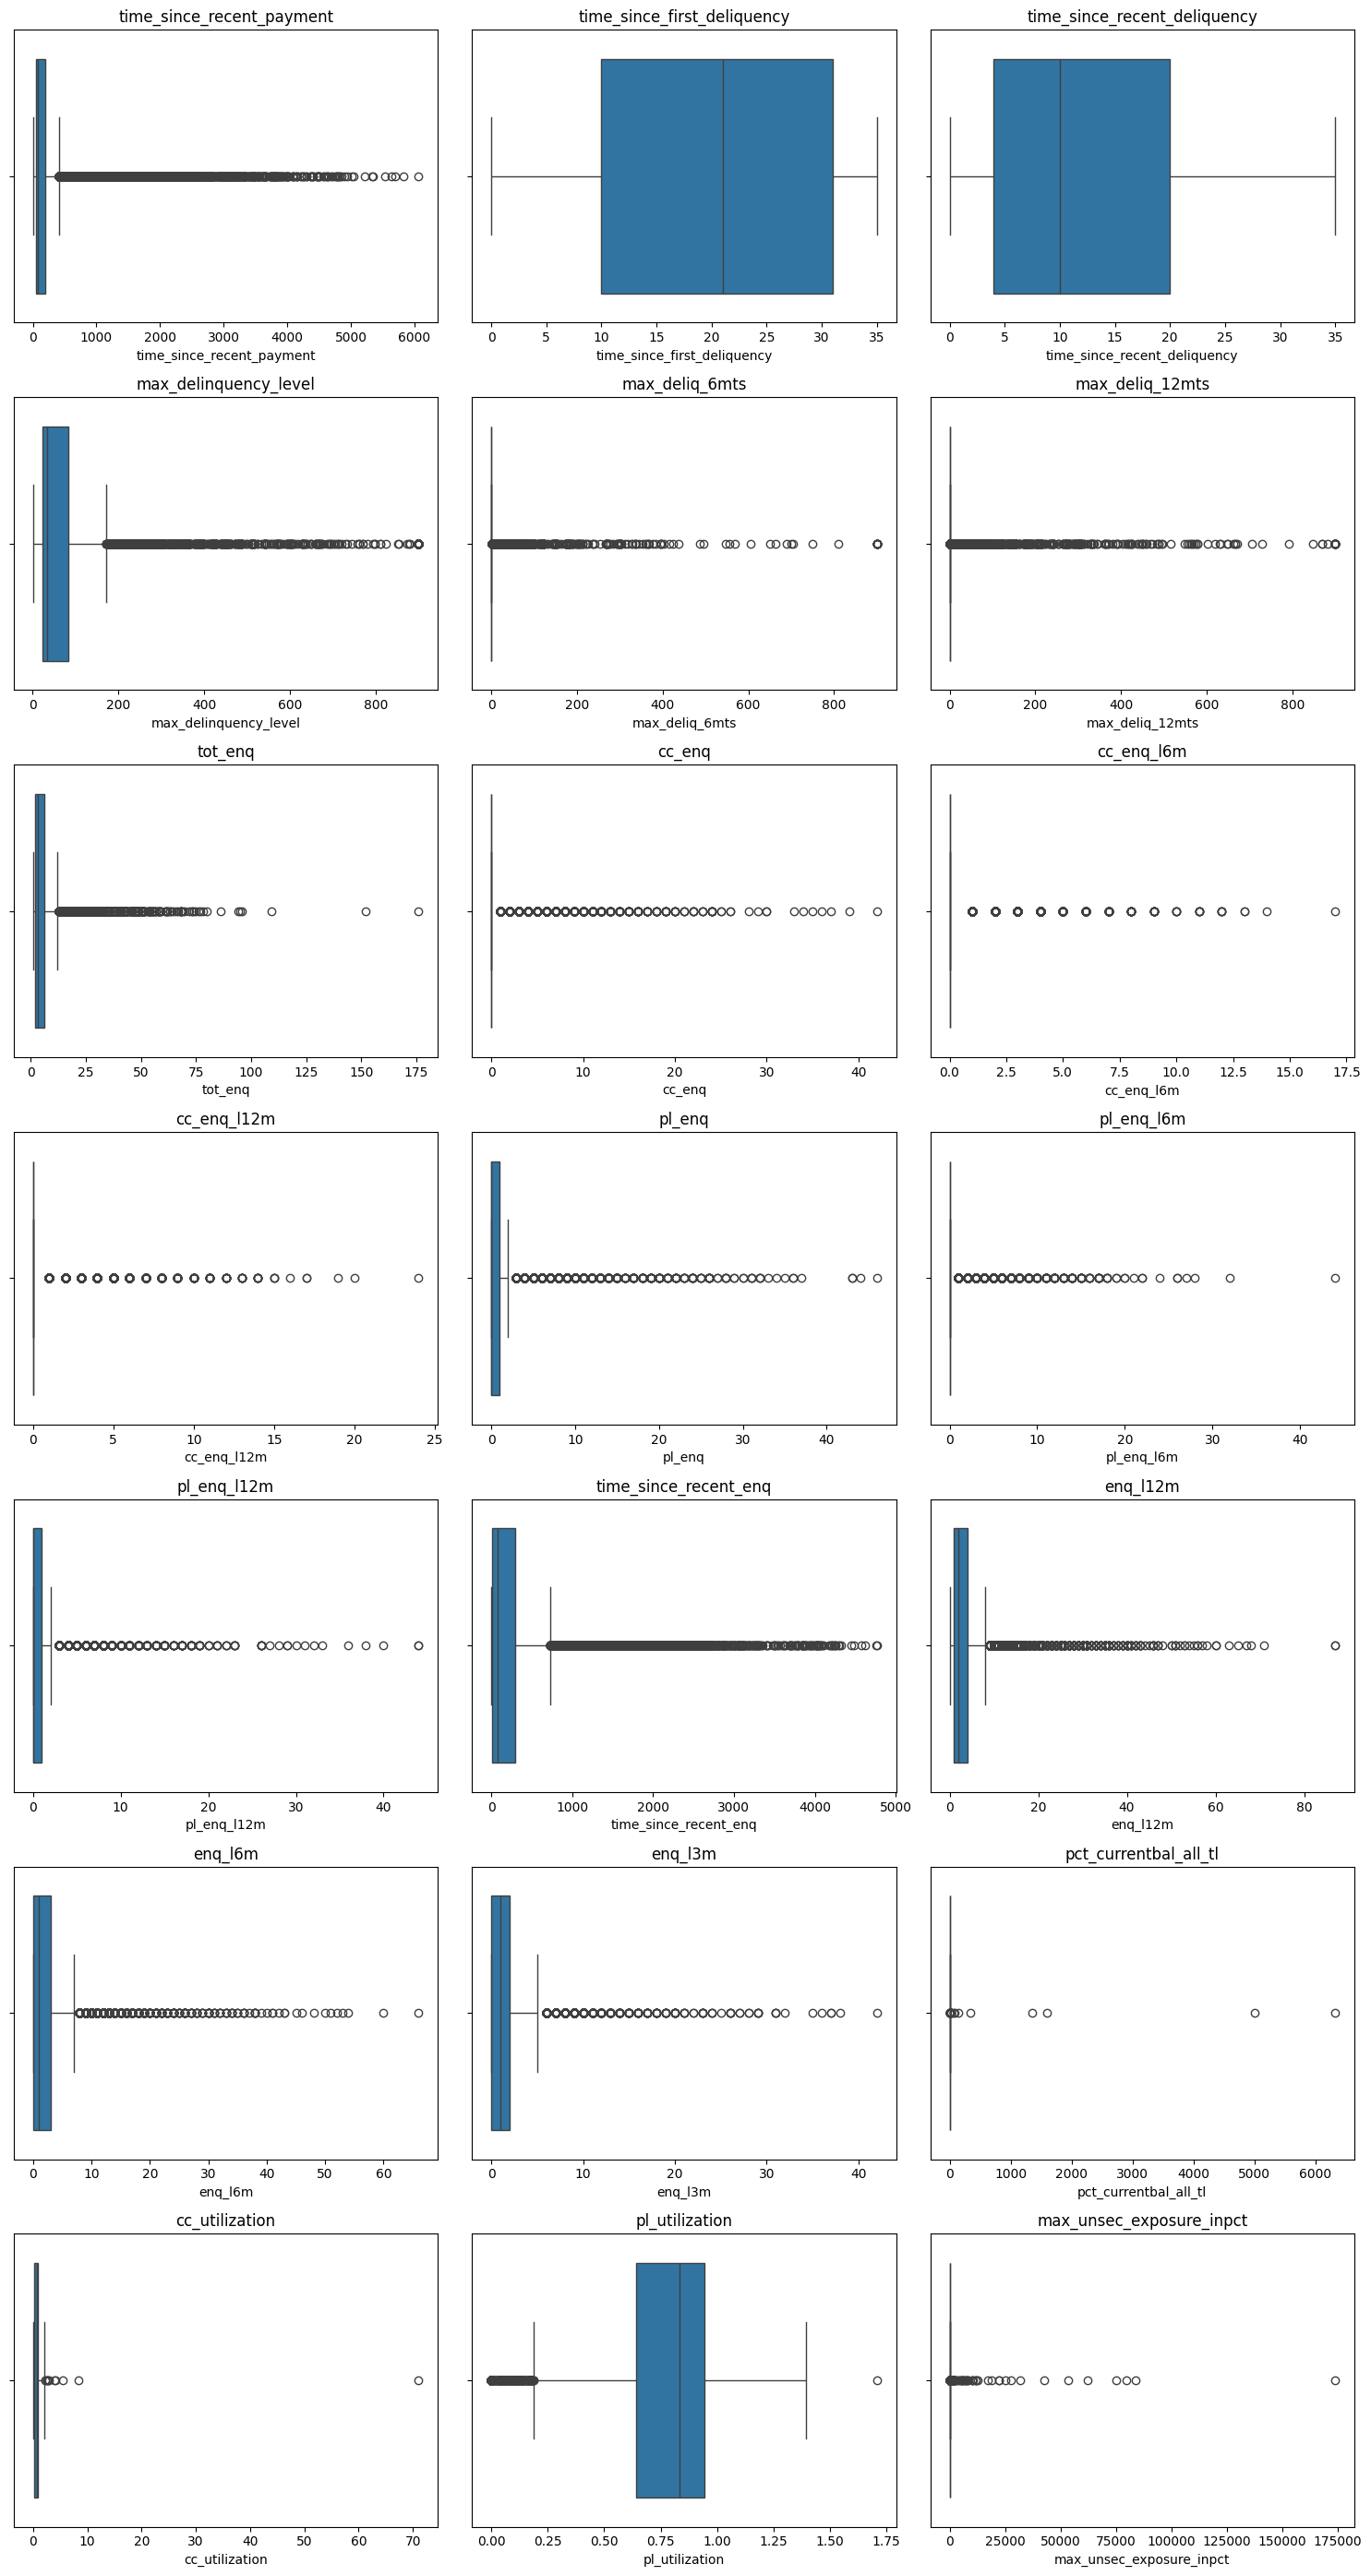

In [12]:
n_cols = 3
n_rows = math.ceil(len(change_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(change_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Missing Data

#### Checking the missing values

In [13]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

time_since_recent_payment        4291
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
num_times_delinquent                0
max_delinquency_level           35949
max_recent_level_of_deliq           0
num_deliq_6mts                      0
num_deliq_12mts                     0
num_deliq_6_12mts                   0
max_deliq_6mts                  12890
max_deliq_12mts                 10832
num_times_30p_dpd                   0
num_times_60p_dpd                   0
num_std                             0
num_std_6mts                        0
num_std_12mts                       0
num_sub                             0
num_sub_6mts                        0
num_sub_12mts                       0
num_dbt                             0
num_dbt_6mts                        0
num_dbt_12mts                       0
num_lss                             0
num_lss_6mts                        0
num_lss_12mts                       0
recent_level_of_deliq               0
tot_enq                          6321
cc_enq                           6321
cc_enq_l6m                       6321
cc_enq_l12m                      6321
pl_enq                           6321
pl_enq_l6m                       6321
pl_enq_l12m                      6321
time_since_recent_enq            6321
enq_l12m                         6321
enq_l6m                          6321
enq_l3m                          6321
maritalstatus                       0
education                           0
age                                 0
gender                              0
netmonthlyincome                    0
time_with_curr_empr                 0
pct_of_active_tls_ever              0
pct_opened_tls_l6m_of_l12m          0
pct_currentbal_all_tl              72
cc_utilization                  47636
cc_flag                             0
pl_utilization                  44435
pl_flag                             0
pct_pl_enq_l6m_of_l12m              0
pct_cc_enq_l6m_of_l12m              0
pct_pl_enq_l6m_of_ever              0
pct_cc_enq_l6m_of_ever              0
max_unsec_exposure_inpct        23178
hl_flag                             0
gl_flag                             0
last_prod_enq2                      0
first_prod_enq2                     0
credit_score                        0
approved_flag                       0
dtype: int64

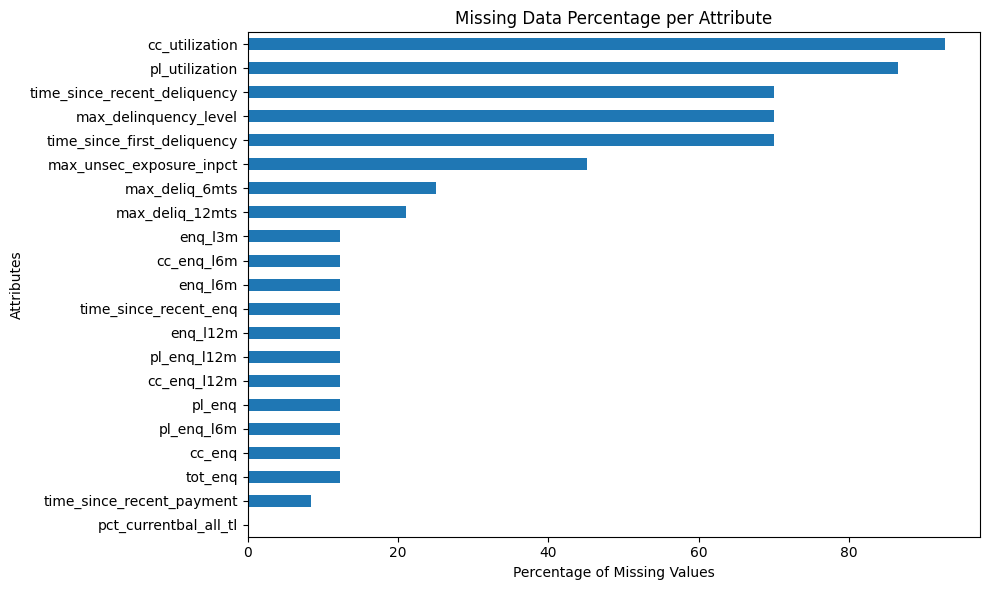

In [14]:
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0]
missing_percent = missing_percent.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
missing_percent.plot(kind='barh')
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Attributes")
plt.title("Missing Data Percentage per Attribute")
plt.tight_layout()
plt.show()

Since i removed non valid values for many attributes there are substantially more Nan values, meaning missing values from the dataset. Some of them like cc_utilization even have more than 90% values missing from their column.

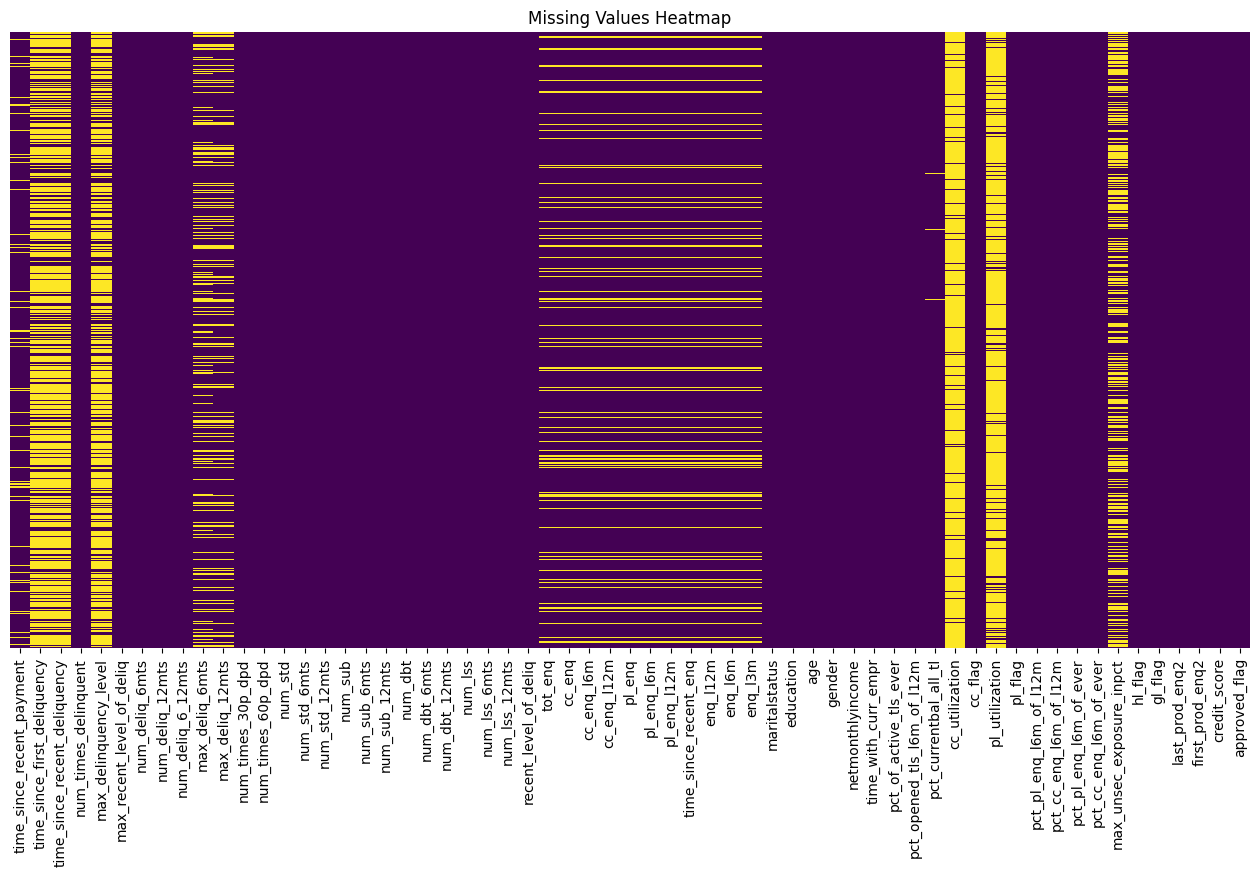

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


#### Handling Missing Data

In the dataset, several numerical features contained the extreme value -99999.0, which upon inspection through boxplots and descriptive statistics clearly stood out as invalid and were not of any real measurement.

There could be two interpretations of why such placeholder value is present. One variation is that the values are truly missing and were not properly handled during data collection. The other variation is that these values represent "never happened" flag to indicate that certain feature has no value because such event did not happen for such person and that feature has no representative value for that person.

Thus, I will be using a combined approach, where for the features there is semantical meaning, I will introduce a new binary flag that states whether for that person such event happened as described by the feature or not, and for the feature itself use a simple imputation tactic. For features where this doesn't apply, I will use directly imputation technique.

Here's how specific features will be handled:

- Group 1: Features where -99999.0 represents an "Event Never Happened" flag.

time_since_first_delinquency: A -99999.0 here strongly indicates that the person has never been delinquent. We will create a new binary feature, has_ever_been_delinquent, where 0 means the event never occurred and 1 means it has. The original time_since_first_delinquency will then have -99999.0 replaced by NaN and imputed with the median.

- Group 2: Features where -99999.0 represents "Data Not Applicable / Missing".

cc_utilization: Similarly, if a customer has no credit card, credit card utilization cannot be calculated. -99999.0 will be directly replaced with NaN and imputed with the median.

##### Adding the new binary features

In [16]:
features_to_flag = [
    'time_since_first_deliquency',
    'time_since_recent_deliquency',
    'max_delinquency_level',
    'max_deliq_6mts',
    'max_deliq_12mts',
    'time_since_recent_enq',
    'enq_l12m',
    'enq_l6m',
    'enq_l3m'
]

for col in features_to_flag:
    flag_col = f'has_{col}'
    print(flag_col)
    df[flag_col] = df[col].notna().astype(int)


has_time_since_first_deliquency
has_time_since_recent_deliquency
has_max_delinquency_level
has_max_deliq_6mts
has_max_deliq_12mts
has_time_since_recent_enq
has_enq_l12m
has_enq_l6m
has_enq_l3m


In [17]:
df.shape

(51336, 70)

##### Data imputation for the rest

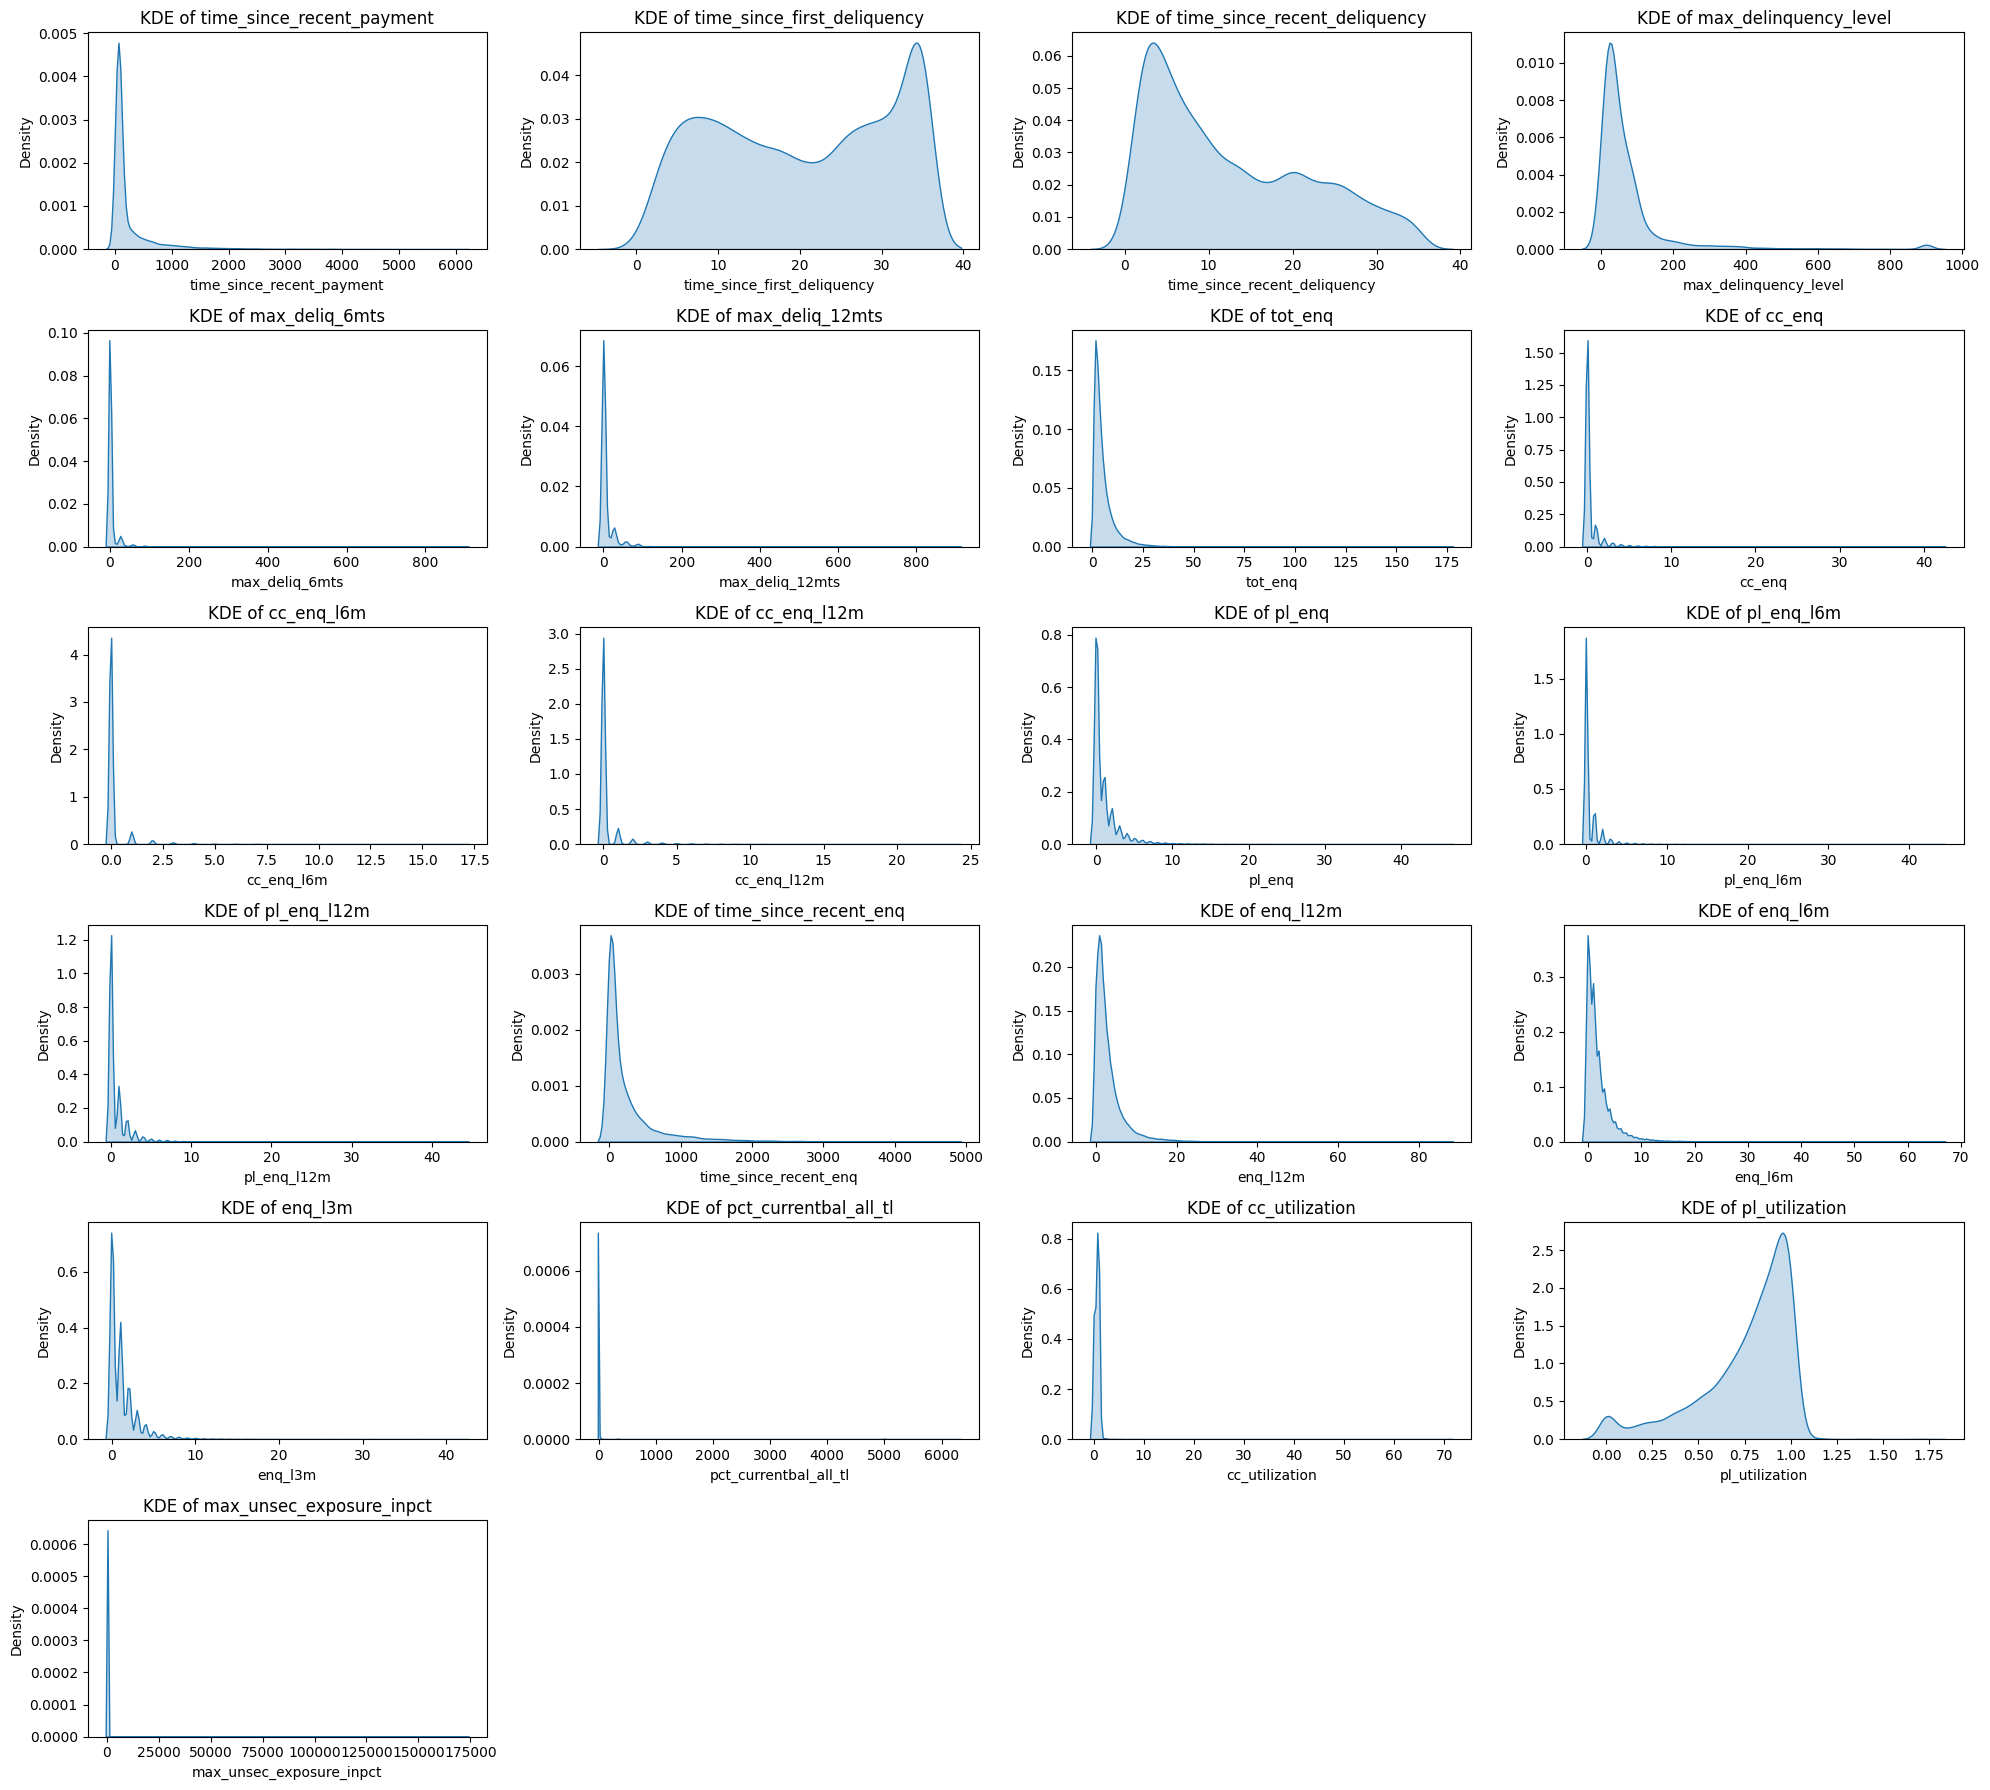

In [18]:
numerical_cols_with_missing_data = [
    col for col in df.select_dtypes(include=np.number).columns.tolist() if df[col].isnull().any()
]

cols = 4
rows = (len(numerical_cols_with_missing_data) + cols - 1) // cols

plt.figure(figsize=(20, rows * 3))

for i, col in enumerate(numerical_cols_with_missing_data):
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(df[col].dropna(), fill=True)
    plt.title(f'KDE of {col}')
    plt.tight_layout()

plt.show()

I will be using mean imputation for features like cc_utilization and pl_utilization because their distributions are relatively smooth and continuous without extreme outliers or heavy skew. These features represent a more normal-like or uniform distribution, so the mean makes more sense.

On the other hand, features such as time_since_recent_payment, time_since_first_deliquency, time_since_recent_deliquency, max_delinquency_level, max_deliq_6mts, max_deliq_12mts, tot_enq, cc_enq, cc_enq_l6m, cc_enq_l12m, pl_enq, pl_enq_l6m, pl_enq_l12m, time_since_recent_enq, enq_l12m, enq_l6m, enq_l3m, pct_currentbal_all_tl, and max_unsec_exposure_inpct are all heavily right-skewed or contain extreme outliers. In these cases, the median is preferred because it is robust to skewness and outliers and gives a more accurate representation of the "typical" value, especially when most data points are clustered near zero and a few rare values lie far from the bulk of the data.

In [19]:
from sklearn.impute import SimpleImputer

mean_features = ['cc_utilization', 'pl_utilization']

median_features = [
    'time_since_recent_payment', 'time_since_first_deliquency', 'time_since_recent_deliquency',
    'max_delinquency_level', 'max_deliq_6mts', 'max_deliq_12mts',
    'tot_enq', 'cc_enq', 'cc_enq_l6m', 'cc_enq_l12m',
    'pl_enq', 'pl_enq_l6m', 'pl_enq_l12m',
    'time_since_recent_enq', 'enq_l12m', 'enq_l6m', 'enq_l3m',
    'pct_currentbal_all_tl', 'max_unsec_exposure_inpct'
]

mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

df[mean_features] = mean_imputer.fit_transform(df[mean_features])

df[median_features] = median_imputer.fit_transform(df[median_features])

In [20]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

time_since_recent_payment           0
time_since_first_deliquency         0
time_since_recent_deliquency        0
num_times_delinquent                0
max_delinquency_level               0
max_recent_level_of_deliq           0
num_deliq_6mts                      0
num_deliq_12mts                     0
num_deliq_6_12mts                   0
max_deliq_6mts                      0
max_deliq_12mts                     0
num_times_30p_dpd                   0
num_times_60p_dpd                   0
num_std                             0
num_std_6mts                        0
num_std_12mts                       0
num_sub                             0
num_sub_6mts                        0
num_sub_12mts                       0
num_dbt                             0
num_dbt_6mts                        0
num_dbt_12mts                       0
num_lss                             0
num_lss_6mts                        0
num_lss_12mts                       0
recent_level_of_deliq               0
tot_enq                             0
cc_enq                              0
cc_enq_l6m                          0
cc_enq_l12m                         0
pl_enq                              0
pl_enq_l6m                          0
pl_enq_l12m                         0
time_since_recent_enq               0
enq_l12m                            0
enq_l6m                             0
enq_l3m                             0
maritalstatus                       0
education                           0
age                                 0
gender                              0
netmonthlyincome                    0
time_with_curr_empr                 0
pct_of_active_tls_ever              0
pct_opened_tls_l6m_of_l12m          0
pct_currentbal_all_tl               0
cc_utilization                      0
cc_flag                             0
pl_utilization                      0
pl_flag                             0
pct_pl_enq_l6m_of_l12m              0
pct_cc_enq_l6m_of_l12m              0
pct_pl_enq_l6m_of_ever              0
pct_cc_enq_l6m_of_ever              0
max_unsec_exposure_inpct            0
hl_flag                             0
gl_flag                             0
last_prod_enq2                      0
first_prod_enq2                     0
credit_score                        0
approved_flag                       0
has_time_since_first_deliquency     0
has_time_since_recent_deliquency    0
has_max_delinquency_level           0
has_max_deliq_6mts                  0
has_max_deliq_12mts                 0
has_time_since_recent_enq           0
has_enq_l12m                        0
has_enq_l6m                         0
has_enq_l3m                         0
dtype: int64

### Data Outliers

#### Detect Outliers

Firstly, with the help of .describe() method, from the output i will be trying to identify features which are high probable to contain outliers, and check test those features. I will be looking for highly disproportionate min and max values when compared to their respective 25th and 75th percentiles, as these extreme values are strong indicators of potential outliers. Also, a significant difference between the mean and median (50th percentile) points towards strong skewness, with the longer tail often containing many outliers.

In [21]:
with pd.option_context('display.max_columns', None):
    print(df.describe())

       time_since_recent_payment  time_since_first_deliquency  \
count               51336.000000                 51336.000000   
mean                  234.797199                    20.795777   
std                   450.426580                     5.937942   
min                     2.000000                     0.000000   
25%                    54.000000                    21.000000   
50%                    74.000000                    21.000000   
75%                   161.000000                    21.000000   
max                  6065.000000                    35.000000   

       time_since_recent_deliquency  num_times_delinquent  \
count                  51336.000000          51336.000000   
mean                      10.808302              1.573749   
std                        5.345451              4.165012   
min                        0.000000              0.000000   
25%                       10.000000              0.000000   
50%                       10.000000             

In [22]:
with pd.option_context('display.max_columns', None):
    desc = df.describe()

for col in df.select_dtypes(include='number').columns:
    if col in desc:
        max_val = desc.loc['max', col]
        pct75 = desc.loc['75%', col]
        mean = desc.loc['mean', col]
        std = desc.loc['std', col]

        mean_std_relation = '=' if mean == std else ('>' if mean > std else '<')

        print(f"{col} (max = {max_val:.1f} vs 75% = {pct75:.1f} | mean = {mean:.1f} {mean_std_relation} std = {std:.1f})")

time_since_recent_payment (max = 6065.0 vs 75% = 161.0 | mean = 234.8 < std = 450.4)
time_since_first_deliquency (max = 35.0 vs 75% = 21.0 | mean = 20.8 > std = 5.9)
time_since_recent_deliquency (max = 35.0 vs 75% = 10.0 | mean = 10.8 > std = 5.3)
num_times_delinquent (max = 74.0 vs 75% = 1.0 | mean = 1.6 < std = 4.2)
max_delinquency_level (max = 900.0 vs 75% = 33.0 | mean = 45.3 < std = 69.0)
max_recent_level_of_deliq (max = 900.0 vs 75% = 10.0 | mean = 13.5 < std = 53.3)
num_deliq_6mts (max = 12.0 vs 75% = 0.0 | mean = 0.2 < std = 0.7)
num_deliq_12mts (max = 28.0 vs 75% = 0.0 | mean = 0.5 < std = 1.5)
num_deliq_6_12mts (max = 20.0 vs 75% = 0.0 | mean = 0.3 < std = 1.0)
max_deliq_6mts (max = 900.0 vs 75% = 0.0 | mean = 3.6 < std = 24.9)
max_deliq_12mts (max = 900.0 vs 75% = 0.0 | mean = 7.3 < std = 35.3)
num_times_30p_dpd (max = 60.0 vs 75% = 0.0 | mean = 0.7 < std = 2.8)
num_times_60p_dpd (max = 52.0 vs 75% = 0.0 | mean = 0.4 < std = 2.1)
num_std (max = 422.0 vs 75% = 9.0 | mean = 9.

- Features that have a max far greater than the 75th percentile, suggesting extreme values or features with high variation, potential outliers

time_since_recent_payment (max = 6065.0 vs 75% = 195.0 | mean = 249.5 < std = 467.8) - 6065 days ≈ 16.6 years, likely outlier and needs cleaning

num_times_delinquent (max = 74.0 vs 75% = 1.0 | mean = 1.6 < std = 4.2) - Most have ≤1

max_delinquency_level (max = 900.0 vs 75% = 83.0 | mean = 74.0 < std = 121.3) - 900 is not a true delinquency level

max_recent_level_of_deliq (max = 900.0 vs 75% = 10.0 | mean = 13.5 < std = 53.3) - 900 is not a true delinquency level

max_deliq_6mts (max = 900.0 vs 75% = 0.0 | mean = 4.8 < std = 28.6) - 900 is placeholder or error

max_deliq_12mts (max = 900.0 vs 75% = 0.0 | mean = 9.2 < std = 39.5) - 900 is placeholder or error

recent_level_of_deliq (max = 900.0 vs 75% = 7.0 | mean = 11.3 < std = 46.1) - 900 is placeholder or error

tot_enq (max = 176.0 vs 75% = 6.0 | mean = 5.3 < std = 6.2) - Very high

time_since_recent_enq (max = 4768.0 vs 75% = 295.0 | mean = 260.1 < std = 462.0) - 13 years without inquiries, unlikely

age (max = 77.0 vs 75% = 39.0 | mean = 33.8 > std = 8.8) - likely real data

netmonthlyincome (max = 2500000.0 vs 75% = 30000.0 | mean = 26424.2 > std = 20027.1) - reasonable, few people are high earners

time_with_curr_empr (max = 1020.0 vs 75% = 131.0 | mean = 110.7 > std = 76.0) - 85 years of employment, likely wrong

pct_currentbal_all_tl (max = 6327.5 vs 75% = 0.9 | mean = 0.8 < std = 36.8) - May be miscalculated or badly scaled

max_unsec_exposure_inpct (max = 173800.0 vs 75% = 5.3 | mean = 38.7 < std = 1499.0) - Might be a bug or wrongly scaled feature

credit_score (max = 811.0 vs 75% = 691.0 | mean = 679.9 > std = 20.5) - Justifiable

#### Visualization with boxplot

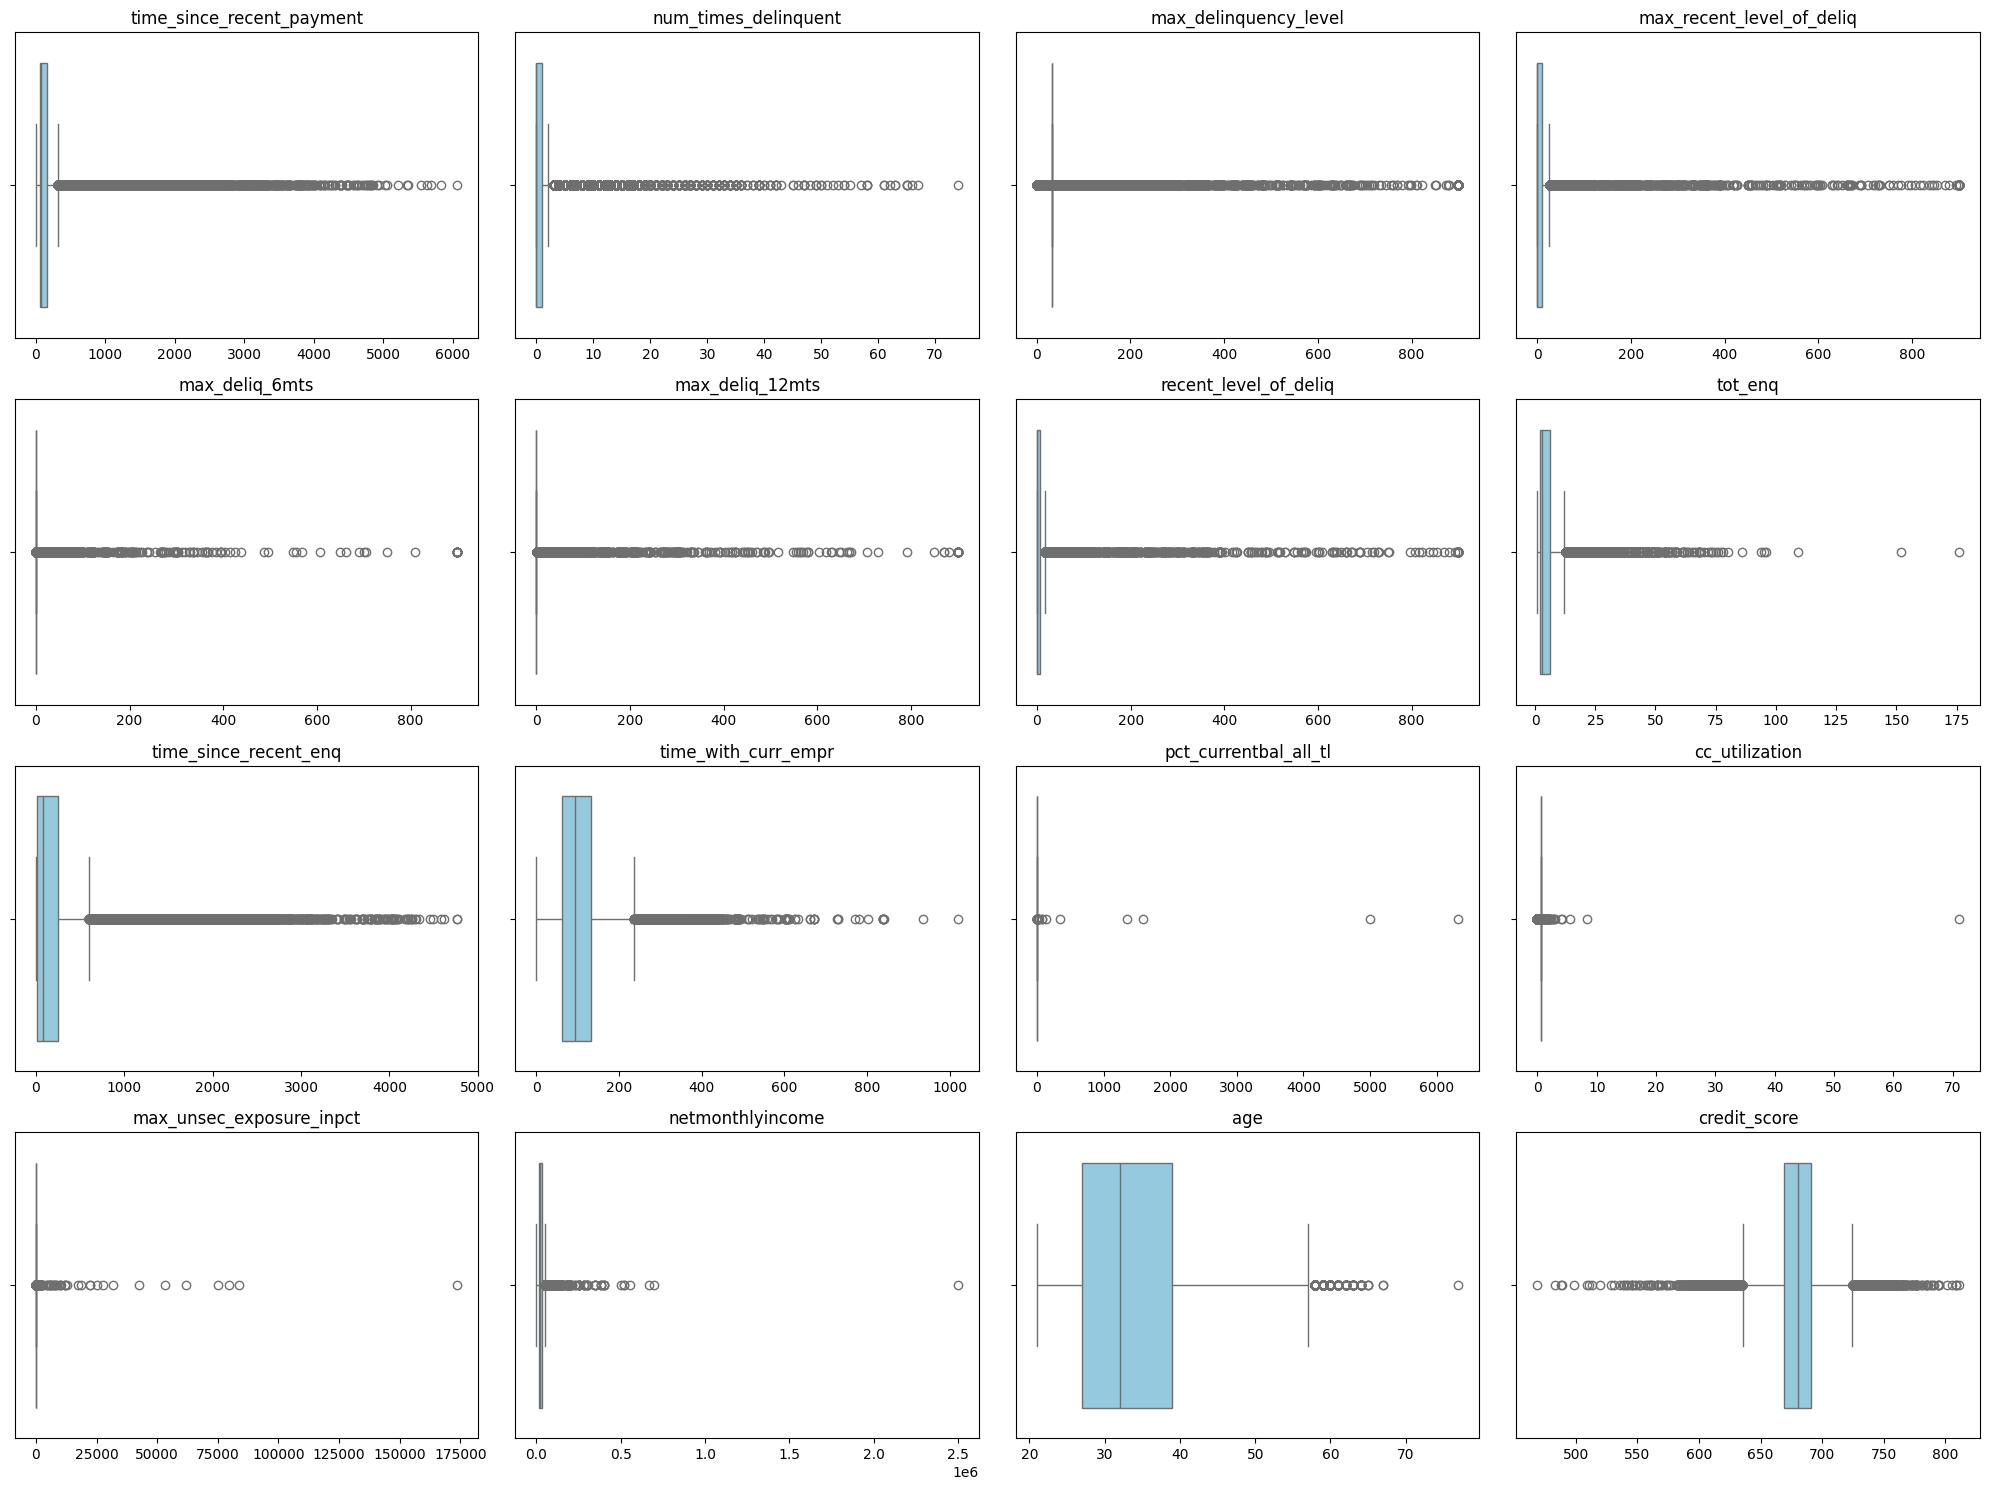

In [23]:
pot_outlier_features = [
    'time_since_recent_payment', 'num_times_delinquent', 'max_delinquency_level', 'max_recent_level_of_deliq',
    'max_deliq_6mts', 'max_deliq_12mts', 'recent_level_of_deliq', 'tot_enq',
    'time_since_recent_enq', 'time_with_curr_empr', 'pct_currentbal_all_tl',
    'cc_utilization', 'max_unsec_exposure_inpct', 'netmonthlyincome', 'age', 'credit_score'
]

fig, axes = plt.subplots(4, 4, figsize=(20, 15))

axes = axes.flatten()

for i, feature in enumerate(pot_outlier_features):
    sns.boxplot(x=df[feature], ax=axes[i], color='skyblue')
    axes[i].set_title(feature)
    axes[i].set_xlabel('')

for j in range(len(pot_outlier_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


#### Drawing the IQR bounds

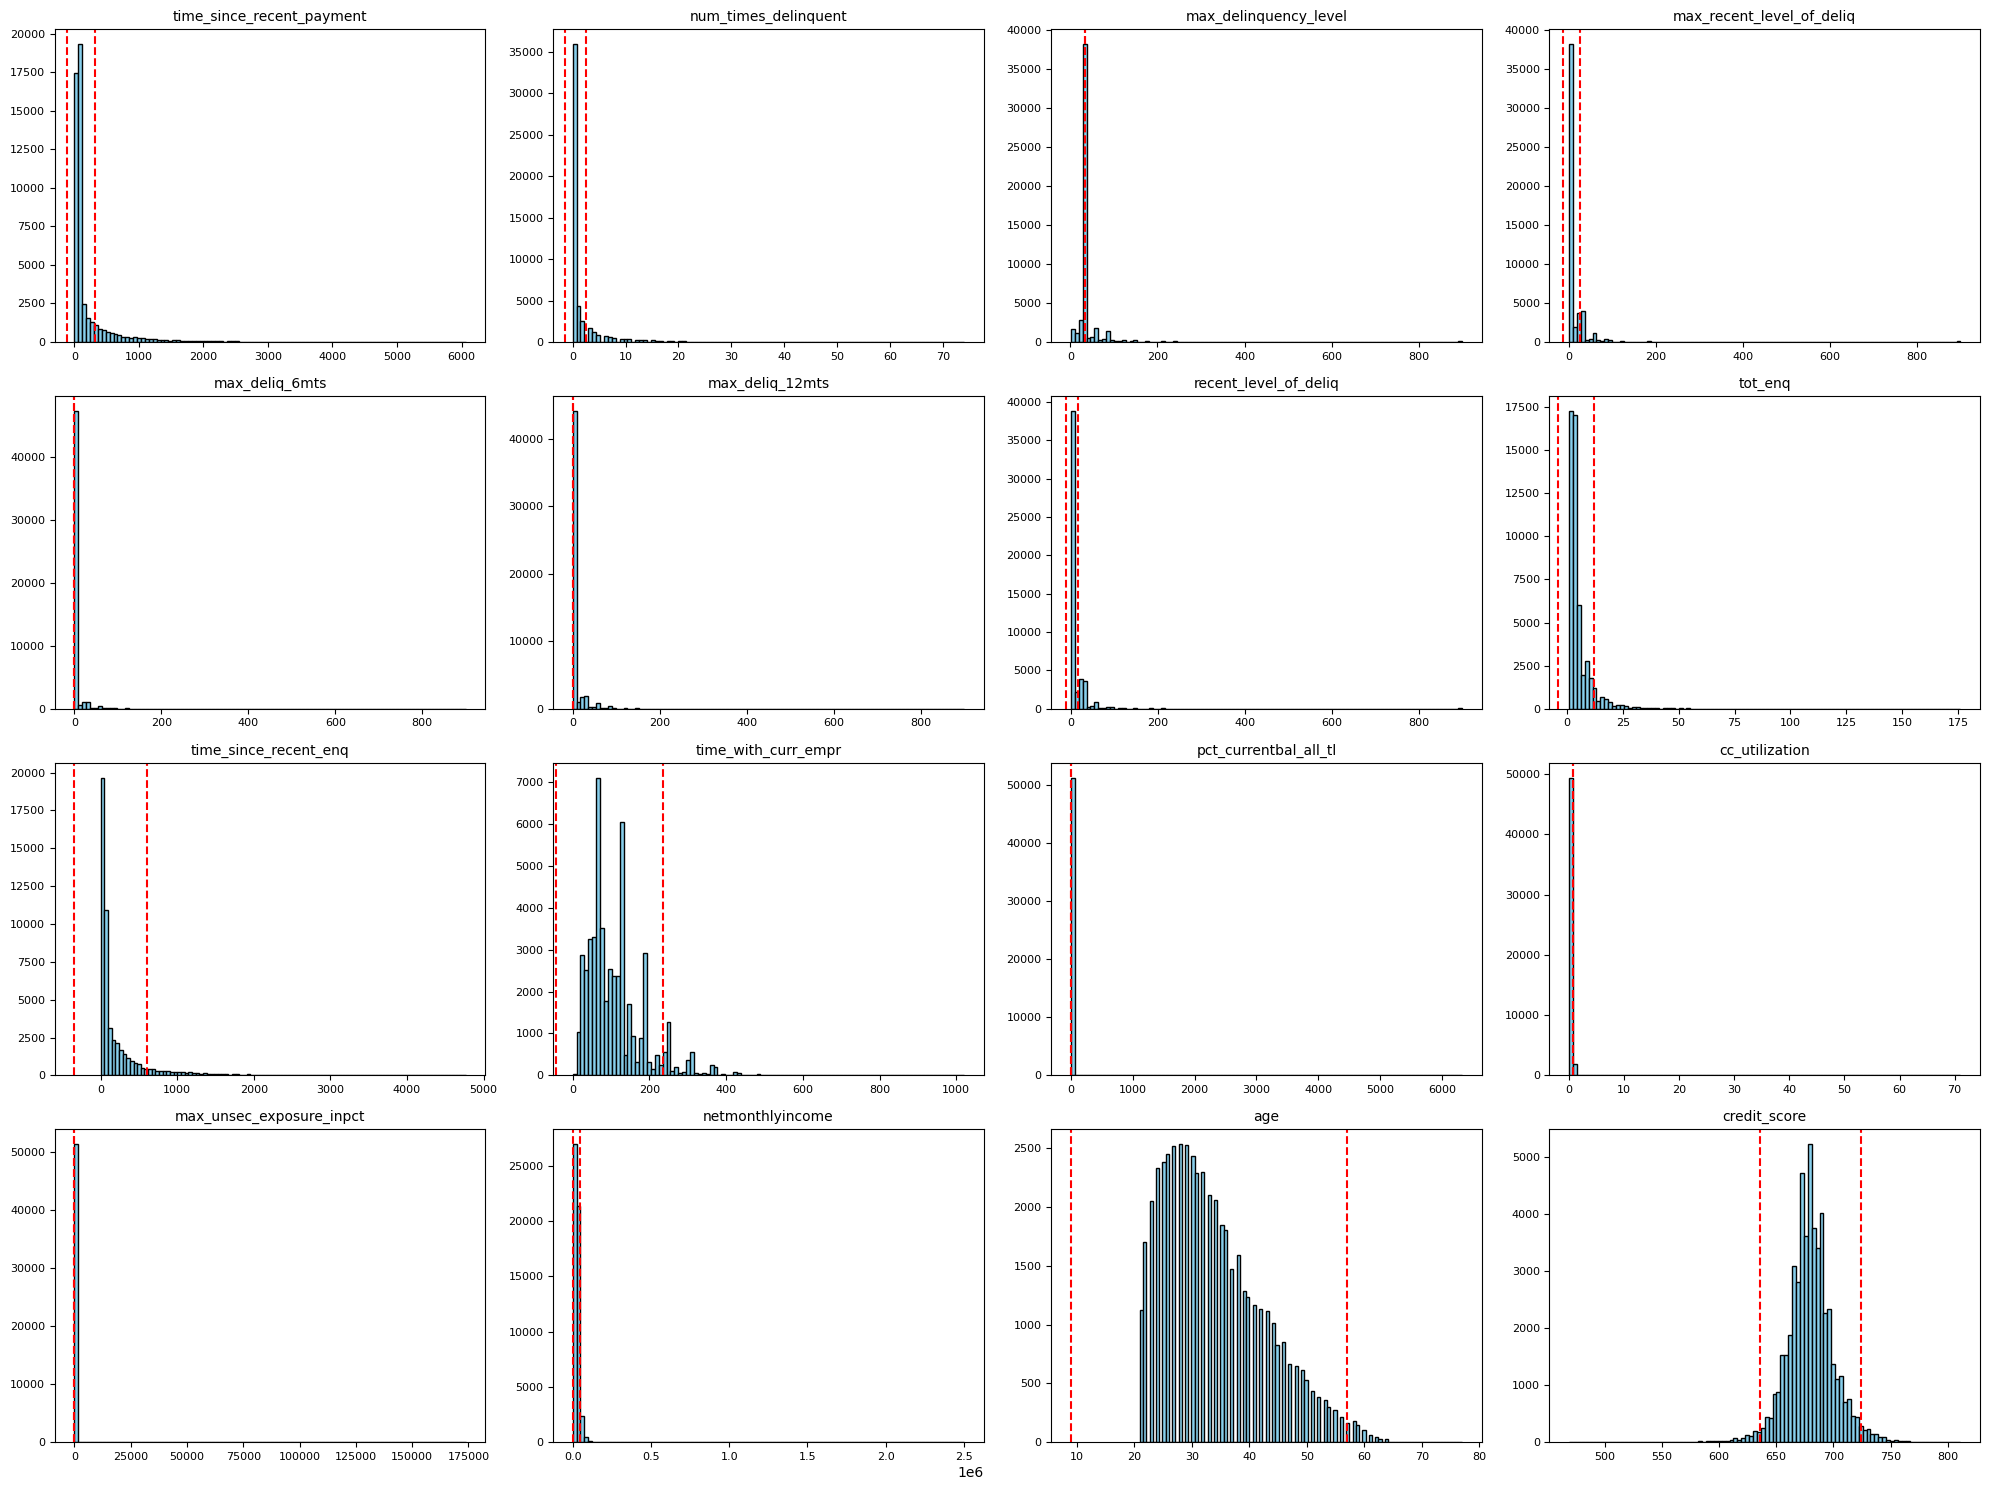

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(pot_outlier_features):
    ax = axes[i]
    data = df[feature].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ax.hist(data, bins=100, color='skyblue', edgecolor='black')
    ax.axvline(lower_bound, color='red', linestyle='--', label='Lower IQR')
    ax.axvline(upper_bound, color='red', linestyle='--', label='Upper IQR')
    ax.set_title(feature, fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

for j in range(len(pot_outlier_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


According to the IQR bounds, most of these features contain values that extend well beyond the typical range, as visualized in the histograms. However, in financial datasets, such values do not necessarily indicate flawed or incorrect data — they may simply reflect rare but valid cases.

The boxplots show that all features are right-skewed, which is expected in financial contexts where most users have modest values and a small minority have extreme ones (example high income or debt levels). Still, a few data points lie far beyond the clustered majority, suggesting clear outliers.

The chosen strategy is to cap extreme values at the 99th percentile to reduce the influence of outliers while retaining realistic data. Additionally, we apply Box-Cox or log transformation to normalize skewed distributions, which is beneficial for linear regression models and improves numerical stability.

Such transformations will not be performed on the features 'age', 'credit_score' and 'netmonthlyincome', because their values are typical in real life, even the clear outliers.


#### Handling Outliers

In this section Winsorization will be introduced to these features. Winsorization is a technique where extreme values are capped at specific percentile limits instead of being removed. In our case values above the 99th percentile are set to the 99th percentile value.

In [25]:
pot_outlier_features.remove('age')
pot_outlier_features.remove('credit_score')
pot_outlier_features.remove('netmonthlyincome')

for col in pot_outlier_features:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

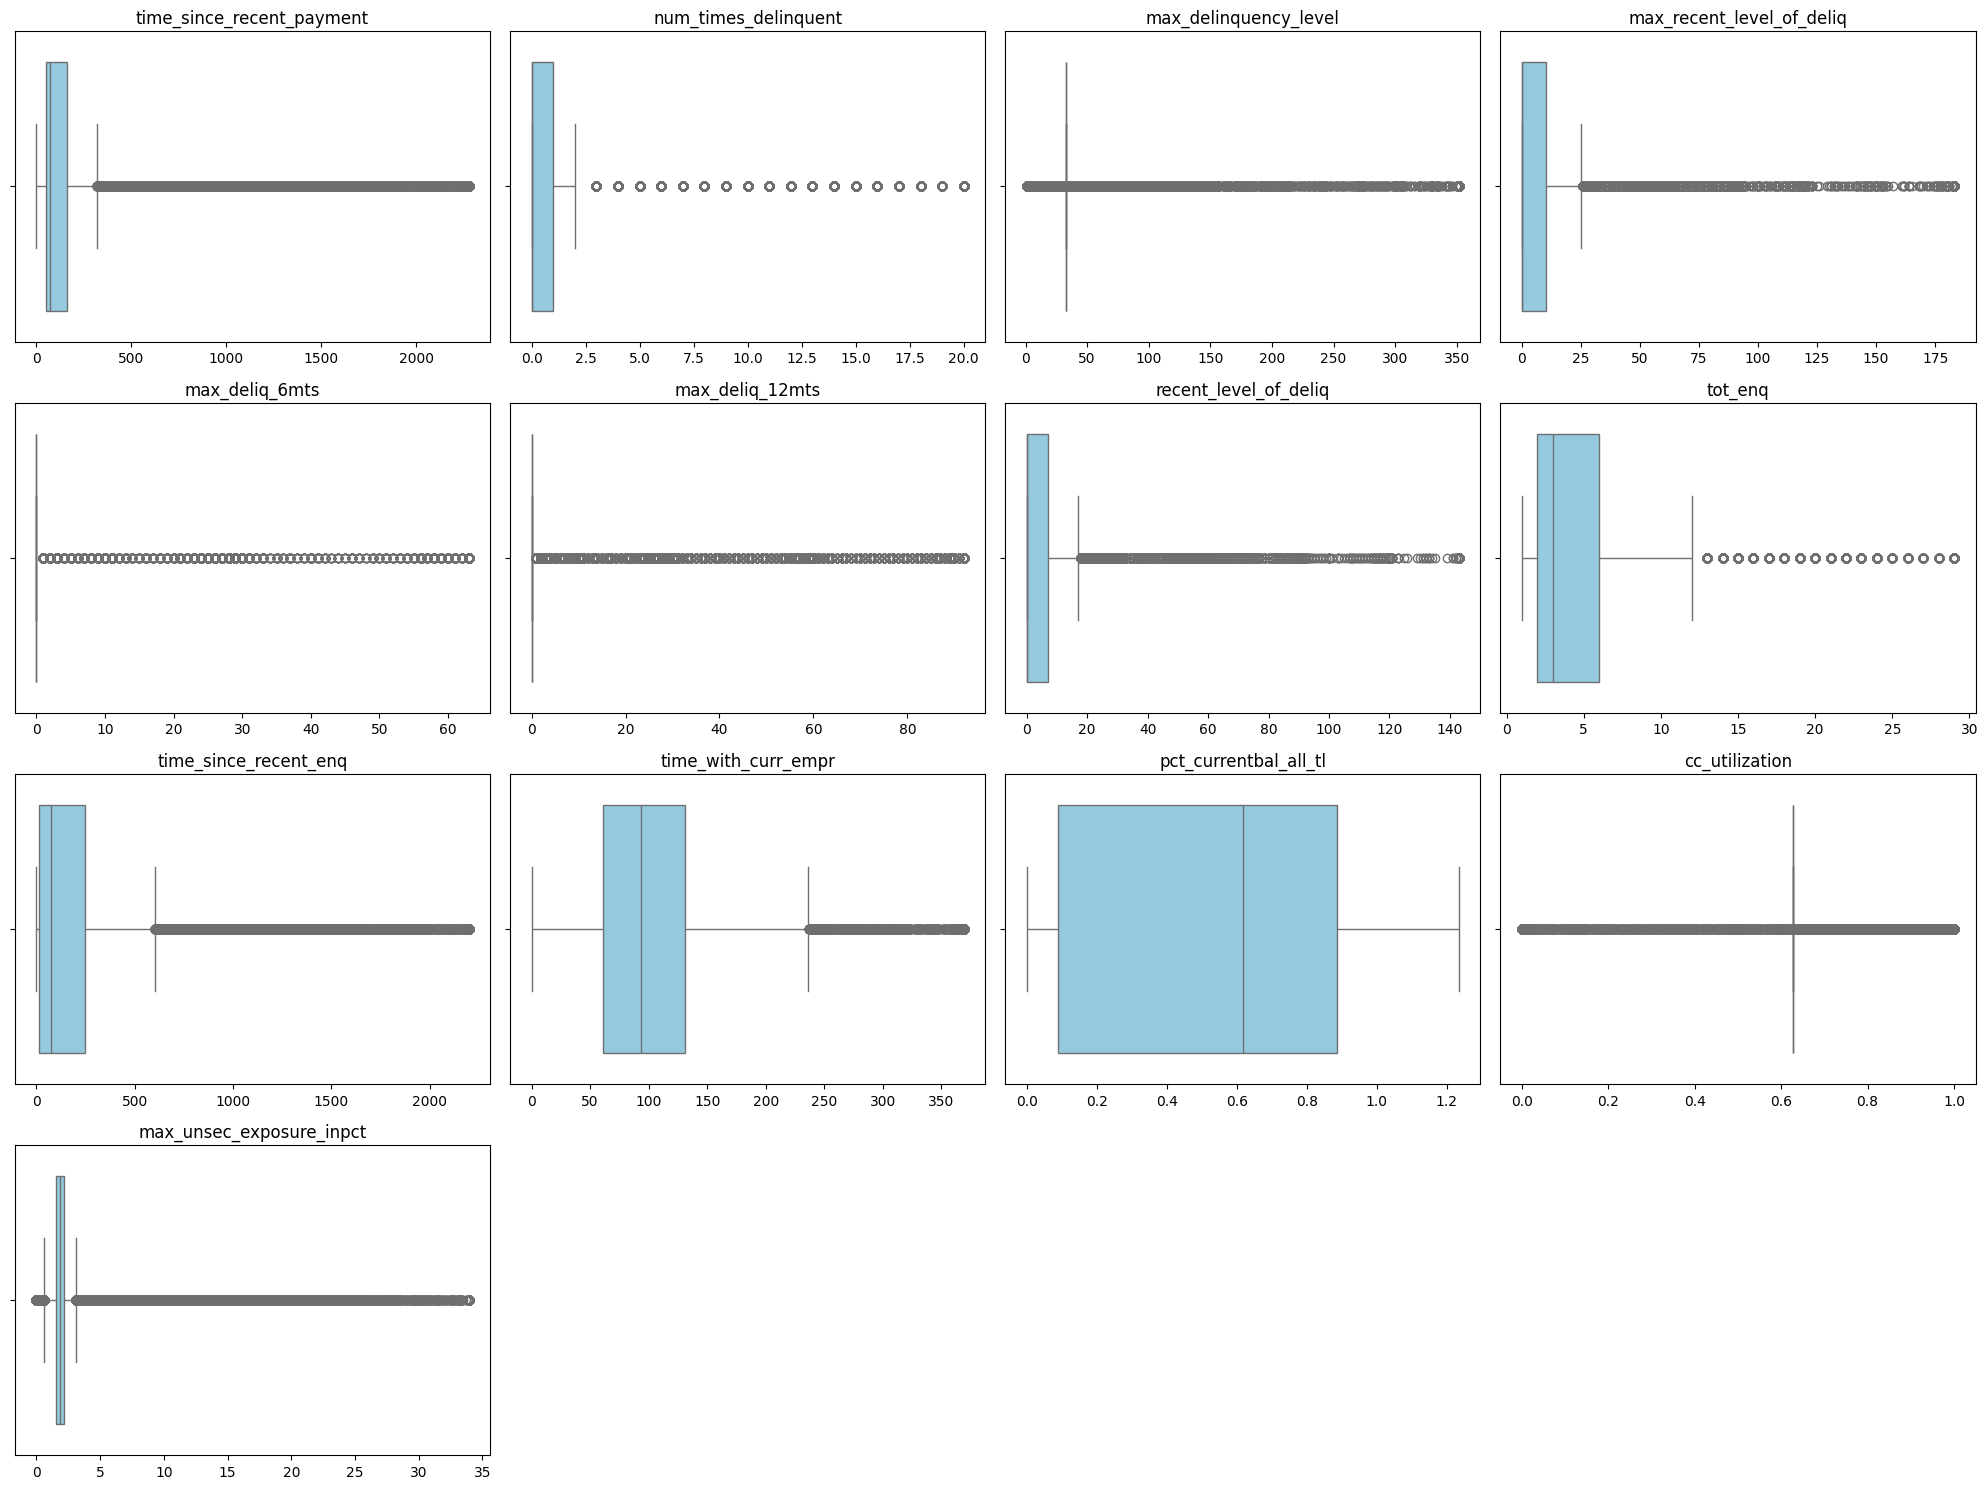

In [26]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15))

axes = axes.flatten()

for i, feature in enumerate(pot_outlier_features):
    sns.boxplot(x=df[feature], ax=axes[i], color='skyblue')
    axes[i].set_title(feature)
    axes[i].set_xlabel('')

for j in range(len(pot_outlier_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Feature Engineering

#### Skewness of Features

As seen before, significant amount of the data features are skewed. Skewed data can be a problem in machine learning and statistical modeling because it can distort the results of models, especially those that assume normality or symmetry of the input features (like linear regression, logistic regression).

So for linear/logistic regression, KNN, or SVM models, it's very usefull to handle skewed features, and transform them into a normal shaped distributions, using various techniques.

In [27]:
numeric_cols = df.select_dtypes(include='number').columns
skewness = df[numeric_cols].skew().sort_values(ascending=False)
skewness

num_lss_6mts                        106.337573
num_lss_12mts                       105.874785
num_lss                              71.504608
num_dbt_6mts                         61.209257
num_dbt_12mts                        51.182907
num_sub_6mts                         47.834258
netmonthlyincome                     42.199682
num_sub_12mts                        39.698117
num_dbt                              32.790791
num_sub                              22.059452
num_times_60p_dpd                     8.493916
cc_enq                                7.997089
cc_enq_l6m                            7.680042
cc_enq_l12m                           7.184237
num_times_30p_dpd                     6.882936
pl_enq_l6m                            6.828659
pl_enq_l12m                           6.464909
num_deliq_6mts                        5.255911
pl_enq                                5.246432
max_delinquency_level                 5.084475
num_deliq_6_12mts                     4.908567
num_deliq_12mts                       4.886139
enq_l6m                               4.879146
enq_l3m                               4.832842
enq_l12m                              4.669675
num_std                               4.663810
max_deliq_6mts                        4.426231
num_std_12mts                         4.142262
max_recent_level_of_deliq             4.122417
num_std_6mts                          4.042617
gl_flag                               3.995630
pct_cc_enq_l6m_of_ever                3.849516
max_unsec_exposure_inpct              3.818134
recent_level_of_deliq                 3.796038
max_deliq_12mts                       3.559364
pct_cc_enq_l6m_of_l12m                3.501995
num_times_delinquent                  3.274364
time_since_recent_payment             3.242034
time_since_recent_enq                 2.893555
cc_flag                               2.876761
tot_enq                               2.521875
time_since_recent_deliquency          2.075117
pl_flag                               1.777290
pct_pl_enq_l6m_of_ever                1.744328
pct_pl_enq_l6m_of_l12m                1.562972
time_with_curr_empr                   1.356567
hl_flag                               1.029798
has_max_delinquency_level             0.874294
has_time_since_first_deliquency       0.874294
has_time_since_recent_deliquency      0.874294
pct_opened_tls_l6m_of_l12m            0.831137
age                                   0.767589
credit_score                         -0.108031
pct_currentbal_all_tl                -0.210989
pct_of_active_tls_ever               -0.224001
time_since_first_deliquency          -0.438494
has_max_deliq_6mts                   -1.148031
has_max_deliq_12mts                  -1.416629
has_time_since_recent_enq            -2.293954
has_enq_l12m                         -2.293954
has_enq_l6m                          -2.293954
has_enq_l3m                          -2.293954
cc_utilization                       -2.563863
pl_utilization                       -3.605123
dtype: float64

/tmp/ipython-input-28-934015156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.values, y=skewness.index, palette='coolwarm')


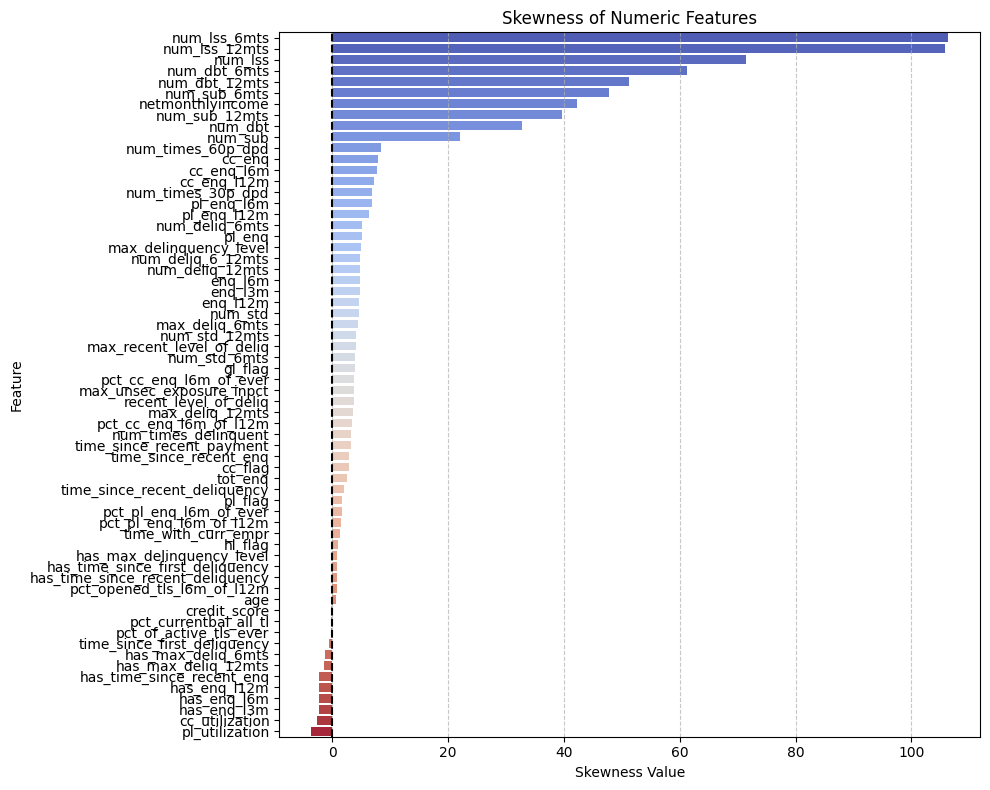

In [28]:
plt.figure(figsize=(10, 8))
sns.barplot(x=skewness.values, y=skewness.index, palette='coolwarm')
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Skewness of Numeric Features')
plt.xlabel('Skewness Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In this plot features on the right of the plot are right-skewed (long tail to the right), and opposite features on the left are left-skewed (long tail to the left).



Usually features with skew > 1 are considered highly skewed, and possibly require transformation.

In this analysis, the threshold would be chosen such that features with extremely high right-skewness (above 10, even > 100) will be transformed.

In [29]:
highly_skewed_features = skewness[(skewness > 10) | (skewness < -10)]
print(highly_skewed_features)

num_lss_6mts        106.337573
num_lss_12mts       105.874785
num_lss              71.504608
num_dbt_6mts         61.209257
num_dbt_12mts        51.182907
num_sub_6mts         47.834258
netmonthlyincome     42.199682
num_sub_12mts        39.698117
num_dbt              32.790791
num_sub              22.059452
dtype: float64


In [30]:
highly_skewed_cols = highly_skewed_features.index.tolist()
(df[highly_skewed_cols] < 0).sum()

num_lss_6mts        0
num_lss_12mts       0
num_lss             0
num_dbt_6mts        0
num_dbt_12mts       0
num_sub_6mts        0
netmonthlyincome    0
num_sub_12mts       0
num_dbt             0
num_sub             0
dtype: int64

In [31]:
(df[highly_skewed_cols] == 0).sum()

num_lss_6mts        51324
num_lss_12mts       51311
num_lss             51234
num_dbt_6mts        51320
num_dbt_12mts       51296
num_sub_6mts        51285
netmonthlyincome       46
num_sub_12mts       51178
num_dbt             51166
num_sub             50682
dtype: int64

Because the features contain many zero values and no negative values, a more flexible transformation suited for such data is the Yeo-Johnson transformation.

The Yeo-Johnson transformation can handle both zero and positive (or even negative) values, and is designed to normalize skewed distributions. It automatically selects the best transformation parameter to make the data more Gaussian-like, which can improve model performance and stability.

In [32]:
from sklearn.preprocessing import PowerTransformer

df_before = df.copy()

pt = PowerTransformer(method='yeo-johnson')

df[highly_skewed_cols] = pt.fit_transform(df[highly_skewed_cols])

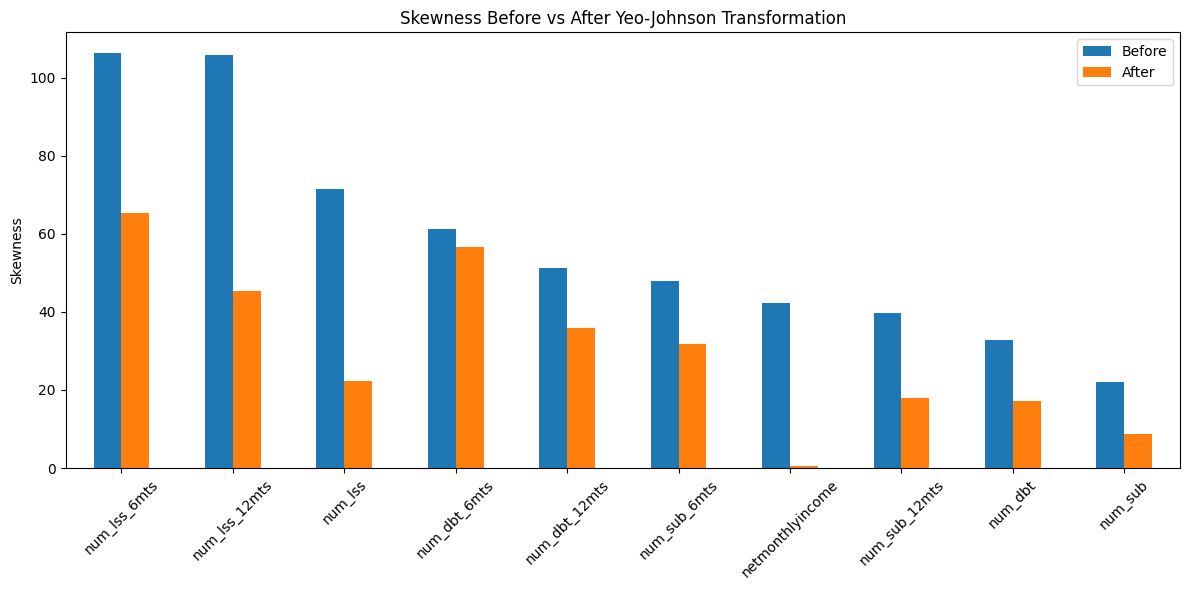

In [33]:
skew_before = df_before[highly_skewed_cols].skew()
skew_after = df[highly_skewed_cols].skew()

skew_df = pd.DataFrame({'Before': skew_before, 'After': skew_after})

skew_df.plot(kind='bar', figsize=(12, 6), title='Skewness Before vs After Yeo-Johnson Transformation')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


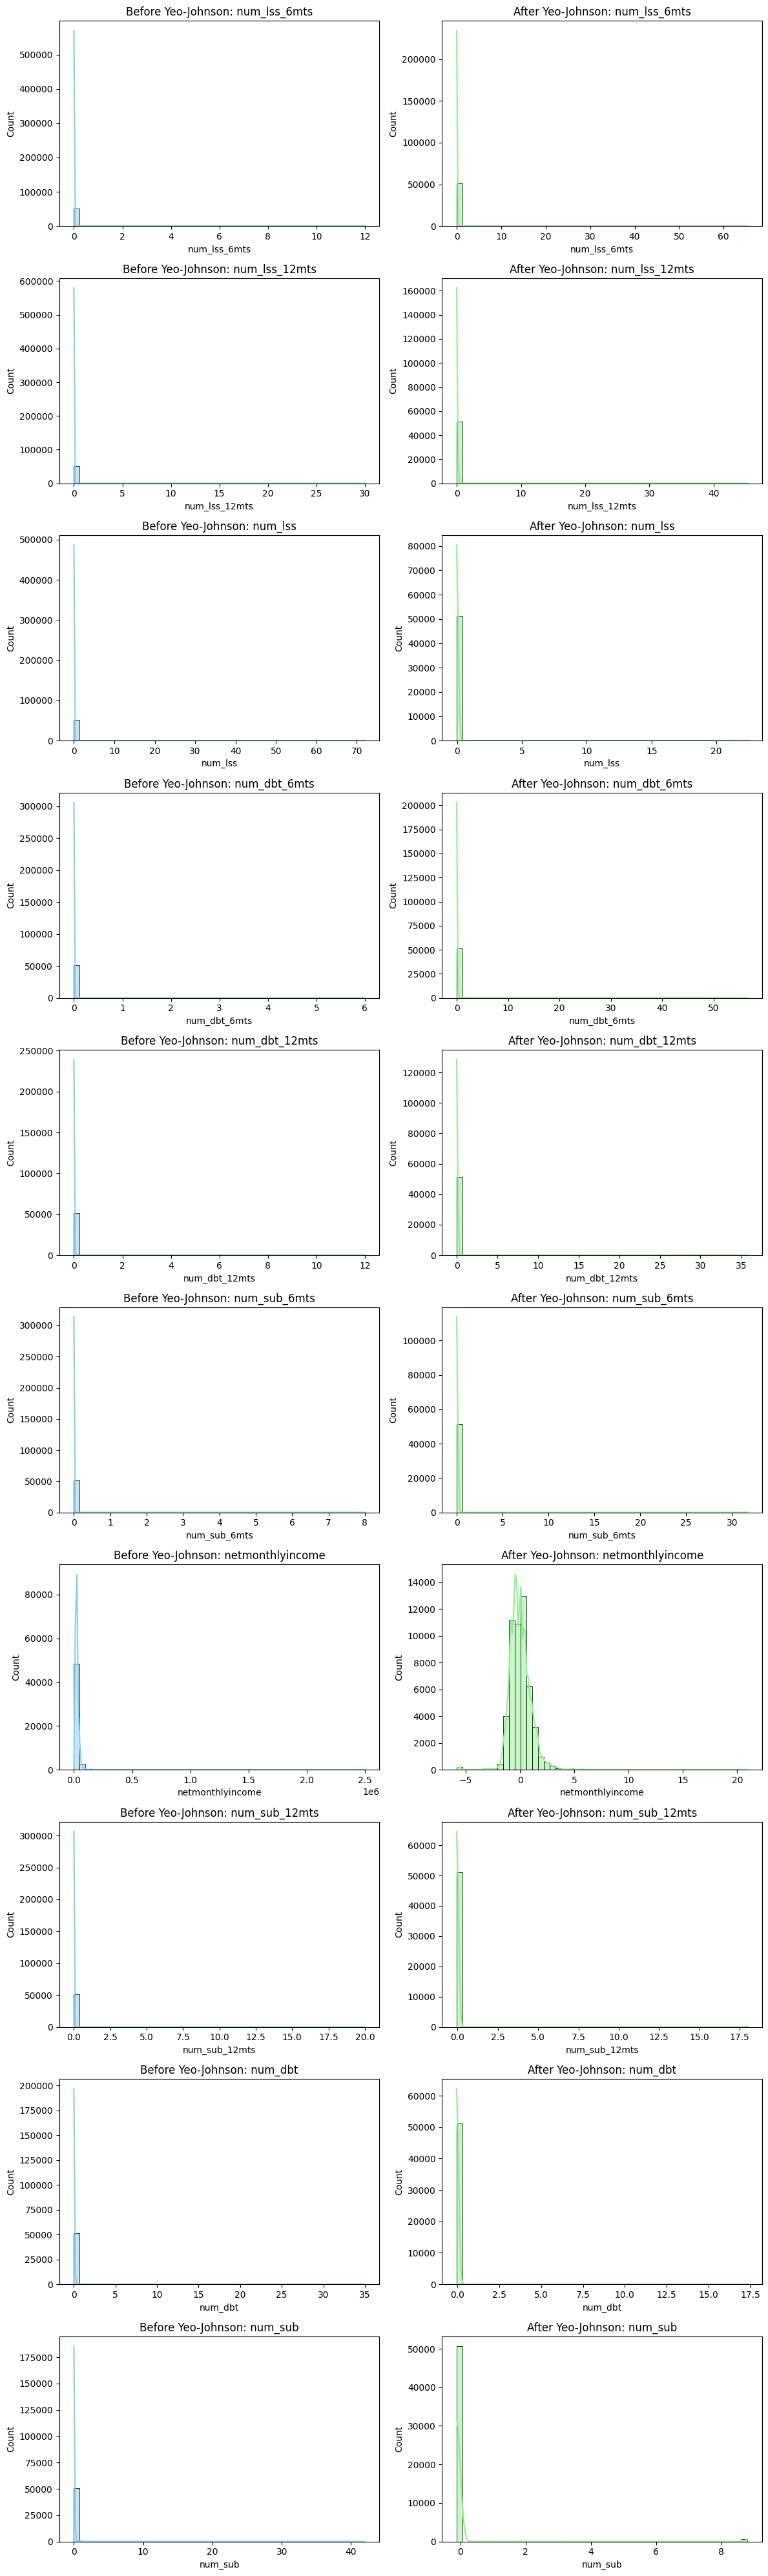

In [34]:
n_cols = 2
n_rows = len(highly_skewed_cols)

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(highly_skewed_cols):
    # Before
    plt.subplot(n_rows, n_cols, 2 * i + 1)
    sns.histplot(df_before[col], kde=True, bins=50, color='skyblue')
    plt.title(f"Before Yeo-Johnson: {col}")
    plt.xlabel(col)

    # After
    plt.subplot(n_rows, n_cols, 2 * i + 2)
    sns.histplot(df[col], kde=True, bins=50, color='lightgreen')
    plt.title(f"After Yeo-Johnson: {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [35]:
numeric_cols = df.select_dtypes(include='number').columns
skewness = df[numeric_cols].skew().sort_values(ascending=False)
skewness

num_lss_6mts                        65.385396
num_dbt_6mts                        56.618792
num_lss_12mts                       45.283113
num_dbt_12mts                       35.783734
num_sub_6mts                        31.680402
num_lss                             22.367954
num_sub_12mts                       17.942500
num_dbt                             17.291537
num_sub                              8.689806
num_times_60p_dpd                    8.493916
cc_enq                               7.997089
cc_enq_l6m                           7.680042
cc_enq_l12m                          7.184237
num_times_30p_dpd                    6.882936
pl_enq_l6m                           6.828659
pl_enq_l12m                          6.464909
num_deliq_6mts                       5.255911
pl_enq                               5.246432
max_delinquency_level                5.084475
num_deliq_6_12mts                    4.908567
num_deliq_12mts                      4.886139
enq_l6m                              4.879146
enq_l3m                              4.832842
enq_l12m                             4.669675
num_std                              4.663810
max_deliq_6mts                       4.426231
num_std_12mts                        4.142262
max_recent_level_of_deliq            4.122417
num_std_6mts                         4.042617
gl_flag                              3.995630
pct_cc_enq_l6m_of_ever               3.849516
max_unsec_exposure_inpct             3.818134
recent_level_of_deliq                3.796038
max_deliq_12mts                      3.559364
pct_cc_enq_l6m_of_l12m               3.501995
num_times_delinquent                 3.274364
time_since_recent_payment            3.242034
time_since_recent_enq                2.893555
cc_flag                              2.876761
tot_enq                              2.521875
time_since_recent_deliquency         2.075117
pl_flag                              1.777290
pct_pl_enq_l6m_of_ever               1.744328
pct_pl_enq_l6m_of_l12m               1.562972
time_with_curr_empr                  1.356567
hl_flag                              1.029798
has_max_delinquency_level            0.874294
has_time_since_first_deliquency      0.874294
has_time_since_recent_deliquency     0.874294
pct_opened_tls_l6m_of_l12m           0.831137
age                                  0.767589
netmonthlyincome                     0.629273
credit_score                        -0.108031
pct_currentbal_all_tl               -0.210989
pct_of_active_tls_ever              -0.224001
time_since_first_deliquency         -0.438494
has_max_deliq_6mts                  -1.148031
has_max_deliq_12mts                 -1.416629
has_time_since_recent_enq           -2.293954
has_enq_l12m                        -2.293954
has_enq_l6m                         -2.293954
has_enq_l3m                         -2.293954
cc_utilization                      -2.563863
pl_utilization                      -3.605123
dtype: float64

In [44]:
highly_skewed_features = skewness[(skewness > 10) | (skewness < -10)]
print(highly_skewed_features)

num_lss_6mts     65.385396
num_dbt_6mts     56.618792
num_lss_12mts    45.283113
num_dbt_12mts    35.783734
num_sub_6mts     31.680402
num_lss          22.367954
num_sub_12mts    17.942500
num_dbt          17.291537
dtype: float64


Despite applying the transformation, many features remained highly skewed, with several showing extreme right-skew (e.g., num_lss_6mts with skewness over 65).

Such extreme skewness can negatively impact the performance of linear models or models that assume normally distributed features. In particular, it may distort model coefficients, reduce interpretability, and degrade generalization.

To address this, binning will be applied (discretization) to the most skewed features. This technique converts continuous variables into categorical bins, helping to mitigate the impact of outliers, reduce skew, and potentially highlight nonlinear relationships that linear models would otherwise miss.



#### Binning (Discretization) to further resolve skewness

For discretization, the features with very high and values which differ drastically from normal limits were chosen.

In [45]:
for col in highly_skewed_features.index:
    print(f"\n--- Percentiles for {col} ---")
    print(df[col].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .99]).loc[['min', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '95%', '99%', 'max']].to_string())


--- Percentiles for num_lss_6mts ---
min    -0.015291
10%    -0.015291
20%    -0.015291
30%    -0.015291
40%    -0.015291
50%    -0.015291
60%    -0.015291
70%    -0.015291
80%    -0.015291
90%    -0.015291
95%    -0.015291
99%    -0.015291
max    65.398777

--- Percentiles for num_dbt_6mts ---
min    -0.017657
10%    -0.017657
20%    -0.017657
30%    -0.017657
40%    -0.017657
50%    -0.017657
60%    -0.017657
70%    -0.017657
80%    -0.017657
90%    -0.017657
95%    -0.017657
99%    -0.017657
max    56.634795

--- Percentiles for num_lss_12mts ---
min    -0.022073
10%    -0.022073
20%    -0.022073
30%    -0.022073
40%    -0.022073
50%    -0.022073
60%    -0.022073
70%    -0.022073
80%    -0.022073
90%    -0.022073
95%    -0.022073
99%    -0.022073
max    45.303863

--- Percentiles for num_dbt_12mts ---
min    -0.027925
10%    -0.027925
20%    -0.027925
30%    -0.027925
40%    -0.027925
50%    -0.027925
60%    -0.027925
70%    -0.027925
80%    -0.027925
90%    -0.027925
95%    -0.027

##### Visualize with violin plots distribution and density

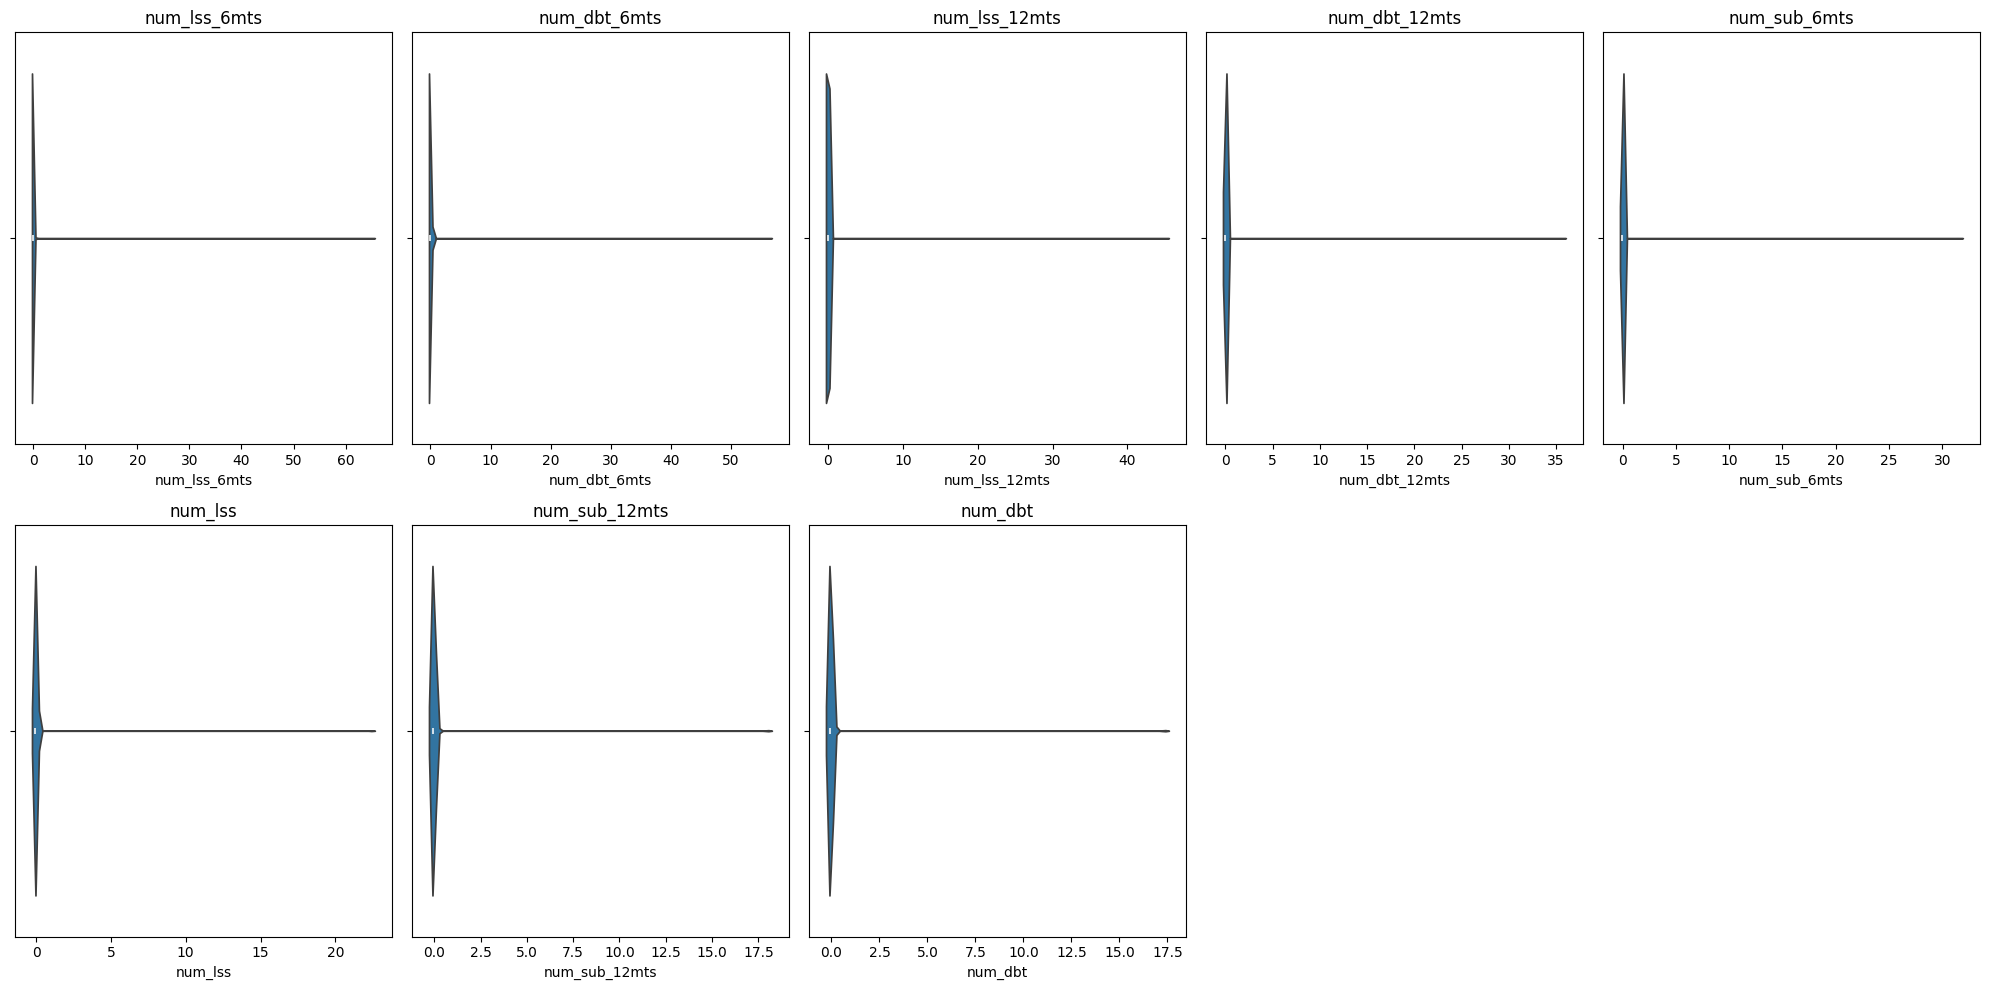

In [46]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(highly_skewed_features.index):
    plt.subplot(2, 5, i + 1)
    sns.violinplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


After examining the distribution and percentile values of each attribute, it is clear that many highly skewed features have over 99% of their values concentrated around a single constant or close to constant value, with only a small portion having significantly different large outliers. In such cases, a custom binning (discretization) strategy will be used — group the dense majority into one bin, and separating the rare, higher values into distinct bins. This method helps reduce the impact of extreme skewness and simplifies the feature space.  

##### Create binary discretized column: 0 if <= 99th percentile, 1 if > 99th

In [47]:
for col in highly_skewed_features.index:
    percentiles = df[col].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .99])
    threshold = percentiles['99%']
    df[f"{col}_disc"] = (df[col] > threshold).astype(int)


In [49]:
df.shape

(51336, 78)

### Univariate Visualizations

#### Categorical Features

##### Distribution of features

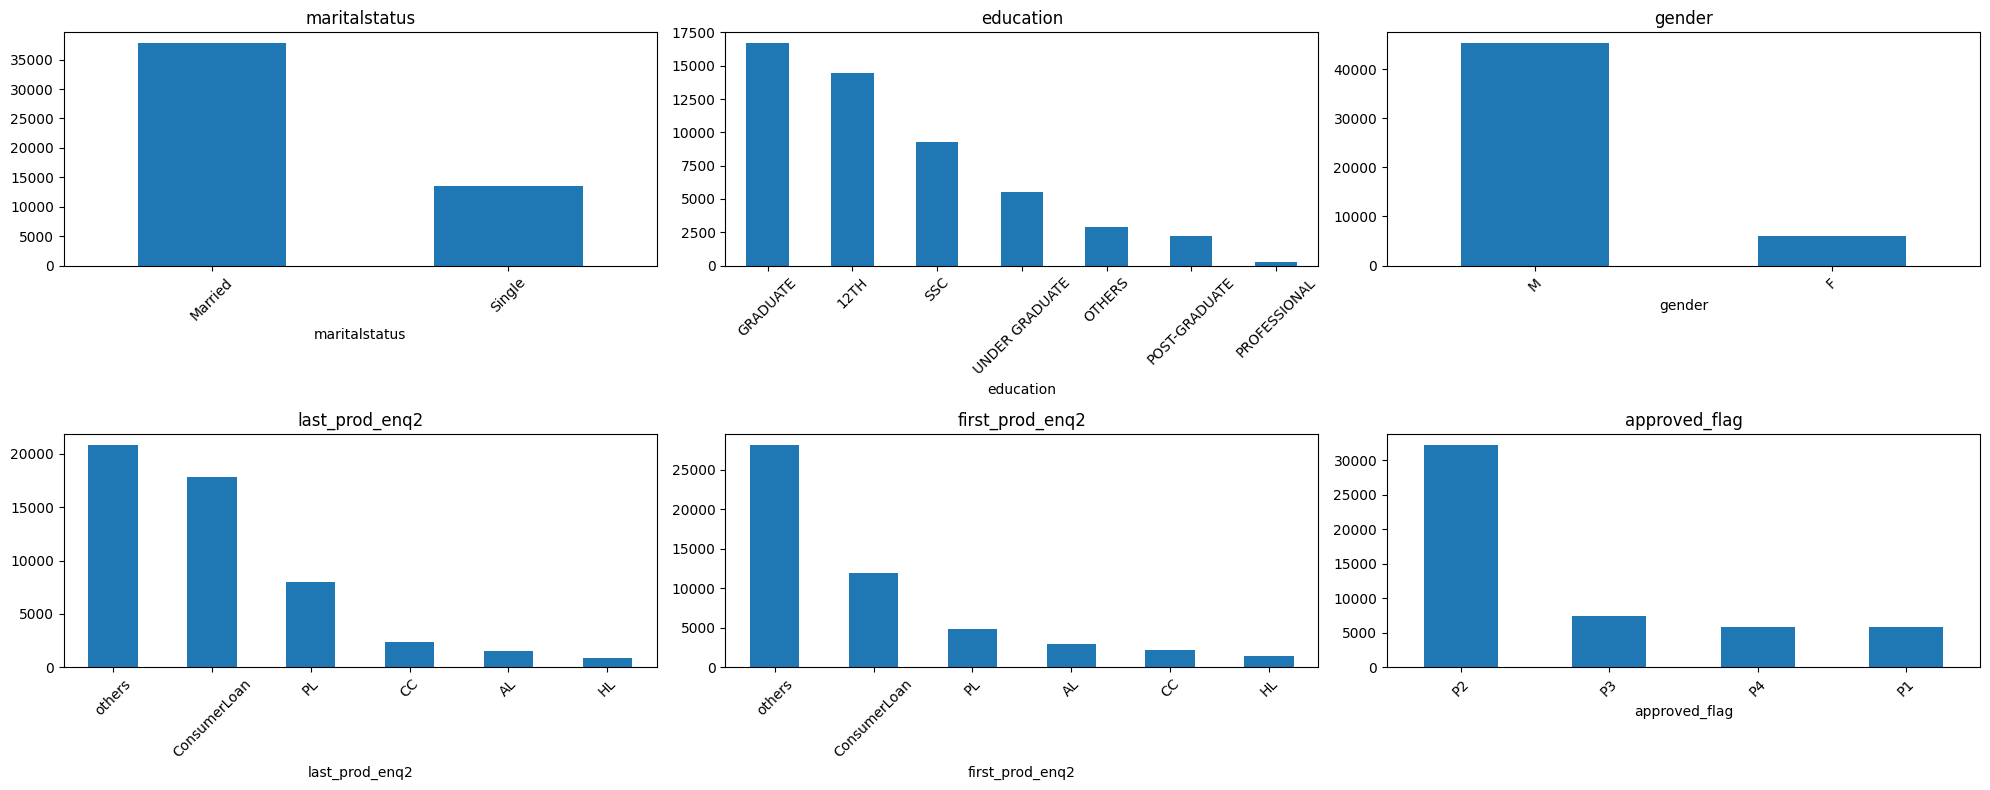

In [50]:
categorical_cols = df.select_dtypes(exclude='number').columns

cols = 3
rows = (len(categorical_cols) + cols - 1) // cols
plt.figure(figsize=(20, rows * 4))

for i, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, i + 1)
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


##### Proportion of each category within feature

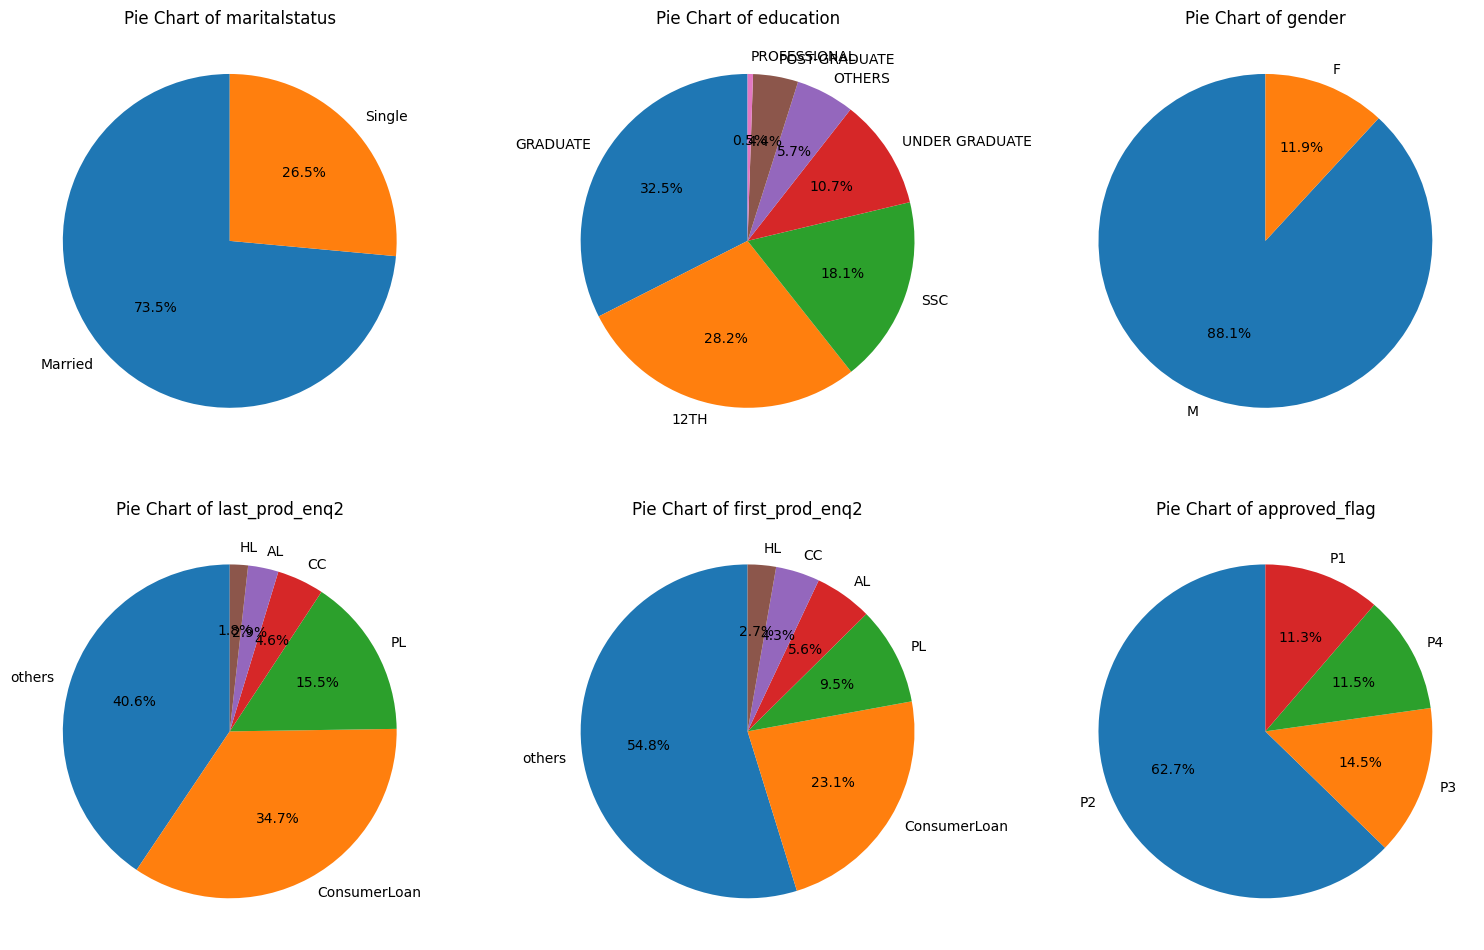

In [51]:
filtered_cats = [col for col in categorical_cols if df[col].nunique() <= 7]

cols = 3
rows = (len(filtered_cats) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()

for i, col in enumerate(filtered_cats):
    df[col].value_counts(dropna=False).plot.pie(
        autopct='%1.1f%%',
        ax=axes[i],
        startangle=90
    )
    axes[i].set_title(f'Pie Chart of {col}')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Distribution of categorical features reveal:

- approval_flag: This target variable presents reveals a significant class imbalance. With P2 being the dominant class (over 30,000 instances), it  outnumbers P1 (around 9,000 instances), while P3 and P4 are minority classes (each 5,000-6,000 instances). This imbalance implies that during classification, models will likely perform very well on the majority P2 class but not so accurately predict the less frequent P1, P3, and P4 outcomes, so techniques like oversampling, undersampling are going to be used to fix this issue.

- maritalstatus: The vast majority of applicants are Married (over 35,000 or 73.5%), significantly outnumbering Single applicants (around 12,000 or 26.5%).

- education: The most common education level among applicants is GRADUATE (around 17,000 or 32.5%), followed by 12TH grade (around 14,000 or 28.2%). There's a descending trend from Graduate to Professional degrees, indicating that most of applicants have lower formal education backgrounds.

- gender: There's an imbalance here: the dataset is heavily dominated by Male (M) applicants (over 40,000 or 88.1%), with Female (F) applicants making up a much smaller proportion (around 7,000 or 11.9%).

- first_prod_enq2 and last_prod_enq2: The most dominant class is others, suggesting a large portion of inquiries are for products not listed (Consumer Loan, PL, CC, AL, HL) or are aggregated into this category.

#### Numerical Features

##### Distribution of features

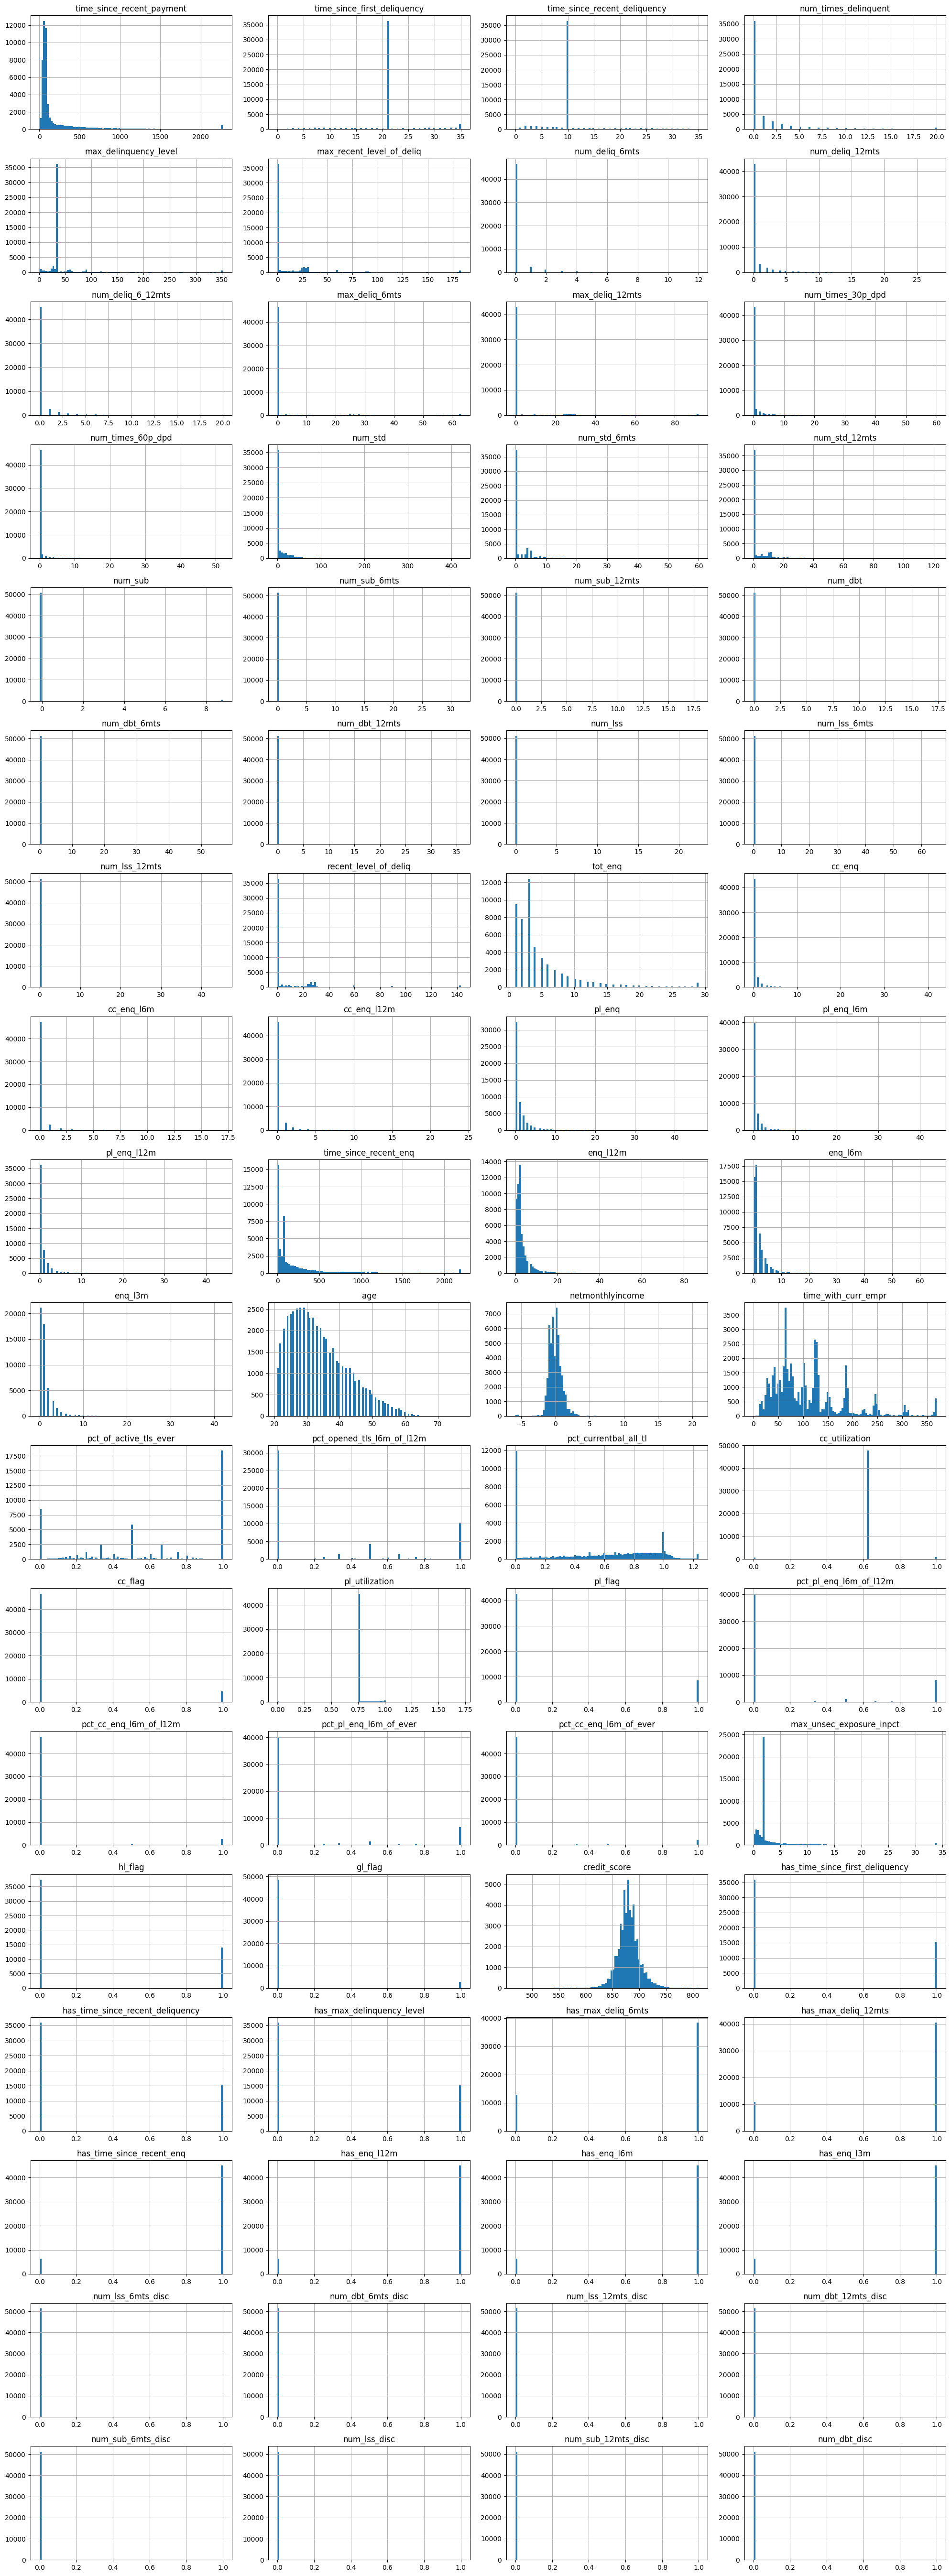

In [52]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns

cols = 4
rows = (len(numeric_cols) + cols - 1) // cols
plt.figure(figsize=(20, rows * 3))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    df[col].dropna().hist(bins=100)
    plt.title(col)
    plt.tight_layout()

plt.show()


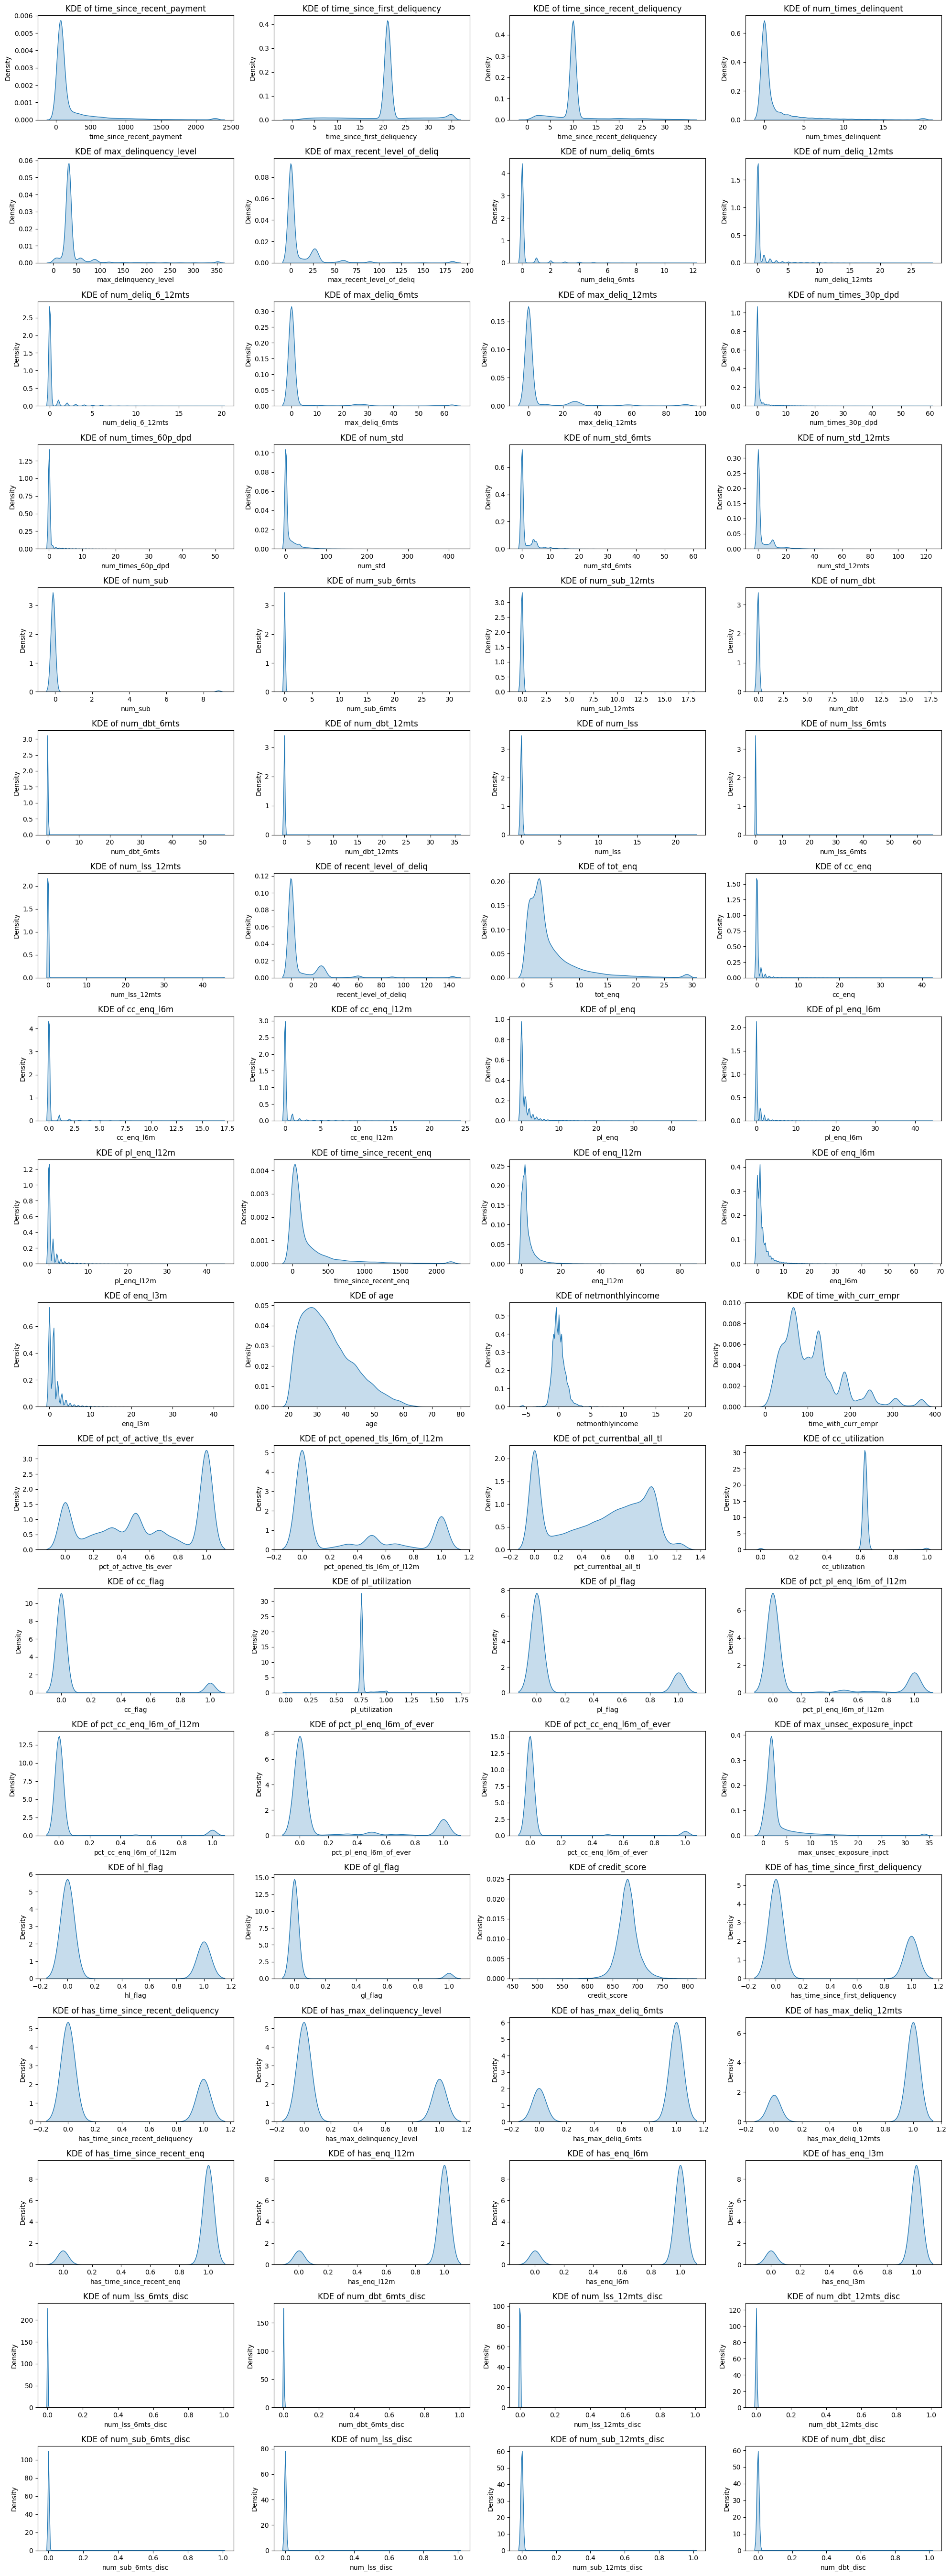

In [53]:
plt.figure(figsize=(20, rows * 3))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(df[col].dropna(), fill=True)
    plt.title(f'KDE of {col}')
    plt.tight_layout()

plt.show()

Insights:

- Heavily Right-Skewed Distributions (Long Tail on the Right)

Examples include: time_since_recent_payment, time_since_recent_delinquency, num_times_delinquent, netmonthlyincome, cc_enq, pl_enq, tot_enq, max_recent_level_of_delig, time_with_curr_empr.  This might suggest that most users/clients have low values for these attributes, but there are a few  with extremely high values. We already performed skew transformation to make such features more normal-like.


- Peaks at 0 and 1

Flags (cc_flag, pl_flag, hi_flag, gf_flag) clearly show bimodal spikes at 0 and 1.
Features like pct_cc_eng_l6m_of_12m and pct_pl_eng_l6m_of_ever also show sharp peaks at 0 and 1.

This may indicate a binomial distribution where a client eather has - 1 or doesn't have - 0, that particular property.


- Multiple Peaks (Multimodal Distributions)

pct_of_active_tls_ever, pct_opened_tls_l6m_of_12m have multiple peaks, indicating there may be distinct subpopulations.

### Multivariate Analysis

Goal:

- How features interact with each other
- Which features correlate with the target (credit_score or approved_flag)
- Patterns across segments (e.g. income vs. delinquencies)


#### Checking if 'approved_flag' is a derived from 'credit_score'

Visual Inspection with Boxplot

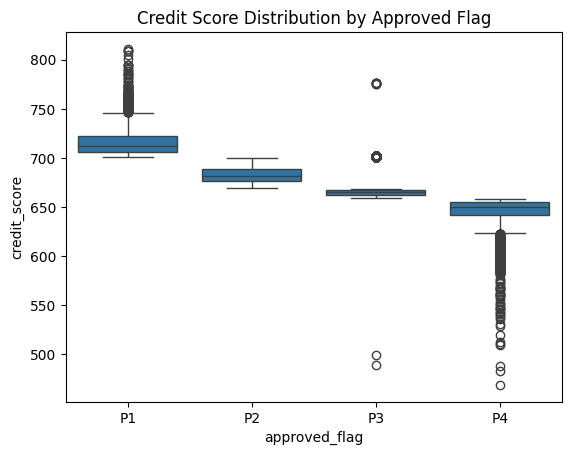

In [54]:
sns.boxplot(data=df, x='approved_flag', y='credit_score')
plt.title('Credit Score Distribution by Approved Flag')
plt.show()


In [55]:
df.groupby('approved_flag')['credit_score'].agg(['min', 'max', 'mean', 'count'])

/tmp/ipython-input-55-711042610.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('approved_flag')['credit_score'].agg(['min', 'max', 'mean', 'count'])


min    max        mean  count
approved_flag                                 
P1             701.0  811.0  715.952266   5803
P2             669.0  700.0  682.584614  32199
P3             489.0  776.0  666.995035   7452
P4             469.0  658.0  645.629548   5882

The ranges for credit_score are not overlapping, which is indication of *discretization*.

##### Training a simple decision tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df[['credit_score']]
y = df['approved_flag']

model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)
preds = model.predict(X)

print("Accuracy:", accuracy_score(y, preds))

Accuracy: 0.9955002337540907


In [57]:
from sklearn.tree import export_text
print(export_text(model, feature_names=['credit_score']))


|--- credit_score <= 668.50
|   |--- credit_score <= 658.50
|   |   |--- credit_score <= 504.00
|   |   |   |--- class: P4
|   |   |--- credit_score >  504.00
|   |   |   |--- class: P4
|   |--- credit_score >  658.50
|   |   |--- class: P3
|--- credit_score >  668.50
|   |--- credit_score <= 700.50
|   |   |--- class: P2
|   |--- credit_score >  700.50
|   |   |--- credit_score <= 702.50
|   |   |   |--- class: P3
|   |   |--- credit_score >  702.50
|   |   |   |--- class: P1



This further confirms that approved_flag is derived from credit_score using threshold-based discretization, and therefore should not be treated as an independent target if credit_score is already available.

For classification tasks, I will use approved_flag as the target variable.

For regression tasks, I will instead use credit_score as the target.

Additionally, when predicting credit_score through regression models, the corresponding approved_flag can be derived by mapping the predicted score through the trained decision tree. This allows for translating continuous risk predictions into categorical approval decisions (values P1–P4) in a consistent and interpretable way.



#### Interaction between categorical features and target variable

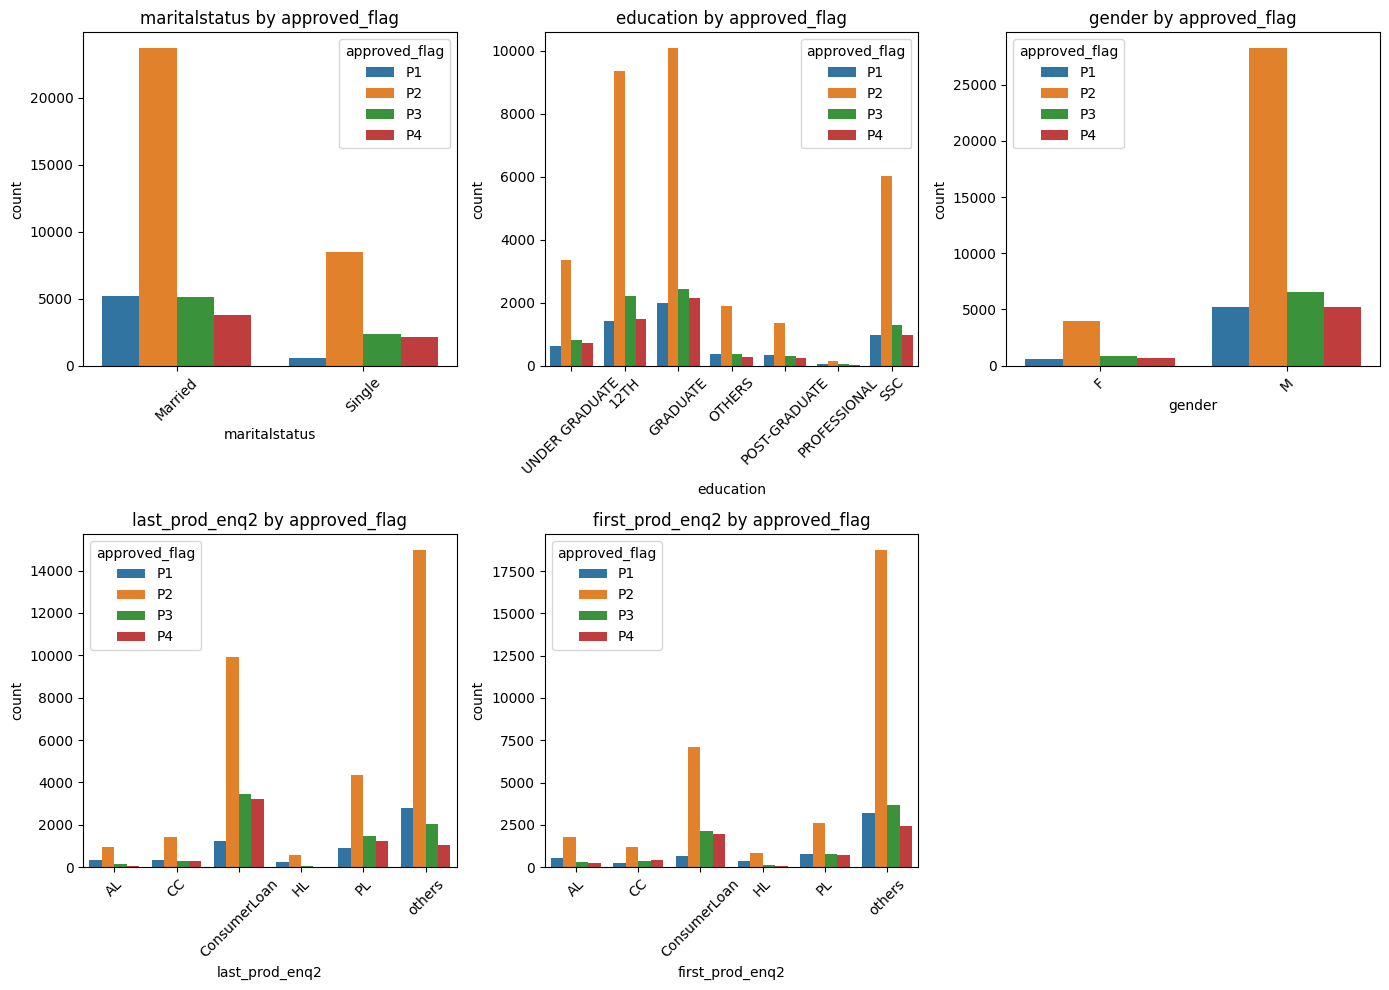

In [58]:
cat_cols = df.select_dtypes(include='category').columns.tolist()
target = 'approved_flag'

cat_cols.remove(target)

n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue=target, ax=axes[i])
    axes[i].set_title(f"{col} by {target}")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


From these count plots, the target class has a major problem with imbalance, because for every value in each categorical feature, this target value (most notably P2) dominates across every category. Also, because of class imbalance between the features themselves, some categories have significantly more samples than others, which makes their bars appear much taller in the count plots. This can mislead interpretation, as the differences in height may reflect the number of samples per group rather than meaningful differences in the target distribution.

To resolve this and focus on relative class distributions, normalized stacked bar plots are used. These plots adjust each bar to the same height (100%) and show the proportion of target classes within each category, giving a clearer picture of how the target variable is distributed across groups.

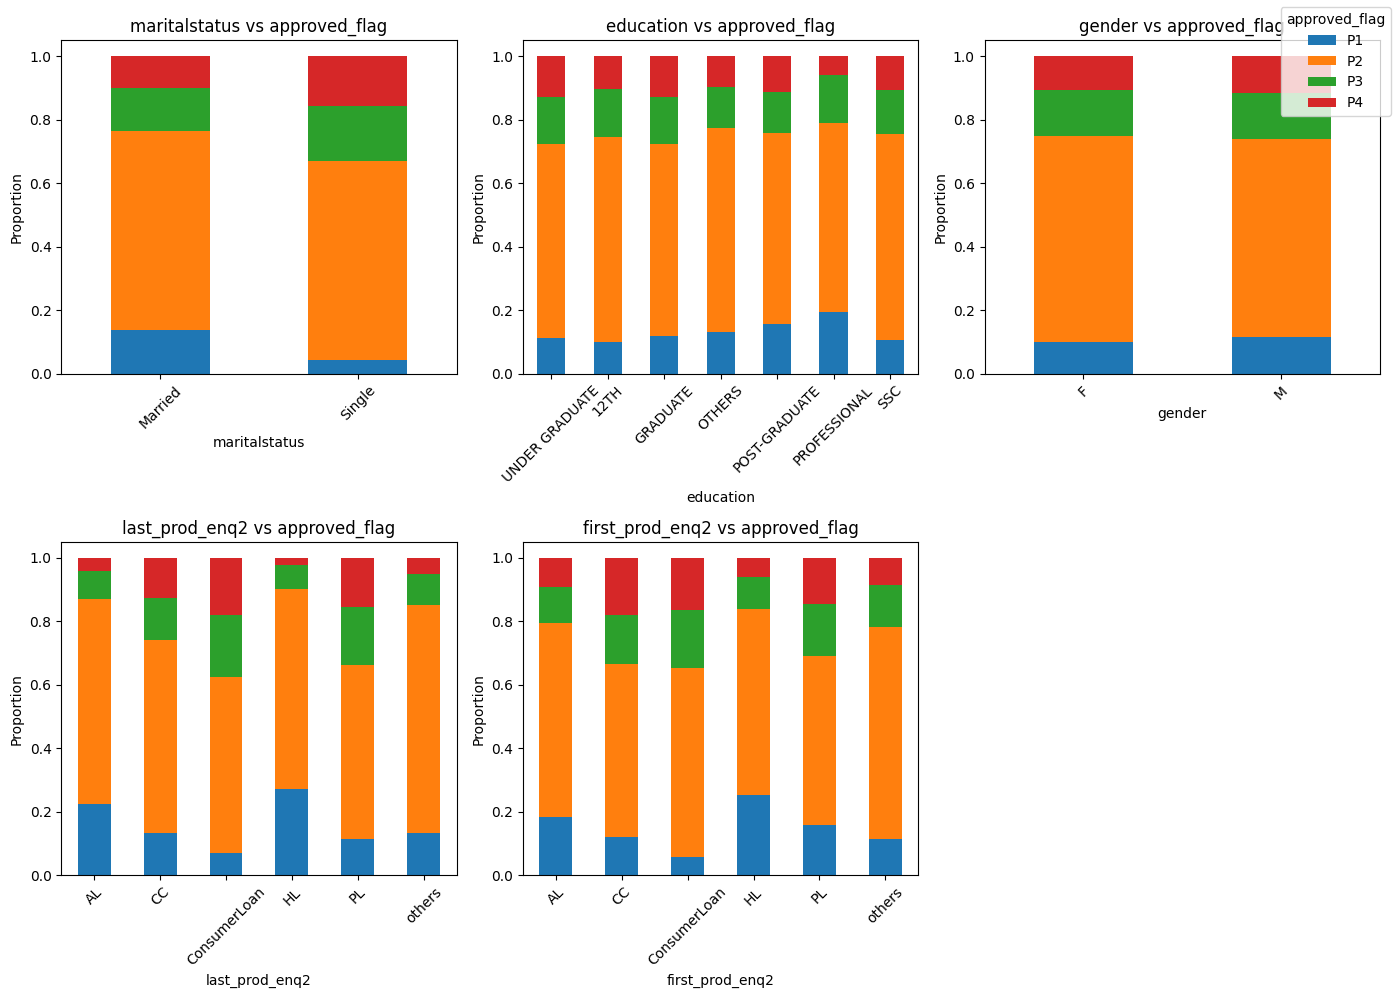

In [59]:
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    cross_tab = pd.crosstab(df[col], df[target], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], legend=False)
    axes[i].set_title(f"{col} vs {target}")
    axes[i].set_ylabel("Proportion")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title=target, loc='upper right')

plt.tight_layout()
plt.show()


Here is more clealy visible that some of the categories within the features have same or similar proportion of target classes. For example here we see that in the attribute 'gender', both 'male' and 'female' categories the proportion of the target class values are nearly the same (something not clearly visible with the previous plot).

Across all education levels, P2 dominates, suggesting it's the most common approval outcome.

To measure association between these categorical variables and the output variable, here is used Cramér’s V is an appropriate test to quantify the association between two categorical variables.

In [60]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

scores_cramer_v = []
for cat in cat_cols:
    score = cramers_v(df[cat], df['approved_flag'])
    scores_cramer_v.append((cat, score))
    print(f'Cramér’s V test between target approved_flag and {cat}: {score}')



Cramér’s V test between target approved_flag and maritalstatus: 0.15213209657749863
Cramér’s V test between target approved_flag and education: 0.03824344737759827
Cramér’s V test between target approved_flag and gender: 0.01935421367514885
Cramér’s V test between target approved_flag and last_prod_enq2: 0.15559523225298236
Cramér’s V test between target approved_flag and first_prod_enq2: 0.109099657861893


From these results we see that maritalstatus, first_prod_enq2 and last_prod_enq2 have small but notable (low-to-moderate) association.

While edication and gender provide little to none association with the target variable, using this type of test.

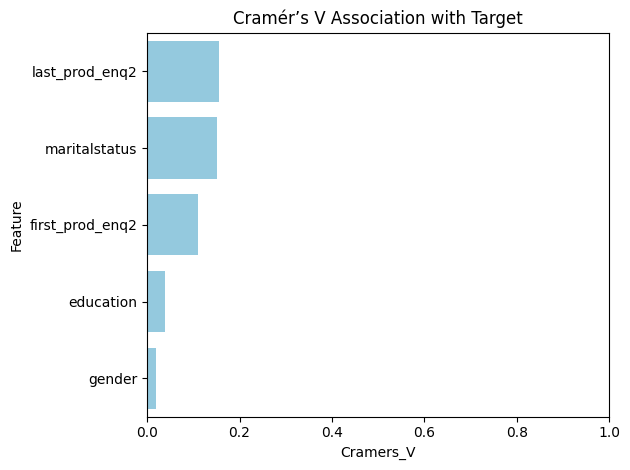

In [61]:
result = pd.DataFrame(scores_cramer_v, columns=['Feature', 'Cramers_V']).sort_values('Cramers_V', ascending=False)

sns.barplot(data=result, x='Cramers_V', y='Feature', color='skyblue')
plt.title("Cramér’s V Association with Target")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

#### Associations between categorical features as heatmap

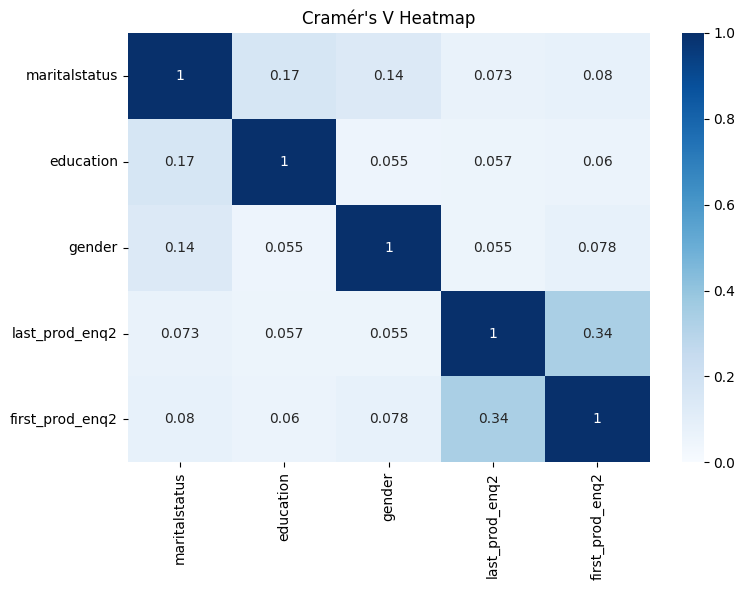

In [62]:
def cramers_v_matrix(df, cat_cols):
    matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)
    for col1 in cat_cols:
        for col2 in cat_cols:
            matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    return matrix.astype(float)

cramers_matrix = cramers_v_matrix(df, cat_cols)

plt.figure(figsize=(8, 6))
sns.heatmap(cramers_matrix, annot=True, cmap="Blues", vmin=0, vmax=1)
plt.title("Cramér's V Heatmap")
plt.tight_layout()
plt.show()


The heatmap shows that most of the categorical features have very low Cramér’s V values, meaning there is little or no strong relationship between them. The only pair with a somewhat noticeable association is first_prod_enq2 and last_prod_enq2, with a value of 0.34, which is still considered low.

This suggests that there is no clear risk of multicollinearity between the categorical features.

#### Interaction between numerical features and target variable

Here, the attribute credit_score will be used as the target variable, because, as shown previously, it represents a continuous measure of credit risk from which the categorical variable approved_flag is derived through discretization.

##### Correlation coeficients

In [63]:
num_features = df.select_dtypes(include='number').columns.drop('credit_score').tolist()

Pearson correlation coeficient (measurement of linear relationship between two continuous variables)

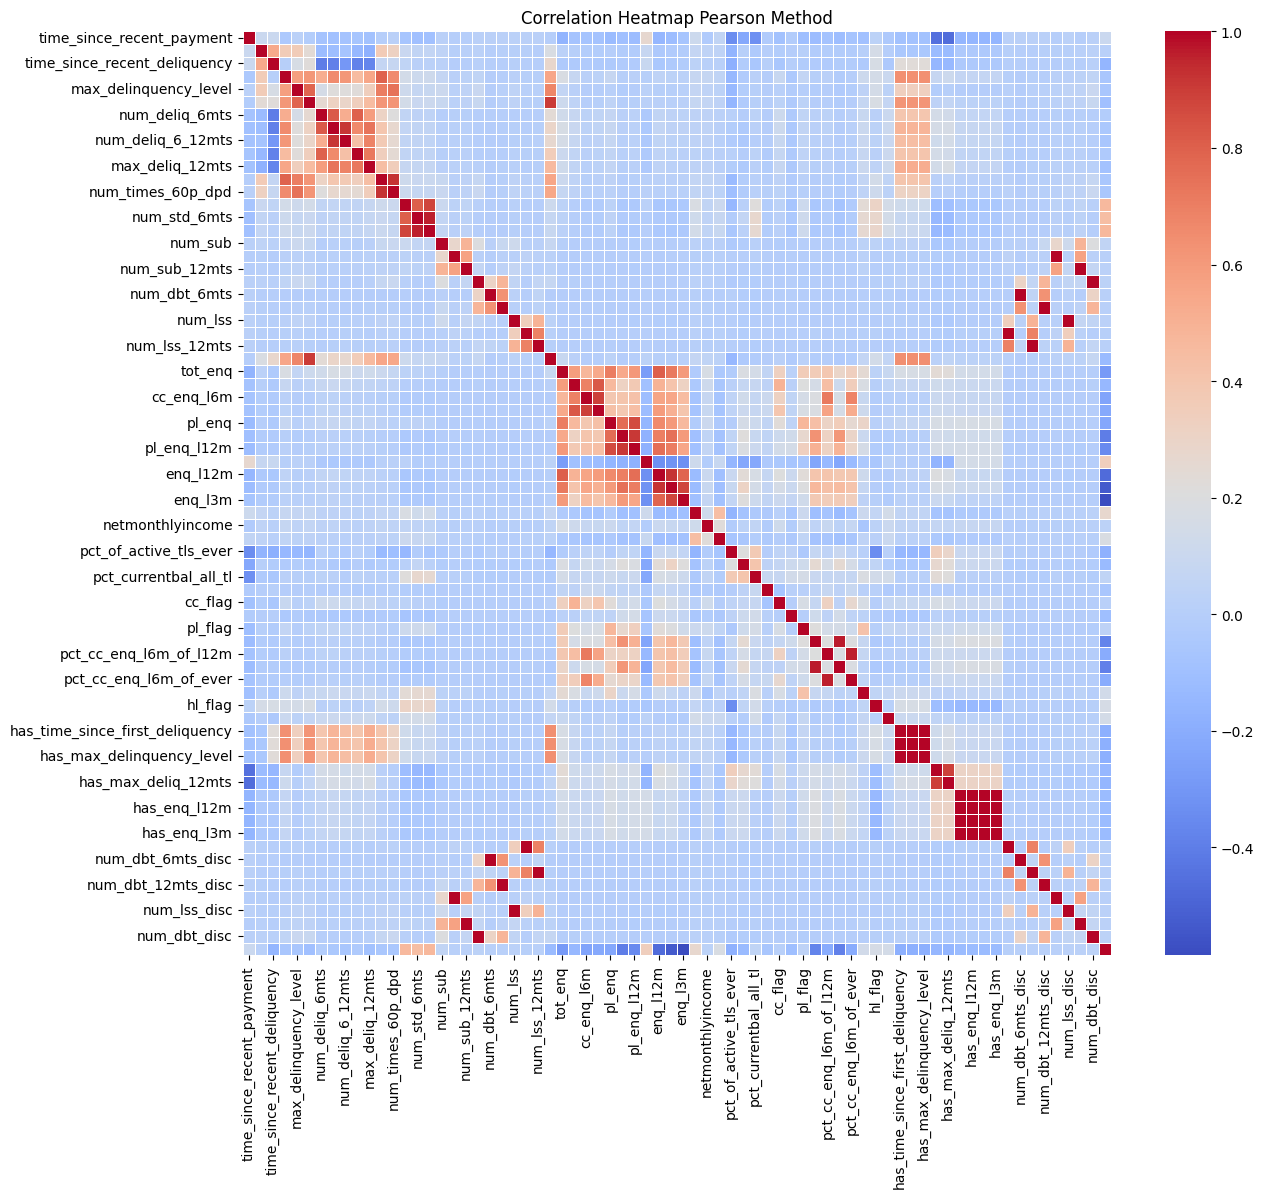

In [64]:
plt.figure(figsize=(14, 12))
sns.heatmap(df[num_features + ['credit_score']].corr(method='pearson'), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title(f'Correlation Heatmap Pearson Method')
plt.show()

In [65]:
correlations_pearson = df[num_features + ['credit_score']].corr(method='pearson')['credit_score']
correlations_pearson = correlations_pearson.drop('credit_score')
print(correlations_pearson.sort_values(ascending=False))


num_std_12mts                       0.470303
num_std                             0.464193
num_std_6mts                        0.441837
time_since_recent_enq               0.339816
age                                 0.272582
time_with_curr_empr                 0.180477
hl_flag                             0.162458
gl_flag                             0.149753
max_unsec_exposure_inpct            0.138014
time_since_recent_payment           0.101791
num_sub                             0.055372
pct_currentbal_all_tl               0.052200
pl_flag                             0.037956
num_dbt                             0.032429
num_dbt_disc                        0.032429
netmonthlyincome                    0.029965
num_sub_12mts_disc                  0.022251
num_sub_12mts                       0.022251
num_lss                             0.022133
num_lss_disc                        0.022133
num_dbt_12mts_disc                  0.015276
num_dbt_12mts                       0.015276
num_sub_6m

/tmp/ipython-input-66-862013321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_corr_pearson.values,


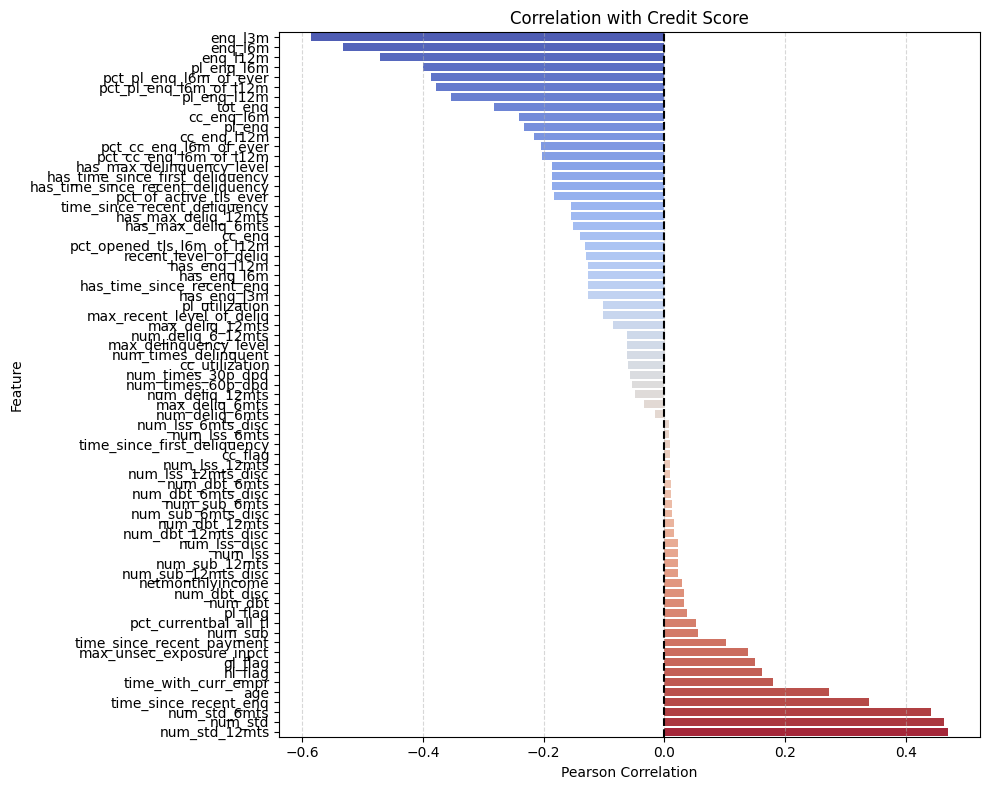

In [66]:
sorted_corr_pearson = correlations_pearson.sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_corr_pearson.values,
            y=sorted_corr_pearson.index,
            palette='coolwarm')

plt.axvline(x=0, color='black', linestyle='--')
plt.title('Correlation with Credit Score')
plt.xlabel('Pearson Correlation')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Based on the correlation barplot,
most features have relatively
weak to moderate linear relationships with the credit_score target.
The highest positive correlation is just above 0.4, while the strongest
negative correlation is slightly below -0.6, indicating that no feature
alone strongly determines the credit score linearly. However, a few features  (e.g., num_std_12mts, num_std, and num_sub_6mts) show moderate positive correlations,
 and on the other side, features like enq_l3m
 and enq_l6m are moderately negatively correlated, implying that recent inquiries could lower
 the credit score. Overall, while individual linear correlations are not very strong, some
 are potentially significant while testing with pearson coefficient for linear correlation.

 Also from the previous heatmap, there are some features that are highly correlated indicating multicolinearity problem with the dataset. This will be discussed later on.


Spearman  correlation coeficient - measurement of monotonic relationship (not necessarily linear) using ranked values

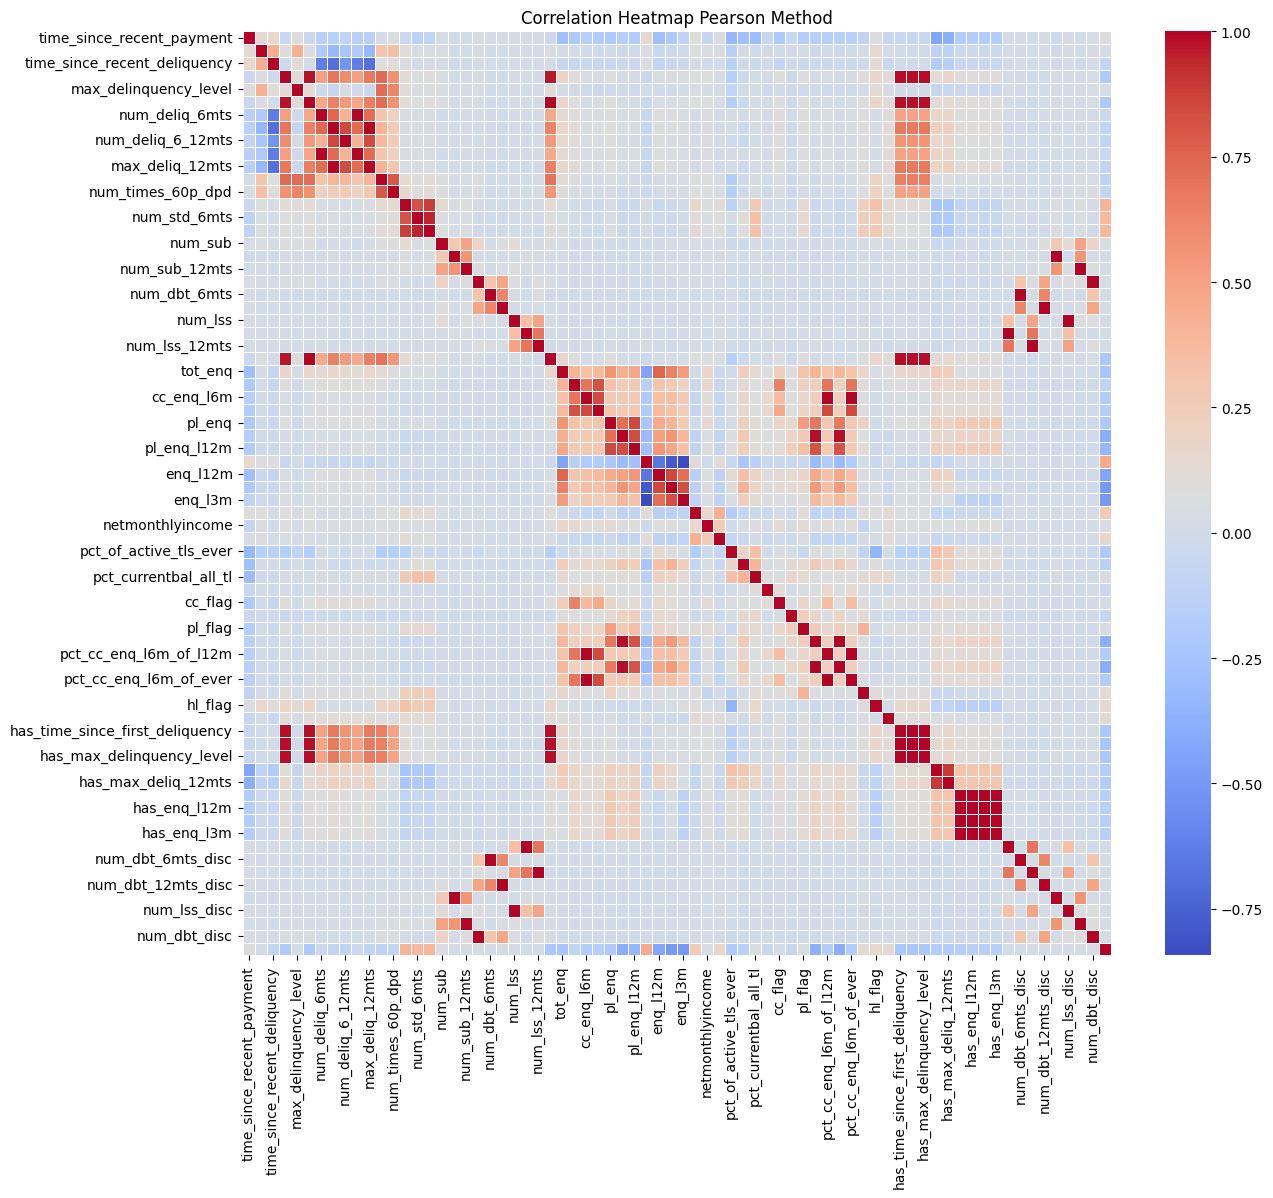

In [67]:
plt.figure(figsize=(14, 12))
sns.heatmap(df[num_features + ['credit_score']].corr(method='spearman'), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title(f'Correlation Heatmap Pearson Method')
plt.show()

In [68]:
correlations_spearman = df[num_features + ['credit_score']].corr(method='spearman')['credit_score']
correlations_spearman = correlations_spearman.drop('credit_score')
print(correlations_spearman.sort_values(ascending=False))

time_since_recent_enq               0.456487
num_std                             0.408850
num_std_12mts                       0.388296
num_std_6mts                        0.369209
age                                 0.266882
time_with_curr_empr                 0.176288
hl_flag                             0.157035
max_unsec_exposure_inpct            0.132882
gl_flag                             0.124683
time_since_recent_payment           0.083430
num_sub                             0.053878
pct_currentbal_all_tl               0.050253
pl_flag                             0.037864
netmonthlyincome                    0.033388
num_dbt_disc                        0.032253
num_dbt                             0.032253
max_delinquency_level               0.028832
num_sub_12mts_disc                  0.021912
num_sub_12mts                       0.021912
num_lss_disc                        0.020859
num_lss                             0.020859
num_dbt_12mts_disc                  0.016384
num_dbt_12

/tmp/ipython-input-69-1631757682.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_corr_spearman.values,


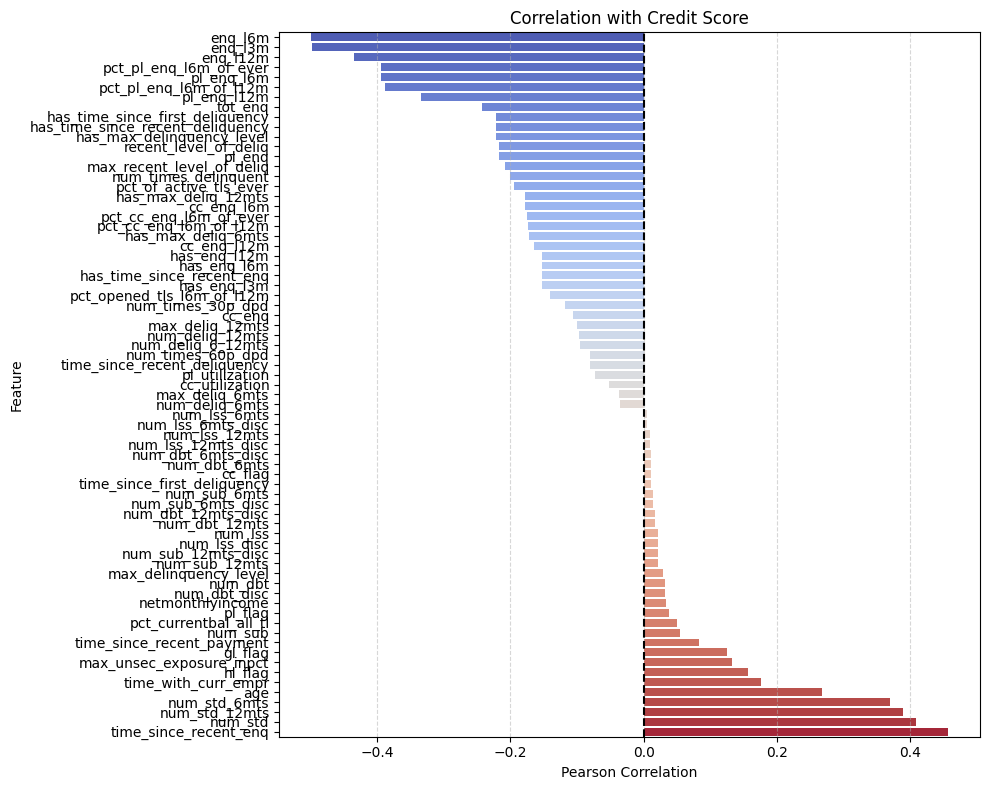

In [69]:
sorted_corr_spearman = correlations_spearman.sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_corr_spearman.values,
            y=sorted_corr_spearman.index,
            palette='coolwarm')

plt.axvline(x=0, color='black', linestyle='--')
plt.title('Correlation with Credit Score')
plt.xlabel('Pearson Correlation')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Kendall Correlation - Strength measurement of association between two ranked variables

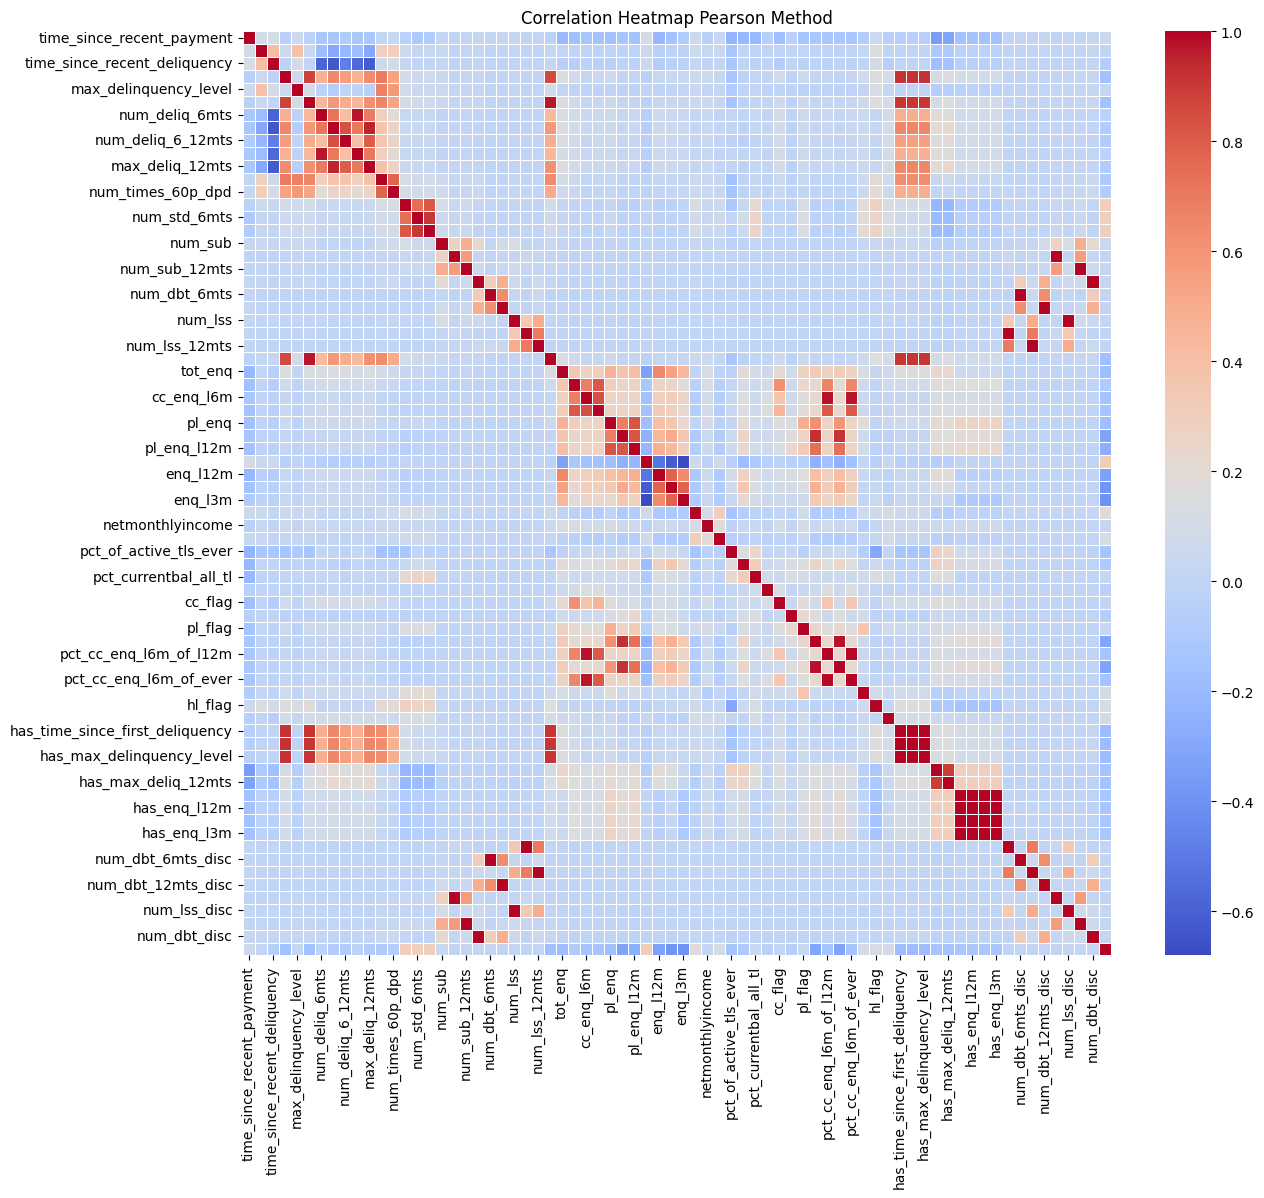

In [70]:
plt.figure(figsize=(14, 12))
sns.heatmap(df[num_features + ['credit_score']].corr(method='kendall'), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title(f'Correlation Heatmap Pearson Method')
plt.show()

In [71]:
correlations_kendall = df[num_features + ['credit_score']].corr(method='kendall')['credit_score']
correlations_kendall = correlations_kendall.drop('credit_score')
print(correlations_kendall.sort_values(ascending=False))

time_since_recent_enq               0.319913
num_std                             0.313886
num_std_12mts                       0.303015
num_std_6mts                        0.290574
age                                 0.183613
hl_flag                             0.129244
time_with_curr_empr                 0.119640
gl_flag                             0.102618
max_unsec_exposure_inpct            0.096772
time_since_recent_payment           0.057258
num_sub                             0.044282
pct_currentbal_all_tl               0.033532
pl_flag                             0.031163
num_dbt                             0.026545
num_dbt_disc                        0.026545
netmonthlyincome                    0.022677
max_delinquency_level               0.022582
num_sub_12mts_disc                  0.018034
num_sub_12mts                       0.018034
num_lss_disc                        0.017167
num_lss                             0.017167
num_dbt_12mts_disc                  0.013484
num_dbt_12

/tmp/ipython-input-72-742090663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_corr_kendall.values,


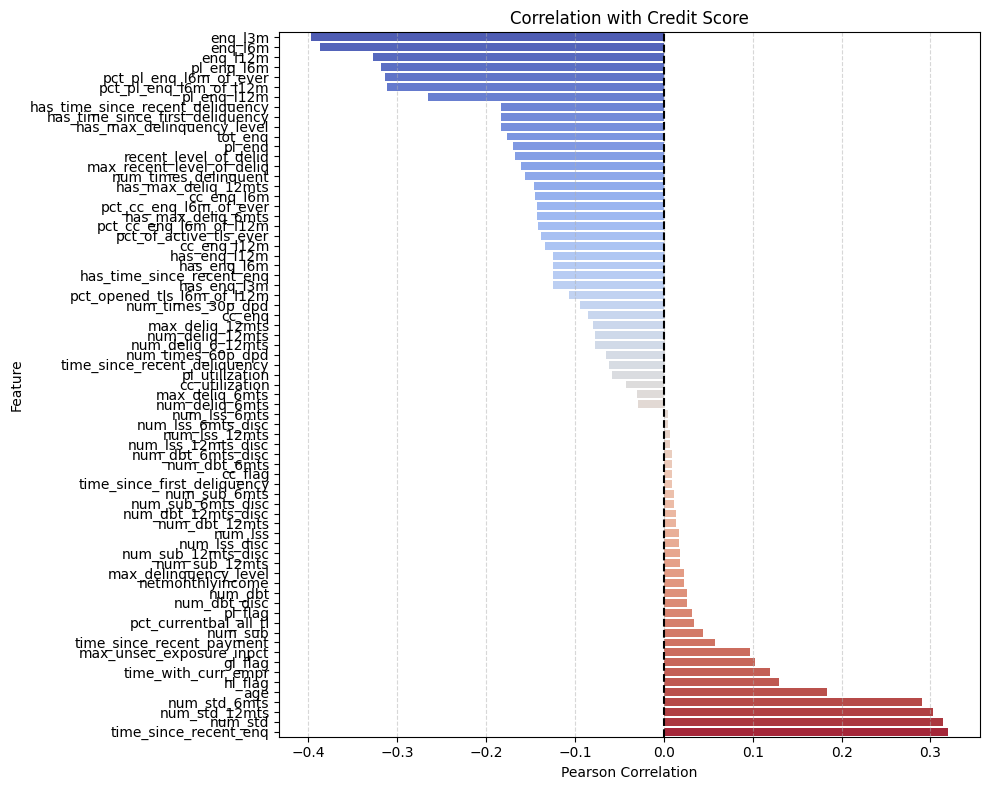

In [72]:
sorted_corr_kendall = correlations_kendall.sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_corr_kendall.values,
            y=sorted_corr_kendall.index,
            palette='coolwarm')

plt.axvline(x=0, color='black', linestyle='--')
plt.title('Correlation with Credit Score')
plt.xlabel('Pearson Correlation')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<!-- Among the three correlation measures, Pearson and Spearman coefficients show similar values. However, Kendall’s coefficients differ noticeably, typically having lower values for the same features. This indicates that while Pearson and Spearman capture somewhat stronger associations with the target attribute 'credit_score', Kendall provides a more lower estimate of correlation strength. -->
Comparing the different correlation measurements for the top 10 highest correlated features with the target attribute credit_score


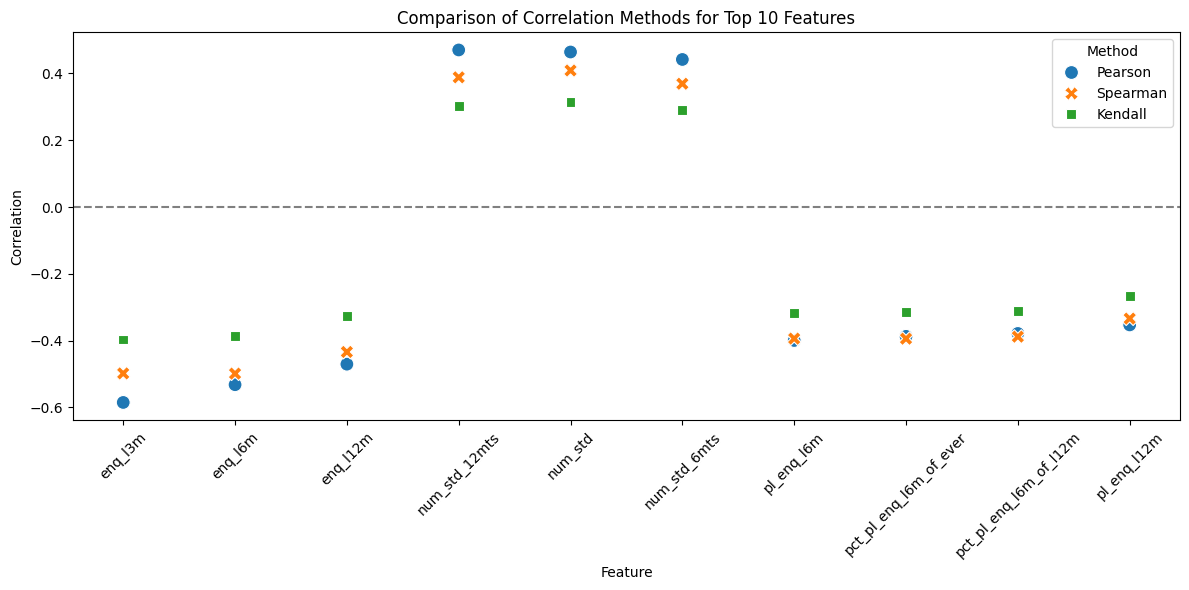

In [73]:
top_features = correlations_pearson.abs().sort_values(ascending=False).head(10).index.tolist()

comparison_df = pd.DataFrame({
    'Feature': top_features,
    'Pearson': correlations_pearson[top_features].values,
    'Spearman': correlations_spearman[top_features].values,
    'Kendall': correlations_kendall[top_features].values
})

comparison_melted = comparison_df.melt(id_vars='Feature',
                                       var_name='Method',
                                       value_name='Correlation')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=comparison_melted,
                x='Feature',
                y='Correlation',
                hue='Method',
                style='Method',
                s=100)

plt.title('Comparison of Correlation Methods for Top 10 Features')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Among the three correlation measures, Pearson and Spearman coefficients for most features show almost similar values. However, Kendall’s coefficients differ, typically having lower coefficient  values for the same features. This indicates that while Pearson and Spearman capture somewhat stronger associations with the target attribute 'credit_score', Kendall provides a lower estimate of correlation strength.



##### Interaction Visualization

Pairlot of the highest correlated features and target variable

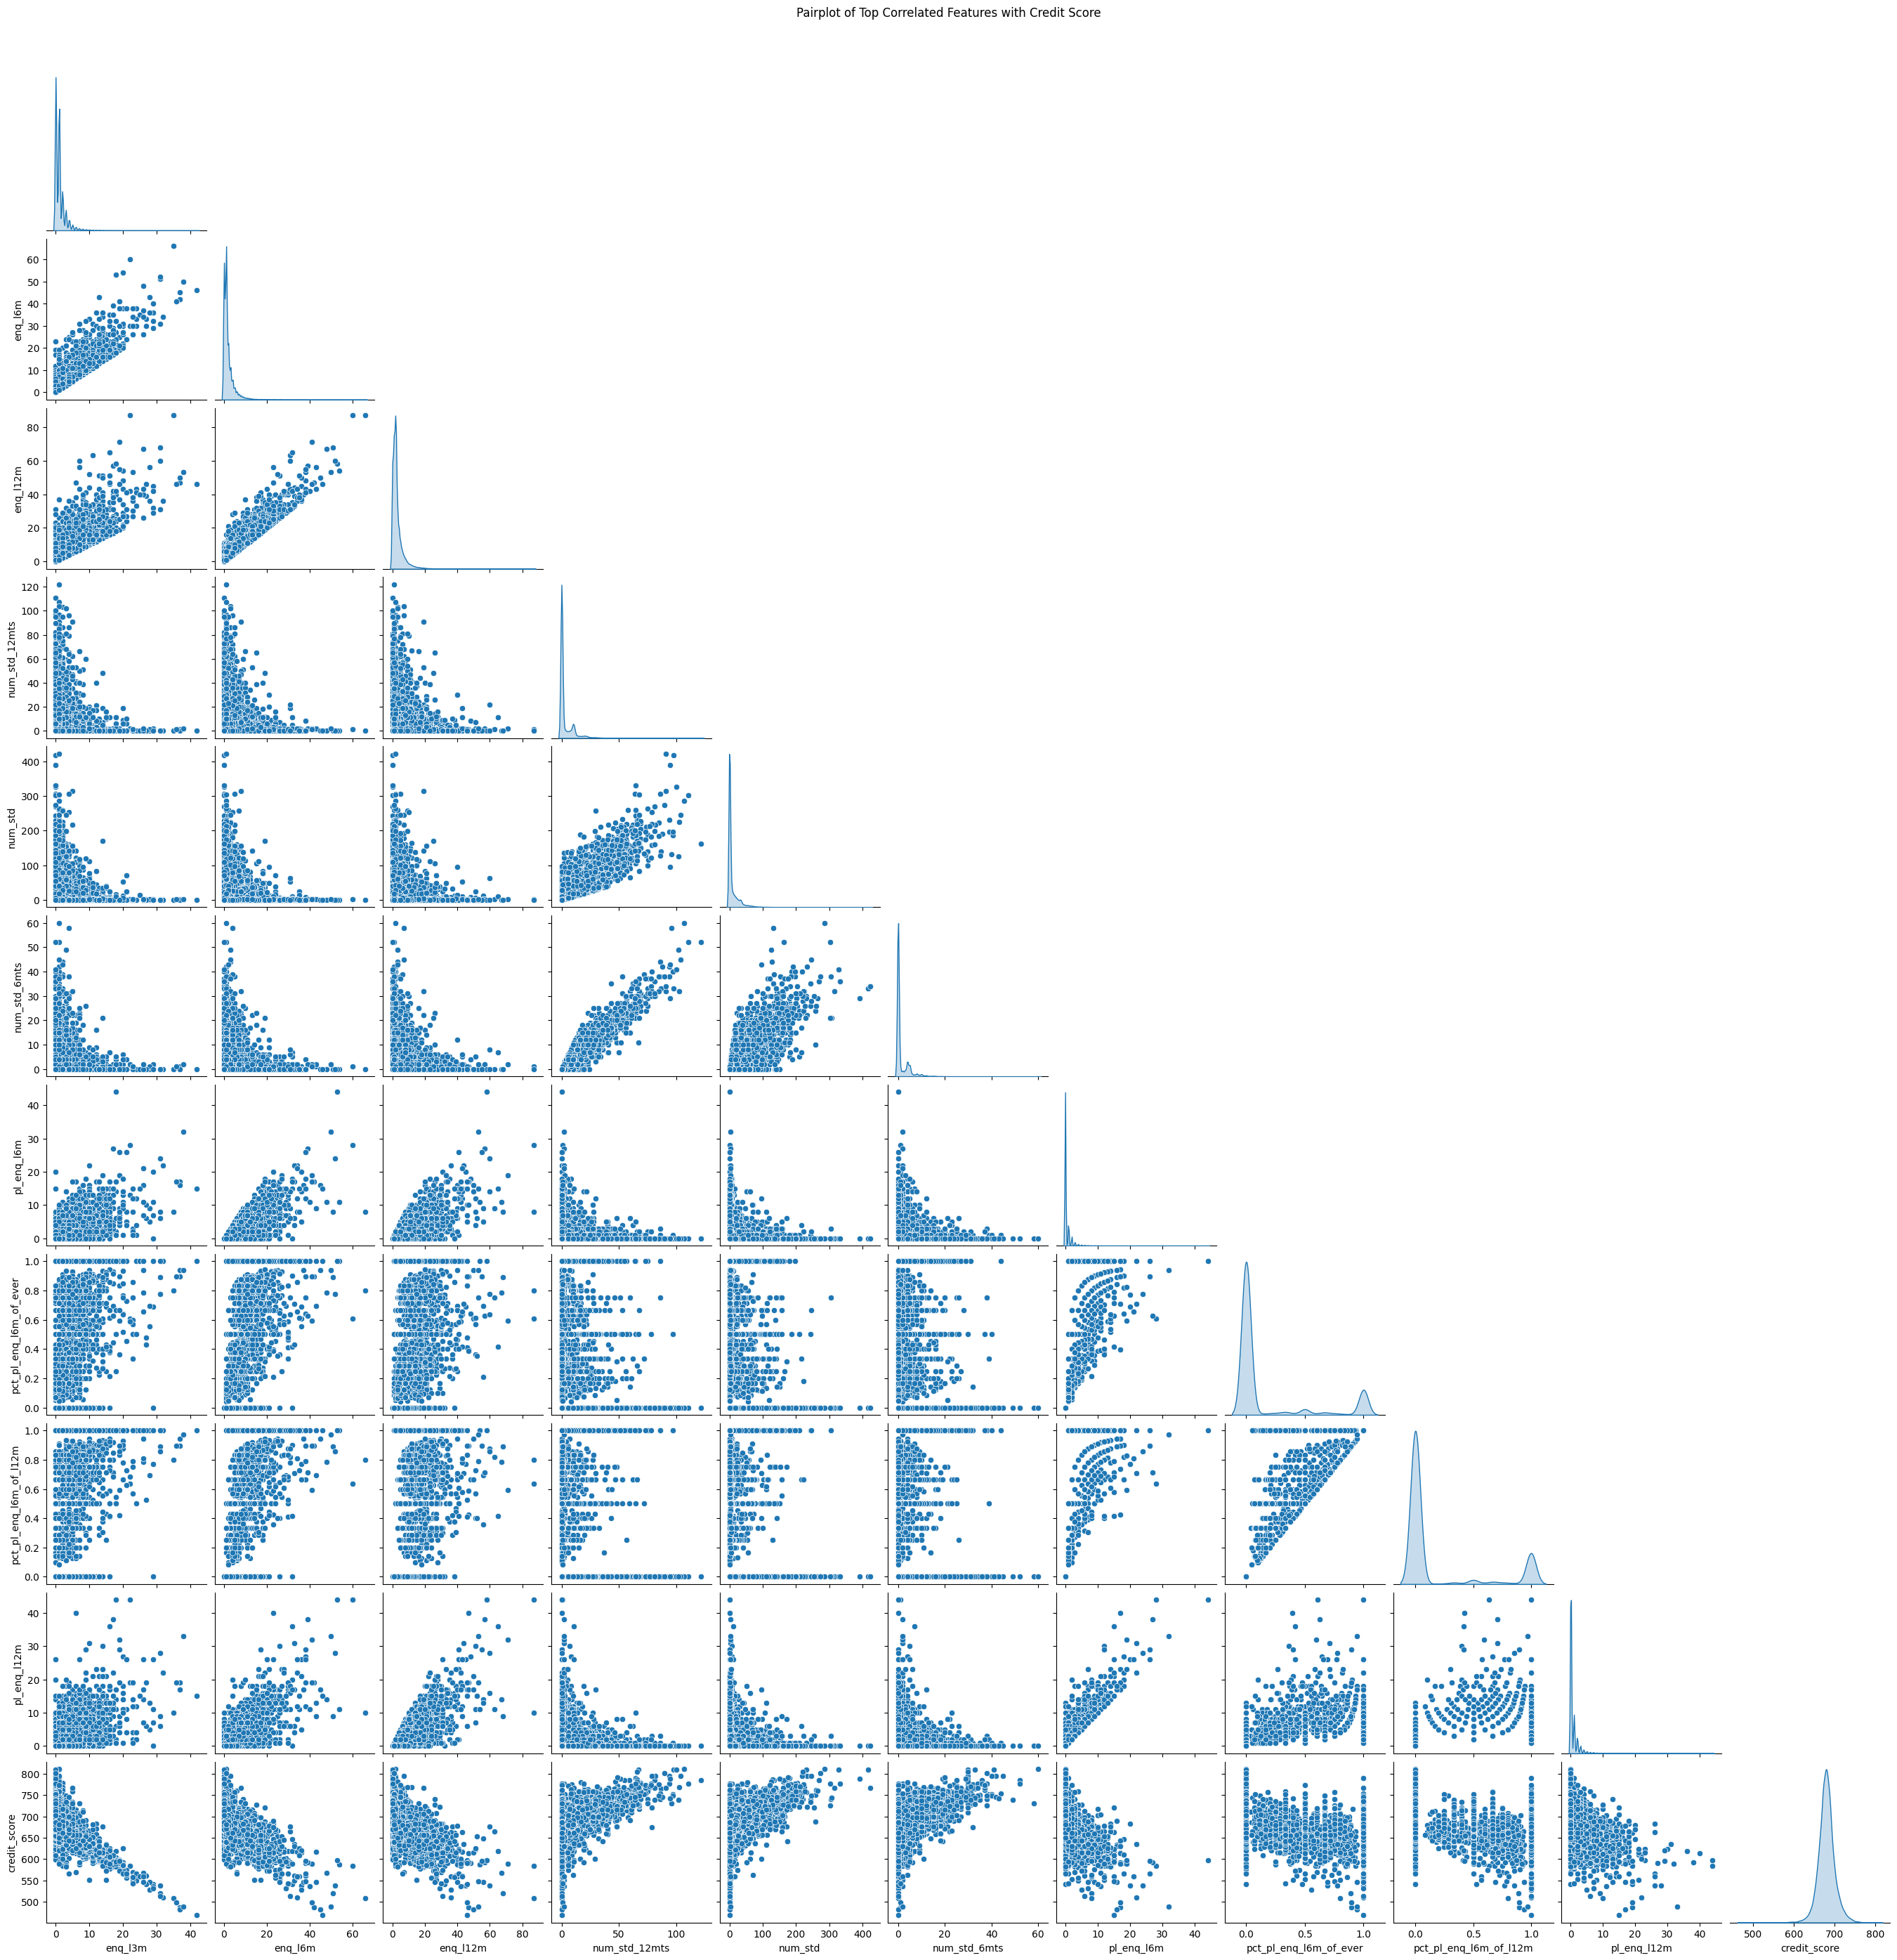

In [74]:
pairplot_features = top_features + ['credit_score']

sns.pairplot(df[pairplot_features], corner=True, diag_kind='kde')
plt.suptitle('Pairplot of Top Correlated Features with Credit Score', y=1.02)
plt.show()


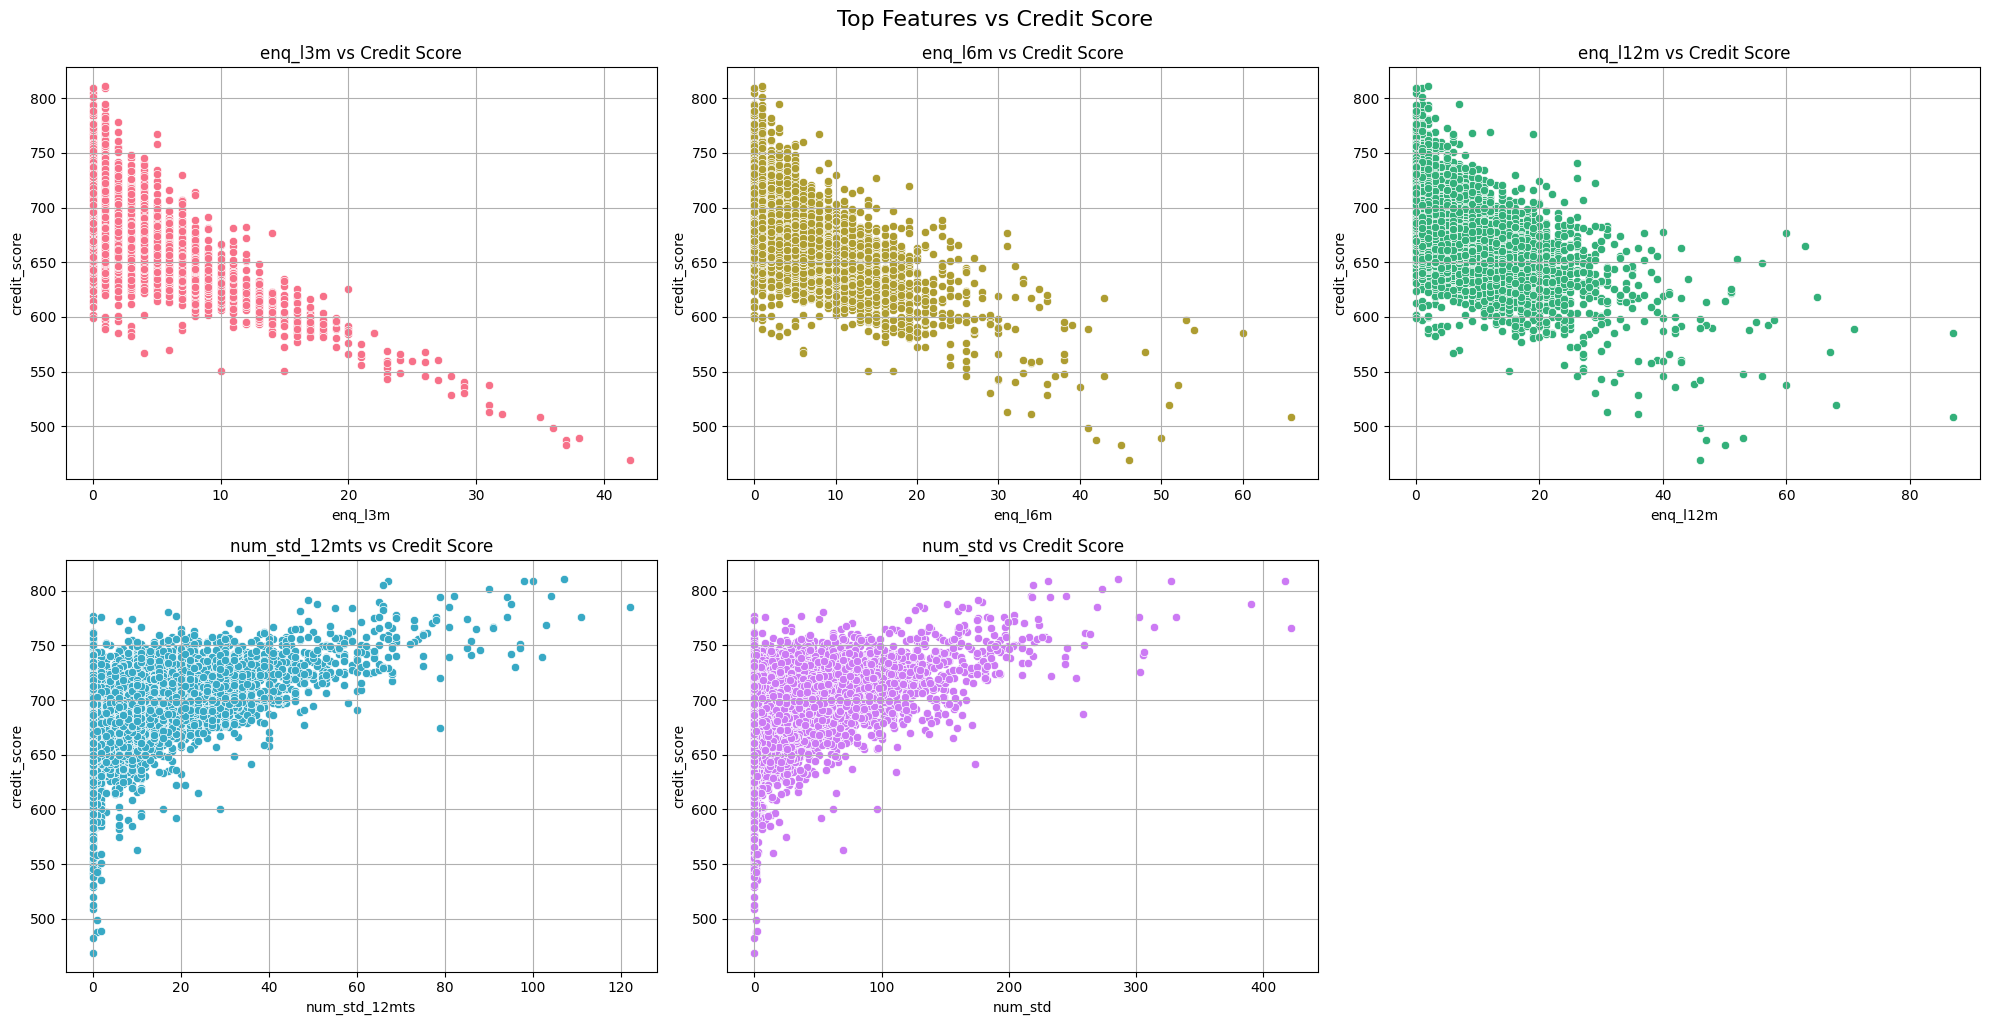

In [75]:
top_5_features = top_features[:5]
palette = sns.color_palette("husl", len(top_5_features))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(top_5_features):
    sns.scatterplot(data=df, x=feature, y='credit_score', ax=axes[i], color=palette[i])
    axes[i].set_title(f"{feature} vs Credit Score")
    axes[i].grid(True)

for j in range(len(top_5_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Top Features vs Credit Score", fontsize=16, y=1.02)
plt.show()


The linear and monotonic relationships between these features and the credit score are clear. Additionally, the pairplot reveals strong linear relationships among the predictor features themselves, which corresponds with the findings from the correlation heatmaps.

Variables like num_std and num_std_12m, or pl_enq_l6m and pl_enq_l12m are clearly linearly correlated. This is expected because both are derived from the same parent feature during the feature engineering process. Therefore, these  might be the cause multicollinearity.

Also, a significant number of features show little to no correlation with the target variable, regardless of the correlation metric used. Therefore, feature selection or dimensionality reduction could help simplify the model, especially for unsupervised tasks such as clustering.

### Multicollinearity

As seen previously some of the features may have potential problem called multicollinearity.

Multicollinearity can be a serious problem in regression models, particularly linear regression, because it makes it difficult to determine the individual effect of each predictor variable on the target.

When two or more features are highly correlated, the model struggles to assign proper weights to them, leading to unstable coefficient estimates with large standard errors.

This can result in overfitting, reduced interpretability, and misleading conclusions about feature importance.

By detecting and addressing multicollinearity, we aim to simplify the model, improve generalization, and ensure that predictions and interpretations are both accurate and trustworthy.

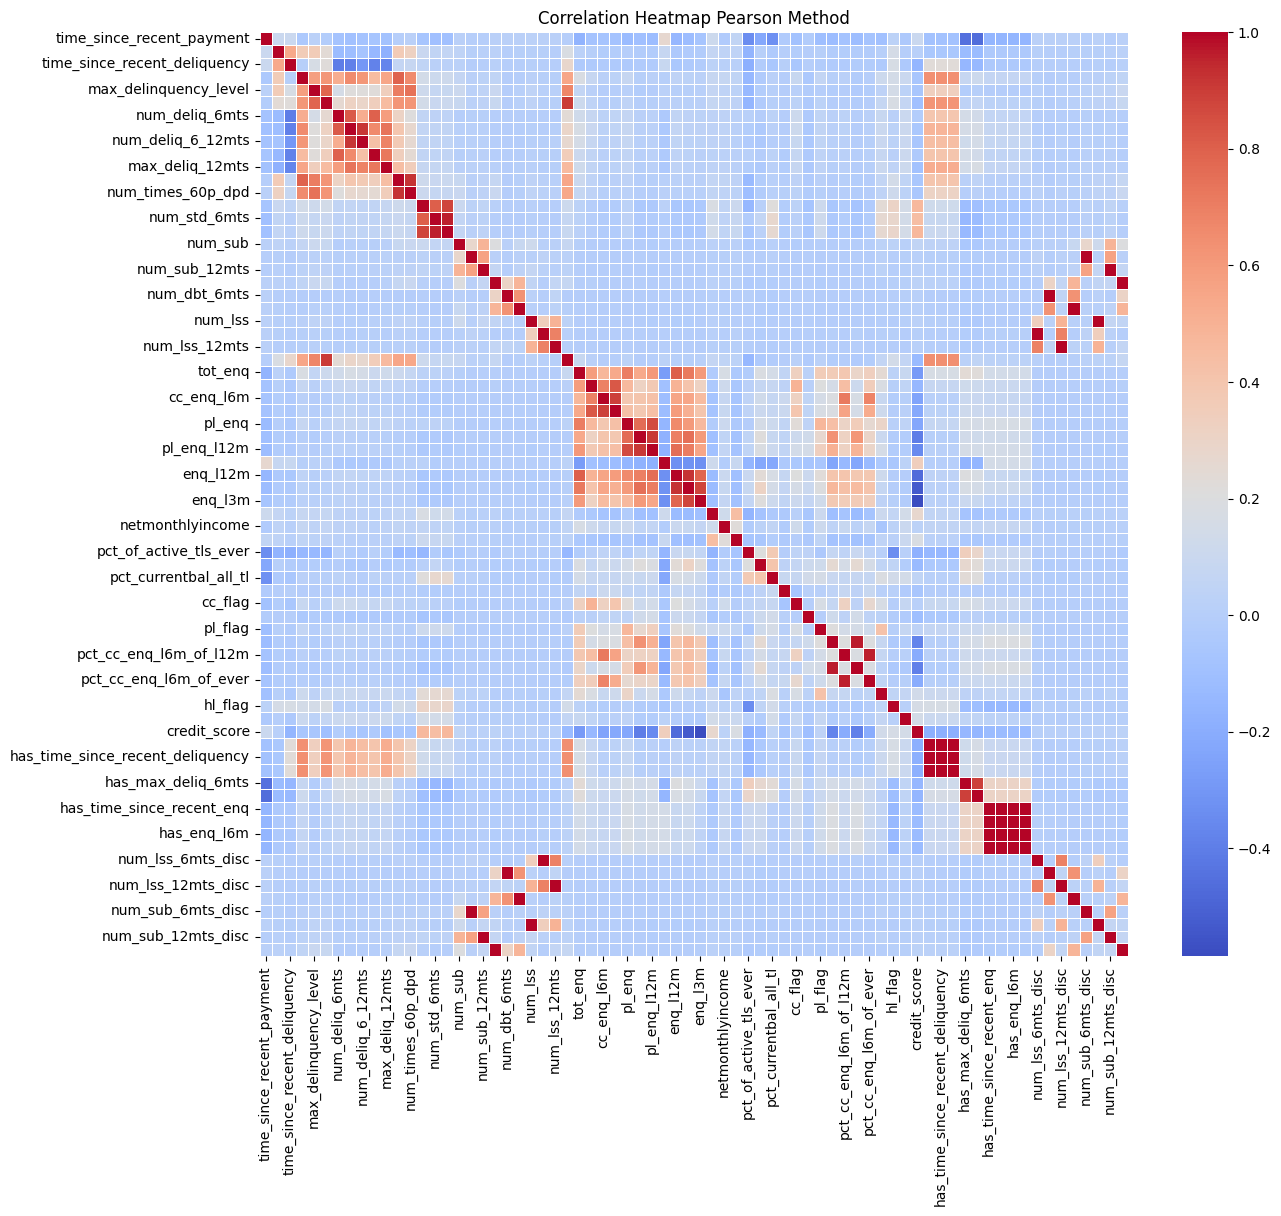

In [76]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title(f'Correlation Heatmap Pearson Method')
plt.show()

From this correlation matrix there are lots of features that have potential to cause multicollinearity. To check more accurately we use metrics such as VIF to detect this type of behaviour.

##### Variance Inflation factor (VIF)

We use this metric to see if multicollinearity exists, and which features may be the cause of that.

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numeric_df = df.select_dtypes(include='number')
X = numeric_df.drop(columns=['credit_score'])
y = numeric_df['credit_score']

X_const = add_constant(X)

vif_df = pd.DataFrame()
vif_df['feature'] = X_const.columns
vif_df['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                             feature        VIF
0                              const   0.000000
1          time_since_recent_payment   1.522333
2        time_since_first_deliquency   3.993973
3       time_since_recent_deliquency   4.514131
4               num_times_delinquent  10.082582
5              max_delinquency_level   4.212028
6          max_recent_level_of_deliq   8.760892
7                     num_deliq_6mts        inf
8                    num_deliq_12mts        inf
9                  num_deliq_6_12mts        inf
10                    max_deliq_6mts   4.591196
11                   max_deliq_12mts   4.647821
12                 num_times_30p_dpd  11.752099
13                 num_times_60p_dpd   8.654958
14                           num_std   5.118131
15                      num_std_6mts  13.610165
16                     num_std_12mts  20.610285
17                           num_sub   1.401880
18                      num_sub_6mts        inf
19                     num_sub_12mts    

Interpretation:

- If VIF = 1 → No multicollinearity

- If VIF = 5–10 → Moderate to high multicollinearity

- If VIF > 10 → Strong multicollinearity

In this case, features with VIF values greater than 10 — or especially those with infinite values — are considered strong indicators of multicollinearity. These high VIFs suggest that such features are likely linear combinations or highly correlated with other variables, often derived from the same underlying attribute.



#### Multicollinearity and Feature Importance

If we drop features solely based on high VIF values without further analysis, we risk losing valuable information and hurting model performance. Therefore, in this section, I analyze the importance of high-VIF features by checking their correlation with the target variable. This helps balance removing redundant features while keeping those that are important for prediction.

Checking the correlation between these specific features (high VIF) and the target 'credit_score'

In [78]:
high_vif_features = vif_df[(vif_df['VIF'] > 10) & (vif_df['feature'] != 'const')]['feature'].tolist()

correlations = numeric_df[high_vif_features + ['credit_score']].corr()['credit_score'].drop('credit_score')
correlations_sorted = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

print("high-VIF features with target (credit_score)")
print(correlations_sorted)

high-VIF features with target (credit_score)
enq_l6m                            -0.532140
enq_l12m                           -0.470624
num_std_12mts                       0.470303
num_std_6mts                        0.441837
pl_enq_l6m                         -0.399726
pct_pl_enq_l6m_of_ever             -0.387340
pct_pl_enq_l6m_of_l12m             -0.378722
pl_enq_l12m                        -0.353111
cc_enq_l12m                        -0.215571
pct_cc_enq_l6m_of_ever             -0.204150
pct_cc_enq_l6m_of_l12m             -0.202295
has_time_since_first_deliquency    -0.186691
has_max_delinquency_level          -0.186691
has_time_since_recent_deliquency   -0.186691
has_enq_l3m                        -0.125701
has_enq_l12m                       -0.125701
has_enq_l6m                        -0.125701
has_time_since_recent_enq          -0.125701
num_deliq_6_12mts                  -0.062014
num_times_delinquent               -0.061322
num_times_30p_dpd                  -0.056238
num_deliq_

/tmp/ipython-input-79-331302567.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_corr.values,


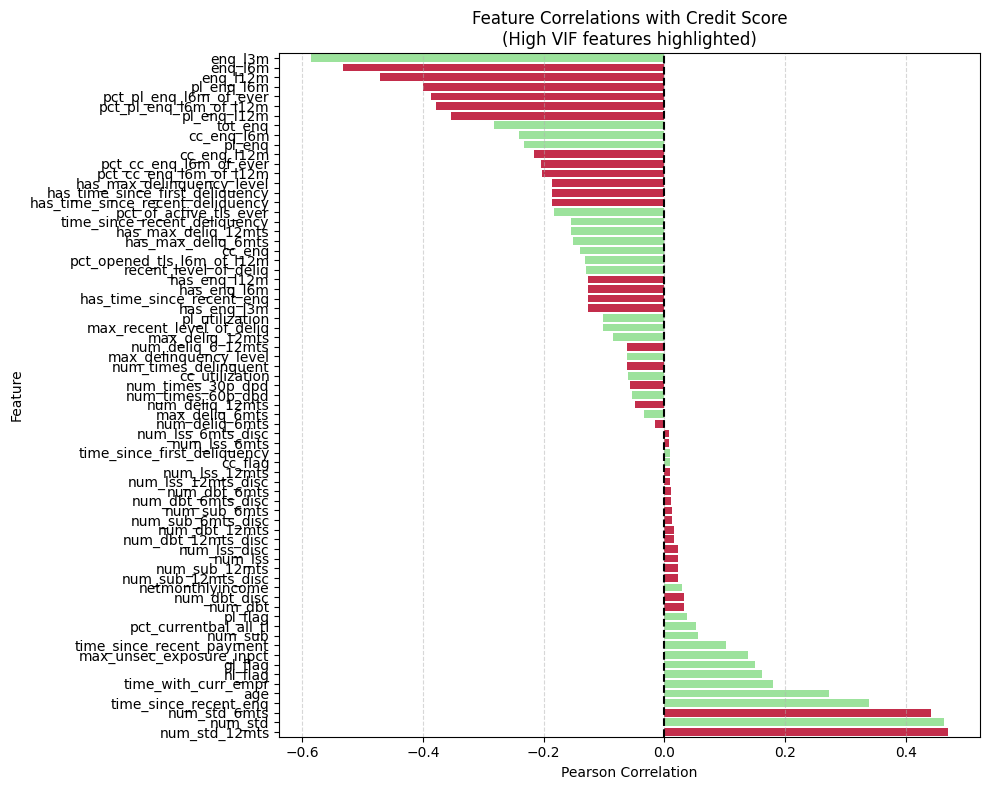

In [79]:
sorted_corr = correlations_pearson.sort_values()

colors = ['lightgreen' if feature not in high_vif_features else 'crimson' for feature in sorted_corr.index]

plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_corr.values,
            y=sorted_corr.index,
            palette=colors)

plt.axvline(x=0, color='black', linestyle='--')
plt.title('Feature Correlations with Credit Score\n(High VIF features highlighted)')
plt.xlabel('Pearson Correlation')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Most of these features also have a strong Pearson correlation with the target, meaning they are important for prediction. To avoid losing valuable information, here the features with VIF greater than 10 and an absolute correlation less than 0.1 will be removed to balance multicollinearity and feature importance.

##### Testing if changes have impact on regression

To evaluate the impact of removing multicollinear features, a simple linear regression model is used. Linear models are particularly sensitive to multicollinearity, which can distort coefficient estimates and reduce model interpretability. By testing before and after feature removal, the aim is to verify whether the removed features have a real contribution to the model’s predictive performance or are they redundant.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


def calculate_vif(X):
    X_const = add_constant(X)
    vif_values = []
    for i in range(X_const.shape[1]):
        try:
            vif = variance_inflation_factor(X_const.values, i)
        except:
            vif = np.inf
        vif_values.append(vif)
    vif_df = pd.DataFrame({'feature': X_const.columns, 'VIF': vif_values})
    return vif_df[vif_df['feature'] != 'const']

def train_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE:", mse)
    print("R²:", r2)
    return mse, r2

print("Before removing features:")
mse_before, r2_before = train_evaluate(X, y)

vif_df = calculate_vif(X)
high_vif_features = vif_df[vif_df['VIF'] > 10]['feature'].tolist()

correlations = numeric_df.corr()['credit_score'].drop('credit_score')
correlations_filtered = correlations.loc[high_vif_features]
features_to_drop = correlations_filtered[correlations_filtered.abs() < 0.1].index.tolist()

print("\nFeatures to drop due to high VIF and low correlation:", features_to_drop)

X_reduced = X.drop(columns=features_to_drop)

print("\nPerformance after removing features:")
mse_after, r2_after = train_evaluate(X_reduced, y)


Before removing features:
MSE: 105.47302309292245
R²: 0.7478489802006414


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Features to drop due to high VIF and low correlation: ['num_times_delinquent', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'num_lss_6mts_disc', 'num_dbt_6mts_disc', 'num_lss_12mts_disc', 'num_dbt_12mts_disc', 'num_sub_6mts_disc', 'num_lss_disc', 'num_sub_12mts_disc', 'num_dbt_disc']

Performance after removing features:
MSE: 105.94000059223704
R²: 0.7467325918652867


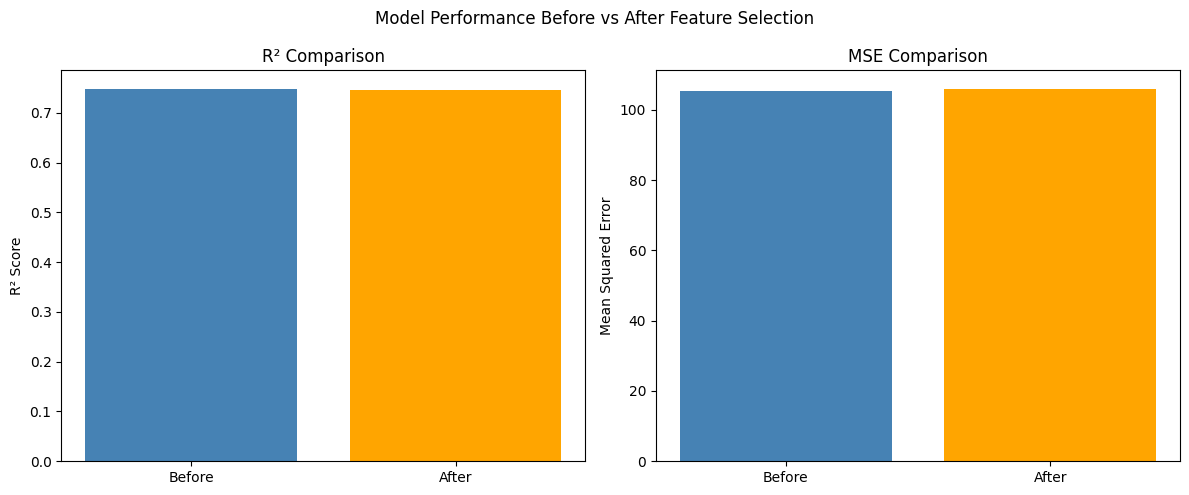

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(['Before', 'After'], [r2_before, r2_after], color=['steelblue', 'orange'])
axes[0].set_title('R² Comparison')
axes[0].set_ylabel('R² Score')

axes[1].bar(['Before', 'After'], [mse_before, mse_after], color=['steelblue', 'orange'])
axes[1].set_title('MSE Comparison')
axes[1].set_ylabel('Mean Squared Error')

plt.suptitle('Model Performance Before vs After Feature Selection')
plt.tight_layout()
plt.show()

Removing the selected features had a very small negative impact on performance:

The model still performs nearly identically, which suggests that the dropped features contributed little unique predictive power (due to low correlation) and may have been redundant (due to high multicollinearity).

Therefore, removing them is justified, especially to improve model interpretability and reduce noise or instability caused by multicollinearity.

While the model's accuracy did not improve, reducing feature count can benefit future models by lowering computational cost and potentially improving generalization.

In [82]:
df.drop(columns=features_to_drop, inplace=True)

### Encoding Categorical Variables

Encoding features is essential when working with categorical data because most machine learning algorithms, like linear models, decision trees, and neural networks, can only process numerical input.

Firstly i check which features are categorical, what are each features values, and based on that is decided which encoding technique is used.

In [83]:
df.select_dtypes(include=['object', 'category']).nunique()

maritalstatus      2
education          7
gender             2
last_prod_enq2     6
first_prod_enq2    6
approved_flag      4
dtype: int64

In [84]:
for col in categorical_cols:
    unique_vals = df[col].dropna().unique()
    print(f"{col}: {list(unique_vals)}")

maritalstatus: ['Married', 'Single']
education: ['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE', 'OTHERS', 'PROFESSIONAL']
gender: ['M', 'F']
last_prod_enq2: ['PL', 'ConsumerLoan', 'others', 'AL', 'CC', 'HL']
first_prod_enq2: ['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC']
approved_flag: ['P2', 'P1', 'P3', 'P4']


The binary variables maritalstatus and gender will be binary encoded.

last_prod_enq2 and first_prod_enq2: These are product types and typically do not have an inherent, meaningful order. One-hot encoding will create separate binary columns for each product, allowing the model to learn their individual effects.

Features that have natural ordering, in this case education and approved_flag
will be ordinaly encoded.

In [85]:
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
df['maritalstatus'] = df['maritalstatus'].map({'Single': 0, 'Married': 1})

In [86]:
df = pd.get_dummies(df, columns=['last_prod_enq2', 'first_prod_enq2'], prefix=['last_prod', 'first_prod'])

In [87]:
education_order = {
    'OTHERS': 0,
    'SSC': 1,
    '12TH': 2,
    'UNDER GRADUATE': 3,
    'GRADUATE': 4,
    'POST-GRADUATE': 5,
    'PROFESSIONAL': 6
}

approved_order = {
    'P1': 1,
    'P2': 2,
    'P3': 3,
    'P4': 4
}

df['education'] = df['education'].map(education_order)
df['approved_flag'] = df['approved_flag'].map(approved_order)


In [88]:
df['approved_flag'] = df['approved_flag'].astype(int)
df['education'] = df['education'].astype(int)
df['maritalstatus'] = df['maritalstatus'].astype(int)
df['gender'] = df['gender'].astype(int)


In [89]:
cat_features = ['maritalstatus', 'gender', 'education', 'approved_flag']

for feature in cat_features:
    unique_vals = df[feature].dropna().unique().tolist()
    print(f"{feature}: {unique_vals}")

maritalstatus: [1, 0]
gender: [0, 1]
education: [2, 4, 1, 5, 3, 0, 6]
approved_flag: [2, 1, 3, 4]
